<font size="5">Importing Libraries</font>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

<font size="5">Loading the Data</font>

In [4]:
df_test=pd.read_csv("E:/Hackathons/Analytics Vidhya/Food_Demand_test.csv")
df_fulfilment_center_info=pd.read_csv("E:/Hackathons/Analytics Vidhya/fulfilment_center_info.csv")
df_meal_info=pd.read_csv("E:/Hackathons/Analytics Vidhya/meal_info.csv")
df_train=pd.read_csv("E:/Hackathons/Analytics Vidhya/train.csv")

In [5]:
df_test.shape
#Checking the shape

(32573, 8)

In [6]:
df_fulfilment_center_info.shape
#Checking the shape

(77, 5)

In [7]:
df_meal_info.shape
#Checking the shape

(51, 3)

In [8]:
df_train.shape
#Checking the shape

(456548, 9)

In [9]:
df_test.info()
#Checking the shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
id                       32573 non-null int64
week                     32573 non-null int64
center_id                32573 non-null int64
meal_id                  32573 non-null int64
checkout_price           32573 non-null float64
base_price               32573 non-null float64
emailer_for_promotion    32573 non-null int64
homepage_featured        32573 non-null int64
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


In [9]:
df_test.head()
#Checking few rows of the dataset

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [10]:
df_test.isnull().sum()
#Checking for null values

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
dtype: int64

In [11]:
df_fulfilment_center_info.head()
#Checking few rows of the data

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [12]:
df_fulfilment_center_info.isnull().sum()
#Checking for any null values

center_id      0
city_code      0
region_code    0
center_type    0
op_area        0
dtype: int64

In [13]:
df_meal_info.head()


,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [14]:
df_meal_info.isnull().sum()
#Checking for null values

meal_id     0
category    0
cuisine     0
dtype: int64

In [15]:
df_train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [16]:
df_train.isnull().sum()
#Checking for null values

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [17]:
#Merging the training data with the center and meal information.
df_train = pd.merge(df_train, df_fulfilment_center_info,
                    how="left",
                    left_on='center_id',
                    right_on='center_id')

df_train = pd.merge(df_train, df_meal_info,
                    how='left',
                    left_on='meal_id',
                    right_on='meal_id')


In [18]:
#Merge the training data with the center and meal information.
df_test = pd.merge(df_test, df_fulfilment_center_info,
                   how="left",
                   left_on='center_id',
                   right_on='center_id')

df_test = pd.merge(df_test, df_meal_info,
                   how='left',
                   left_on='meal_id',
                   right_on='meal_id')

In [19]:
df_train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0,Beverages,Indian


In [20]:
df_test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,center_type,op_area,category,cuisine
0,1028232,146,55,1885,158.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
1,1127204,146,55,1993,160.11,159.11,0,0,647,56,TYPE_C,2.0,Beverages,Thai
2,1212707,146,55,2539,157.14,159.14,0,0,647,56,TYPE_C,2.0,Beverages,Thai
3,1082698,146,55,2631,162.02,162.02,0,0,647,56,TYPE_C,2.0,Beverages,Indian
4,1400926,146,55,1248,163.93,163.93,0,0,647,56,TYPE_C,2.0,Beverages,Indian


<font size="5">Data Visualiazation</font>

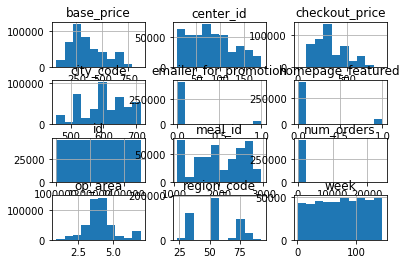

<Figure size 1440x504 with 0 Axes>

In [21]:
#Checking the shape of the variables
df_train.hist()
fig = plt.figure(figsize=(20,7))

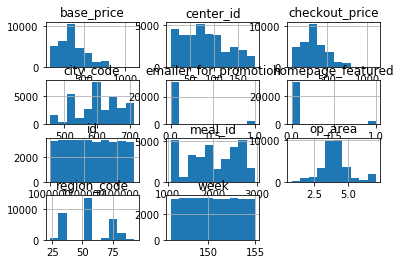

<Figure size 1440x504 with 0 Axes>

In [22]:
#Checking the shape of the variables
df_test.hist()
fig = plt.figure(figsize=(20,7))

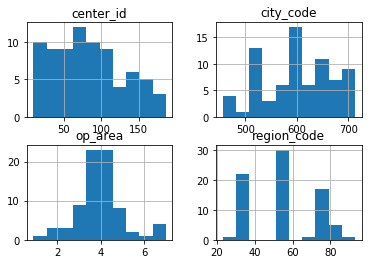

<Figure size 1440x504 with 0 Axes>

In [23]:
#Checking the shape of the variables
df_fulfilment_center_info.hist()
fig = plt.figure(figsize=(20,7))

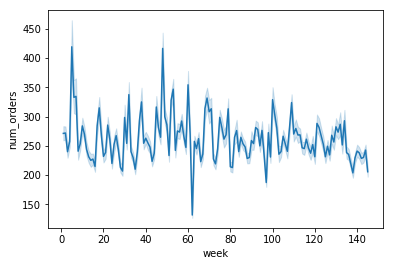

In [23]:
#Line Plot showing the relationship between the week and num_orders
sns.lineplot(df_train['week'],df_train['num_orders'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

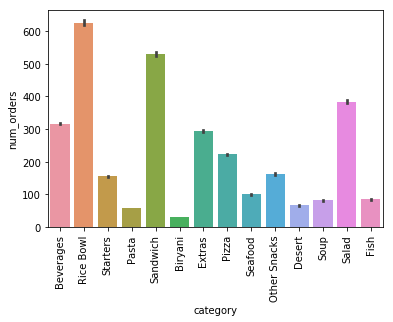

In [24]:
#Bar plot showing the number of orders for each food category
sns.barplot(df_train['category'],df_train['num_orders'])
plt.xticks(rotation='90')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76]),
 <a list of 77 Text xticklabel objects>)

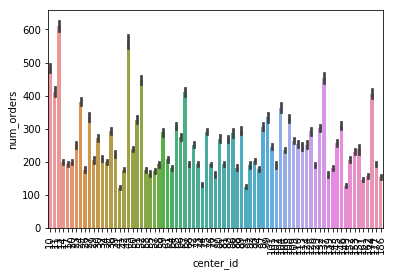

In [26]:
#Bar plot showing number of orders for each center
sns.barplot(df_train['center_id'],df_train['num_orders'])
plt.xticks(rotation='90')

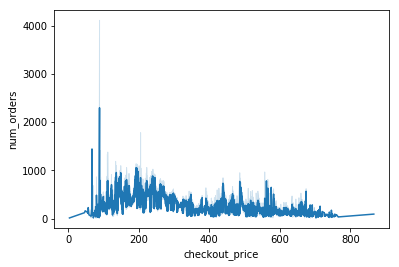

In [25]:
#Line plot showing the relationship between the checkout price and number of orders
sns.lineplot(df_train['checkout_price'],df_train['num_orders'])

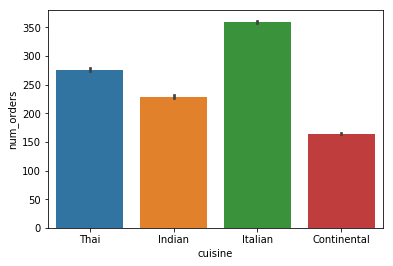

In [26]:
#Bar plot showing the number of orders for each cuisine
sns.barplot(df_train['cuisine'],df_train['num_orders'])

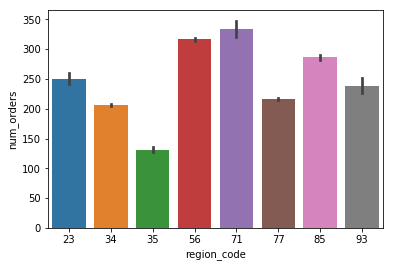

In [27]:
#Bar plot showing the relationship between the number of orders and region_code
sns.barplot(df_train['region_code'],df_train['num_orders'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

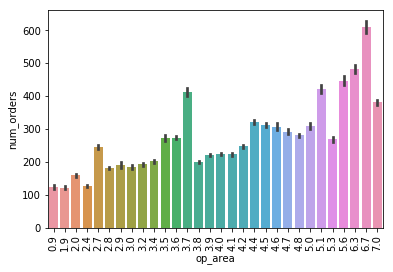

In [28]:
#Bar plot shwoing relationship between op_are and num_orders
sns.barplot(df_train['op_area'],df_train['num_orders'])
plt.xticks(rotation='90')

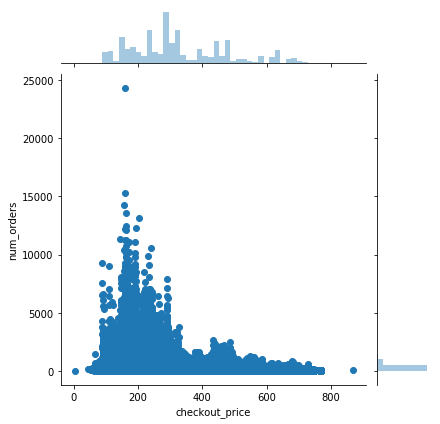

In [29]:
#A jointplot showing the relationship between the number of orders and checkout_price
sns.jointplot(x='checkout_price', y='num_orders',data=df_train)

Center Type Distribution:
 TYPE_A    262881
TYPE_C     99593
TYPE_B     94074
Name: center_type, dtype: int64


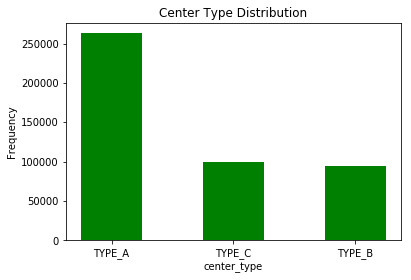

In [30]:
#Bar chart showing the frequency for each center type
plt.bar(df_train['center_type'].value_counts().index, df_train['center_type'].value_counts(), width=0.5, bottom=None, align='center', data=df_train, color='g')
plt.title('Center Type Distribution')
#plt.xticks(rotation='vertical')
plt.xlabel('center_type')
plt.ylabel('Frequency')
print('Center Type Distribution:\n',df_train['center_type'].value_counts())

Emailer for Promotion Distribution:
 0    419498
1     37050
Name: emailer_for_promotion, dtype: int64


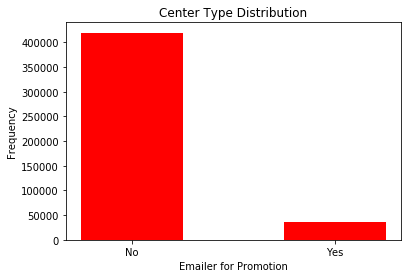

In [31]:
#Bar chart showing the relationship between frequencyand emailer for promotion
plt.bar(df_train['emailer_for_promotion'].value_counts().index, df_train['emailer_for_promotion'].value_counts(), width=0.5, bottom=None, align='center', data=df_train, color='r')
plt.title('Center Type Distribution')
plt.xticks(np.arange(2), ('No', 'Yes'))
plt.xlabel('Emailer for Promotion')
plt.ylabel('Frequency')
print('Emailer for Promotion Distribution:\n',df_train['emailer_for_promotion'].value_counts())

Homepage Featured Distribution:
 0    406693
1     49855
Name: homepage_featured, dtype: int64


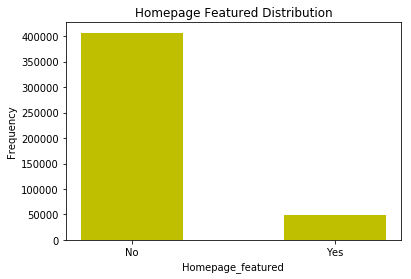

In [34]:
#Bar chart showing the frequency for Homepage featured
plt.bar(df_train['homepage_featured'].value_counts().index, df_train['homepage_featured'].value_counts(), width=0.5, bottom=None, align='center', data=df_train, color='y')
plt.title('Homepage Featured Distribution')
plt.xticks(np.arange(2), ('No', 'Yes'))
plt.xlabel('Homepage_featured')
plt.ylabel('Frequency')
print('Homepage Featured Distribution:\n',df_train['homepage_featured'].value_counts())

Text(0, 0.5, 'Number of Items')

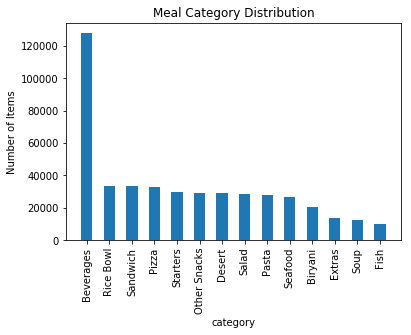

In [35]:
#Bar chart showing the realtionship between the number of items for each category
plt.bar(df_train['category'].value_counts().index, df_train['category'].value_counts(), width=0.5, bottom=None, align='center', data=df_train)
plt.title('Meal Category Distribution')
plt.xticks(rotation='vertical')
plt.xlabel('category')
plt.ylabel('Number of Items')

Text(0, 0.5, 'Number of orders')

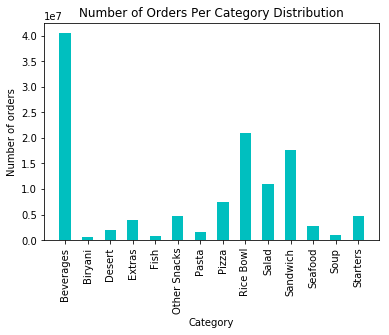

In [36]:
#Bar plot showing relationship between number of orders recieved for each category
plt.bar(df_train.groupby( [ "category"] )['num_orders'].sum().index,df_train.groupby( [ "category"] )['num_orders'].sum(), width=0.5, bottom=None, align='center', data=df_train, color='c')
plt.title('Number of Orders Per Category Distribution')
plt.xticks(rotation='vertical')
plt.xlabel('Category')
plt.ylabel('Number of orders')

We can see that Beverages outnumbers all other categories both in number of items and number of orders.

In [42]:
from sklearn import preprocessing
from lightgbm import LGBMRegressor
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import train_test_split
import pprint

In [43]:
# Label encode categorical columns for use in LightGBM.
label_encode_columns = ['center_id', 
                        'meal_id', 
                        'city_code', 
                        'region_code', 
                        'center_type', 
                        'category', 
                        'cuisine']

In [44]:
le = preprocessing.LabelEncoder()


In [45]:
for col in label_encode_columns:
    le.fit(df_train[col])
    df_train[col + '_encoded'] = le.transform(df_train[col])
    df_test[col + '_encoded'] = le.transform(df_test[col])

In [46]:
# Feature engineering - treating 'week' as a cyclic feature.
# Encoding it using sine and cosine transform.
df_train['week_sin'] = \
        np.sin(2 * np.pi * df_train['week'] / 52.143)
df_train['week_cos'] = \
        np.cos(2 * np.pi * df_train['week'] / 52.143)

df_test['week_sin'] = \
        np.sin(2 * np.pi * df_test['week'] / 52.143)
df_test['week_cos'] = \
        np.cos(2 * np.pi * df_test['week'] / 52.143)

In [47]:
# Feature engineering - percent difference between base price and checkout price.
df_train['price_diff_percent'] = \
        (df_train['base_price'] - df_train['checkout_price']) / \
        df_train['base_price']

df_test['price_diff_percent'] = \
        (df_test['base_price'] - df_test['checkout_price']) / \
        df_test['base_price']

In [48]:
# Converting email and homepage features into a single feature - 'email_plus_homepage'.
df_train['email_plus_homepage'] = \
        df_train['emailer_for_promotion'] + \
        df_train['homepage_featured']

df_test['email_plus_homepage'] = \
        df_test['emailer_for_promotion'] + \
        df_test['homepage_featured']


In [49]:
# Preparing  a list of columns to train on.
# Also deciding which features to treat as numeric and which features to treat
# as categorical.
columns_to_train = ['week',
                    'week_sin',
                    'week_cos',
                    'checkout_price',
                    'base_price',
                    'price_diff_percent',
                    'email_plus_homepage',
                    'city_code_encoded',
                    'region_code_encoded',
                    'center_type_encoded',
                    'op_area',
                    'category_encoded',
                    'cuisine_encoded',
                    'center_id_encoded',
                    'meal_id_encoded']

categorical_columns = ['email_plus_homepage',
                       'city_code_encoded',
                       'region_code_encoded',
                       'center_type_encoded',
                       'category_encoded',
                       'cuisine_encoded',
                       'center_id_encoded',
                       'meal_id_encoded']

In [50]:
numerical_columns = [col for col in columns_to_train if col not in categorical_columns]

In [51]:
# Log transforming the target variable - num_orders.
df_train['num_orders_log1p'] = np.log1p(df_train['num_orders'])

In [52]:
# Train-Test split.
X = df_train[categorical_columns + numerical_columns]
y = df_train['num_orders_log1p']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.02,shuffle=False)

In [53]:
#Fitting the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, shuffle=False)

g = {'colsample_bytree': 0.4,
     'min_child_samples': 5,
     'num_leaves': 255}

estimator = LGBMRegressor(learning_rate=0.003,
                          n_estimators=40000,
                          silent=False,
                          **g)

fit_params = {'early_stopping_rounds': 1000,
              'feature_name': categorical_columns + numerical_columns,
              'categorical_feature': categorical_columns,
              'eval_set': [(X_train, y_train), (X_test, y_test)]}

estimator.fit(X_train, y_train, **fit_params)

C:\Users\DELL\Anaconda3\lib\site-packages\lightgbm\basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['category_encoded', 'center_id_encoded', 'center_type_encoded', 'city_code_encoded', 'cuisine_encoded', 'email_plus_homepage', 'meal_id_encoded', 'region_code_encoded']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
C:\Users\DELL\Anaconda3\lib\site-packages\lightgbm\basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['category_encoded', 'center_id_encoded', 'center_type_encoded', 'city_code_encoded', 'cuisine_encoded', 'email_plus_homepage', 'meal_id_encoded', 'region_code_encoded']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	training's l2: 1.44624	valid_1's l2: 1.28375
Training until validation scores don't improve for 1000 rounds
[2]	training's l2: 1.44112	valid_1's l2: 1.27959
[3]	training's l2: 1.43465	valid_1's l2: 1.27398
[4]	training's l2: 1.42997	valid_1's l2: 1.27012
[5]	training's l2: 1.42433	valid_1's l2: 1.26544
[6]	training's l2: 1.4182	valid_1's l2: 1.26004
[7]	training's l2: 1.41414	valid_1's l2: 1.2571
[8]	training's l2: 1.40928	valid_1's l2: 1.25263
[9]	training's l2: 1.40503	valid_1's l2: 1.24989
[10]	training's l2: 1.40362	valid_1's l2: 1.24901
[11]	training's l2: 1.40051	valid_1's l2: 1.24656
[12]	training's l2: 1.39535	valid_1's l2: 1.24211
[13]	training's l2: 1.38988	valid_1's l2: 1.23738
[14]	training's l2: 1.38488	valid_1's l2: 1.23309
[15]	training's l2: 1.37994	valid_1's l2: 1.2291
[16]	training's l2: 1.3742	valid_1's l2: 1.2237
[17]	training's l2: 1.36854	valid_1's l2: 1.21881
[18]	training's l2: 1.36349	valid_1's l2: 1.21457
[19]	training's l2: 1.35736	valid_1's l2: 1.20912
[

[163]	training's l2: 0.858745	valid_1's l2: 0.790275
[164]	training's l2: 0.855768	valid_1's l2: 0.78766
[165]	training's l2: 0.852882	valid_1's l2: 0.785219
[166]	training's l2: 0.850884	valid_1's l2: 0.783693
[167]	training's l2: 0.847997	valid_1's l2: 0.780971
[168]	training's l2: 0.846932	valid_1's l2: 0.780393
[169]	training's l2: 0.84378	valid_1's l2: 0.77753
[170]	training's l2: 0.841096	valid_1's l2: 0.775298
[171]	training's l2: 0.838341	valid_1's l2: 0.772947
[172]	training's l2: 0.836118	valid_1's l2: 0.77127
[173]	training's l2: 0.833064	valid_1's l2: 0.76851
[174]	training's l2: 0.830359	valid_1's l2: 0.766204
[175]	training's l2: 0.828455	valid_1's l2: 0.764967
[176]	training's l2: 0.825691	valid_1's l2: 0.762367
[177]	training's l2: 0.823627	valid_1's l2: 0.760586
[178]	training's l2: 0.820706	valid_1's l2: 0.757984
[179]	training's l2: 0.817642	valid_1's l2: 0.755185
[180]	training's l2: 0.815357	valid_1's l2: 0.753271
[181]	training's l2: 0.812904	valid_1's l2: 0.75113

[322]	training's l2: 0.55816	valid_1's l2: 0.532839
[323]	training's l2: 0.557354	valid_1's l2: 0.532413
[324]	training's l2: 0.555999	valid_1's l2: 0.531246
[325]	training's l2: 0.554639	valid_1's l2: 0.530082
[326]	training's l2: 0.553263	valid_1's l2: 0.528872
[327]	training's l2: 0.552223	valid_1's l2: 0.528034
[328]	training's l2: 0.551147	valid_1's l2: 0.527193
[329]	training's l2: 0.549986	valid_1's l2: 0.526271
[330]	training's l2: 0.548761	valid_1's l2: 0.525105
[331]	training's l2: 0.547414	valid_1's l2: 0.523911
[332]	training's l2: 0.546206	valid_1's l2: 0.522918
[333]	training's l2: 0.544691	valid_1's l2: 0.521577
[334]	training's l2: 0.543949	valid_1's l2: 0.520995
[335]	training's l2: 0.542909	valid_1's l2: 0.520172
[336]	training's l2: 0.542509	valid_1's l2: 0.519946
[337]	training's l2: 0.541089	valid_1's l2: 0.518714
[338]	training's l2: 0.539562	valid_1's l2: 0.517309
[339]	training's l2: 0.538755	valid_1's l2: 0.516816
[340]	training's l2: 0.537543	valid_1's l2: 0.5

[480]	training's l2: 0.411189	valid_1's l2: 0.404734
[481]	training's l2: 0.410416	valid_1's l2: 0.403978
[482]	training's l2: 0.41006	valid_1's l2: 0.40378
[483]	training's l2: 0.409288	valid_1's l2: 0.403113
[484]	training's l2: 0.408664	valid_1's l2: 0.402592
[485]	training's l2: 0.407991	valid_1's l2: 0.401999
[486]	training's l2: 0.407487	valid_1's l2: 0.401531
[487]	training's l2: 0.406662	valid_1's l2: 0.400734
[488]	training's l2: 0.405923	valid_1's l2: 0.400097
[489]	training's l2: 0.40537	valid_1's l2: 0.399611
[490]	training's l2: 0.40487	valid_1's l2: 0.399212
[491]	training's l2: 0.404116	valid_1's l2: 0.398499
[492]	training's l2: 0.403441	valid_1's l2: 0.397854
[493]	training's l2: 0.403073	valid_1's l2: 0.397606
[494]	training's l2: 0.402624	valid_1's l2: 0.397314
[495]	training's l2: 0.401825	valid_1's l2: 0.396538
[496]	training's l2: 0.401031	valid_1's l2: 0.395768
[497]	training's l2: 0.400418	valid_1's l2: 0.395278
[498]	training's l2: 0.399743	valid_1's l2: 0.3947

[637]	training's l2: 0.336147	valid_1's l2: 0.340244
[638]	training's l2: 0.335697	valid_1's l2: 0.33982
[639]	training's l2: 0.33532	valid_1's l2: 0.339501
[640]	training's l2: 0.334887	valid_1's l2: 0.339067
[641]	training's l2: 0.334446	valid_1's l2: 0.338652
[642]	training's l2: 0.334047	valid_1's l2: 0.338308
[643]	training's l2: 0.333679	valid_1's l2: 0.337969
[644]	training's l2: 0.333249	valid_1's l2: 0.337564
[645]	training's l2: 0.332957	valid_1's l2: 0.337319
[646]	training's l2: 0.332556	valid_1's l2: 0.336989
[647]	training's l2: 0.332197	valid_1's l2: 0.336658
[648]	training's l2: 0.331769	valid_1's l2: 0.336258
[649]	training's l2: 0.3314	valid_1's l2: 0.335908
[650]	training's l2: 0.331072	valid_1's l2: 0.33565
[651]	training's l2: 0.330801	valid_1's l2: 0.335442
[652]	training's l2: 0.33054	valid_1's l2: 0.335209
[653]	training's l2: 0.330248	valid_1's l2: 0.334931
[654]	training's l2: 0.329926	valid_1's l2: 0.334707
[655]	training's l2: 0.329761	valid_1's l2: 0.334593

[793]	training's l2: 0.294282	valid_1's l2: 0.303937
[794]	training's l2: 0.294066	valid_1's l2: 0.303708
[795]	training's l2: 0.293831	valid_1's l2: 0.303494
[796]	training's l2: 0.293584	valid_1's l2: 0.303271
[797]	training's l2: 0.293434	valid_1's l2: 0.303221
[798]	training's l2: 0.293307	valid_1's l2: 0.303157
[799]	training's l2: 0.293083	valid_1's l2: 0.302961
[800]	training's l2: 0.292844	valid_1's l2: 0.30272
[801]	training's l2: 0.29261	valid_1's l2: 0.302509
[802]	training's l2: 0.292372	valid_1's l2: 0.302265
[803]	training's l2: 0.292154	valid_1's l2: 0.302075
[804]	training's l2: 0.29191	valid_1's l2: 0.301829
[805]	training's l2: 0.291706	valid_1's l2: 0.30163
[806]	training's l2: 0.291593	valid_1's l2: 0.301577
[807]	training's l2: 0.291447	valid_1's l2: 0.301433
[808]	training's l2: 0.291337	valid_1's l2: 0.301378
[809]	training's l2: 0.291125	valid_1's l2: 0.301177
[810]	training's l2: 0.291017	valid_1's l2: 0.301127
[811]	training's l2: 0.290795	valid_1's l2: 0.3009

[951]	training's l2: 0.268868	valid_1's l2: 0.281813
[952]	training's l2: 0.268729	valid_1's l2: 0.281667
[953]	training's l2: 0.268658	valid_1's l2: 0.281637
[954]	training's l2: 0.268564	valid_1's l2: 0.281544
[955]	training's l2: 0.26843	valid_1's l2: 0.281425
[956]	training's l2: 0.268359	valid_1's l2: 0.281371
[957]	training's l2: 0.268213	valid_1's l2: 0.281205
[958]	training's l2: 0.268053	valid_1's l2: 0.28106
[959]	training's l2: 0.267958	valid_1's l2: 0.280962
[960]	training's l2: 0.267814	valid_1's l2: 0.280845
[961]	training's l2: 0.267673	valid_1's l2: 0.280729
[962]	training's l2: 0.267526	valid_1's l2: 0.280599
[963]	training's l2: 0.267428	valid_1's l2: 0.280494
[964]	training's l2: 0.267294	valid_1's l2: 0.280354
[965]	training's l2: 0.267148	valid_1's l2: 0.280234
[966]	training's l2: 0.266994	valid_1's l2: 0.280084
[967]	training's l2: 0.2669	valid_1's l2: 0.279998
[968]	training's l2: 0.266769	valid_1's l2: 0.279865
[969]	training's l2: 0.266699	valid_1's l2: 0.2798

[1260]	training's l2: 0.241739	valid_1's l2: 0.258472
[1261]	training's l2: 0.241657	valid_1's l2: 0.258392
[1262]	training's l2: 0.241621	valid_1's l2: 0.258379
[1263]	training's l2: 0.241535	valid_1's l2: 0.258297
[1264]	training's l2: 0.241488	valid_1's l2: 0.258258
[1265]	training's l2: 0.241403	valid_1's l2: 0.258147
[1266]	training's l2: 0.241343	valid_1's l2: 0.258075
[1267]	training's l2: 0.241296	valid_1's l2: 0.258066
[1268]	training's l2: 0.241251	valid_1's l2: 0.258044
[1269]	training's l2: 0.241173	valid_1's l2: 0.25797
[1270]	training's l2: 0.241108	valid_1's l2: 0.257926
[1271]	training's l2: 0.241025	valid_1's l2: 0.257828
[1272]	training's l2: 0.24099	valid_1's l2: 0.257812
[1273]	training's l2: 0.24093	valid_1's l2: 0.257762
[1274]	training's l2: 0.240855	valid_1's l2: 0.257685
[1275]	training's l2: 0.240777	valid_1's l2: 0.257603
[1276]	training's l2: 0.240726	valid_1's l2: 0.257558
[1277]	training's l2: 0.240646	valid_1's l2: 0.257471
[1278]	training's l2: 0.240584	

[1415]	training's l2: 0.233161	valid_1's l2: 0.251231
[1416]	training's l2: 0.233118	valid_1's l2: 0.251221
[1417]	training's l2: 0.23308	valid_1's l2: 0.251192
[1418]	training's l2: 0.233015	valid_1's l2: 0.251122
[1419]	training's l2: 0.232988	valid_1's l2: 0.251117
[1420]	training's l2: 0.232964	valid_1's l2: 0.251109
[1421]	training's l2: 0.232916	valid_1's l2: 0.251068
[1422]	training's l2: 0.232856	valid_1's l2: 0.250992
[1423]	training's l2: 0.23282	valid_1's l2: 0.250963
[1424]	training's l2: 0.232782	valid_1's l2: 0.250941
[1425]	training's l2: 0.232715	valid_1's l2: 0.250862
[1426]	training's l2: 0.232684	valid_1's l2: 0.250859
[1427]	training's l2: 0.232646	valid_1's l2: 0.250854
[1428]	training's l2: 0.232618	valid_1's l2: 0.250845
[1429]	training's l2: 0.232573	valid_1's l2: 0.250802
[1430]	training's l2: 0.232512	valid_1's l2: 0.25073
[1431]	training's l2: 0.232452	valid_1's l2: 0.250671
[1432]	training's l2: 0.232396	valid_1's l2: 0.250605
[1433]	training's l2: 0.232343	

[1570]	training's l2: 0.226593	valid_1's l2: 0.246199
[1571]	training's l2: 0.226546	valid_1's l2: 0.246155
[1572]	training's l2: 0.226506	valid_1's l2: 0.246115
[1573]	training's l2: 0.226476	valid_1's l2: 0.246095
[1574]	training's l2: 0.226425	valid_1's l2: 0.24605
[1575]	training's l2: 0.226402	valid_1's l2: 0.246042
[1576]	training's l2: 0.226362	valid_1's l2: 0.246007
[1577]	training's l2: 0.226337	valid_1's l2: 0.246003
[1578]	training's l2: 0.226284	valid_1's l2: 0.24594
[1579]	training's l2: 0.226263	valid_1's l2: 0.245941
[1580]	training's l2: 0.226213	valid_1's l2: 0.245897
[1581]	training's l2: 0.226171	valid_1's l2: 0.245863
[1582]	training's l2: 0.226151	valid_1's l2: 0.24586
[1583]	training's l2: 0.226107	valid_1's l2: 0.245825
[1584]	training's l2: 0.226063	valid_1's l2: 0.24578
[1585]	training's l2: 0.226023	valid_1's l2: 0.245743
[1586]	training's l2: 0.225979	valid_1's l2: 0.245725
[1587]	training's l2: 0.225925	valid_1's l2: 0.245661
[1588]	training's l2: 0.225885	v

[1878]	training's l2: 0.21627	valid_1's l2: 0.238255
[1879]	training's l2: 0.216236	valid_1's l2: 0.238228
[1880]	training's l2: 0.216205	valid_1's l2: 0.238208
[1881]	training's l2: 0.216181	valid_1's l2: 0.238198
[1882]	training's l2: 0.21616	valid_1's l2: 0.238182
[1883]	training's l2: 0.216136	valid_1's l2: 0.238157
[1884]	training's l2: 0.216115	valid_1's l2: 0.238152
[1885]	training's l2: 0.216097	valid_1's l2: 0.238144
[1886]	training's l2: 0.216078	valid_1's l2: 0.238135
[1887]	training's l2: 0.216059	valid_1's l2: 0.238118
[1888]	training's l2: 0.216027	valid_1's l2: 0.238092
[1889]	training's l2: 0.215985	valid_1's l2: 0.238049
[1890]	training's l2: 0.215964	valid_1's l2: 0.238039
[1891]	training's l2: 0.215949	valid_1's l2: 0.238034
[1892]	training's l2: 0.215915	valid_1's l2: 0.238019
[1893]	training's l2: 0.215894	valid_1's l2: 0.238002
[1894]	training's l2: 0.21587	valid_1's l2: 0.237996
[1895]	training's l2: 0.21584	valid_1's l2: 0.237982
[1896]	training's l2: 0.215814	v

[2031]	training's l2: 0.212168	valid_1's l2: 0.235208
[2032]	training's l2: 0.212149	valid_1's l2: 0.235194
[2033]	training's l2: 0.212114	valid_1's l2: 0.235178
[2034]	training's l2: 0.212089	valid_1's l2: 0.235144
[2035]	training's l2: 0.212067	valid_1's l2: 0.235135
[2036]	training's l2: 0.212044	valid_1's l2: 0.235109
[2037]	training's l2: 0.212023	valid_1's l2: 0.235097
[2038]	training's l2: 0.212	valid_1's l2: 0.235086
[2039]	training's l2: 0.211976	valid_1's l2: 0.235083
[2040]	training's l2: 0.211953	valid_1's l2: 0.235073
[2041]	training's l2: 0.211934	valid_1's l2: 0.235062
[2042]	training's l2: 0.211906	valid_1's l2: 0.235035
[2043]	training's l2: 0.211869	valid_1's l2: 0.234999
[2044]	training's l2: 0.211836	valid_1's l2: 0.234984
[2045]	training's l2: 0.211811	valid_1's l2: 0.234976
[2046]	training's l2: 0.21178	valid_1's l2: 0.234941
[2047]	training's l2: 0.211751	valid_1's l2: 0.234914
[2048]	training's l2: 0.21172	valid_1's l2: 0.234872
[2049]	training's l2: 0.211703	va

[2186]	training's l2: 0.208667	valid_1's l2: 0.232886
[2187]	training's l2: 0.208644	valid_1's l2: 0.232863
[2188]	training's l2: 0.20863	valid_1's l2: 0.232863
[2189]	training's l2: 0.208617	valid_1's l2: 0.232856
[2190]	training's l2: 0.208605	valid_1's l2: 0.232853
[2191]	training's l2: 0.20858	valid_1's l2: 0.232848
[2192]	training's l2: 0.208564	valid_1's l2: 0.232841
[2193]	training's l2: 0.20854	valid_1's l2: 0.232819
[2194]	training's l2: 0.208507	valid_1's l2: 0.232811
[2195]	training's l2: 0.208489	valid_1's l2: 0.232792
[2196]	training's l2: 0.208478	valid_1's l2: 0.232777
[2197]	training's l2: 0.208461	valid_1's l2: 0.232758
[2198]	training's l2: 0.208444	valid_1's l2: 0.232754
[2199]	training's l2: 0.208415	valid_1's l2: 0.232718
[2200]	training's l2: 0.208399	valid_1's l2: 0.232717
[2201]	training's l2: 0.208381	valid_1's l2: 0.232713
[2202]	training's l2: 0.20836	valid_1's l2: 0.23271
[2203]	training's l2: 0.208336	valid_1's l2: 0.232688
[2204]	training's l2: 0.20831	val

[2340]	training's l2: 0.205673	valid_1's l2: 0.230663
[2341]	training's l2: 0.20565	valid_1's l2: 0.230641
[2342]	training's l2: 0.205619	valid_1's l2: 0.230619
[2343]	training's l2: 0.205603	valid_1's l2: 0.230605
[2344]	training's l2: 0.205589	valid_1's l2: 0.230602
[2345]	training's l2: 0.205578	valid_1's l2: 0.230599
[2346]	training's l2: 0.205551	valid_1's l2: 0.230571
[2347]	training's l2: 0.20553	valid_1's l2: 0.23056
[2348]	training's l2: 0.20551	valid_1's l2: 0.230543
[2349]	training's l2: 0.205492	valid_1's l2: 0.230523
[2350]	training's l2: 0.205482	valid_1's l2: 0.230514
[2351]	training's l2: 0.205465	valid_1's l2: 0.230505
[2352]	training's l2: 0.205443	valid_1's l2: 0.230488
[2353]	training's l2: 0.205424	valid_1's l2: 0.230474
[2354]	training's l2: 0.205408	valid_1's l2: 0.230459
[2355]	training's l2: 0.205387	valid_1's l2: 0.230449
[2356]	training's l2: 0.205369	valid_1's l2: 0.230449
[2357]	training's l2: 0.205346	valid_1's l2: 0.230421
[2358]	training's l2: 0.205328	v

[2494]	training's l2: 0.202864	valid_1's l2: 0.228613
[2495]	training's l2: 0.202843	valid_1's l2: 0.228592
[2496]	training's l2: 0.202828	valid_1's l2: 0.228592
[2497]	training's l2: 0.202804	valid_1's l2: 0.22859
[2498]	training's l2: 0.202781	valid_1's l2: 0.228563
[2499]	training's l2: 0.202767	valid_1's l2: 0.228561
[2500]	training's l2: 0.202746	valid_1's l2: 0.228557
[2501]	training's l2: 0.202728	valid_1's l2: 0.228548
[2502]	training's l2: 0.202708	valid_1's l2: 0.22855
[2503]	training's l2: 0.202691	valid_1's l2: 0.228543
[2504]	training's l2: 0.202675	valid_1's l2: 0.228528
[2505]	training's l2: 0.202661	valid_1's l2: 0.228501
[2506]	training's l2: 0.202649	valid_1's l2: 0.228489
[2507]	training's l2: 0.202629	valid_1's l2: 0.228482
[2508]	training's l2: 0.202617	valid_1's l2: 0.228478
[2509]	training's l2: 0.202593	valid_1's l2: 0.228464
[2510]	training's l2: 0.202578	valid_1's l2: 0.228454
[2511]	training's l2: 0.202559	valid_1's l2: 0.22844
[2512]	training's l2: 0.202549	

[2650]	training's l2: 0.200319	valid_1's l2: 0.226999
[2651]	training's l2: 0.200312	valid_1's l2: 0.226999
[2652]	training's l2: 0.200297	valid_1's l2: 0.226984
[2653]	training's l2: 0.20028	valid_1's l2: 0.226971
[2654]	training's l2: 0.200264	valid_1's l2: 0.226957
[2655]	training's l2: 0.200247	valid_1's l2: 0.22694
[2656]	training's l2: 0.200232	valid_1's l2: 0.226924
[2657]	training's l2: 0.20021	valid_1's l2: 0.226904
[2658]	training's l2: 0.200193	valid_1's l2: 0.226889
[2659]	training's l2: 0.200181	valid_1's l2: 0.22689
[2660]	training's l2: 0.200169	valid_1's l2: 0.226884
[2661]	training's l2: 0.200151	valid_1's l2: 0.22687
[2662]	training's l2: 0.200133	valid_1's l2: 0.226855
[2663]	training's l2: 0.200114	valid_1's l2: 0.226841
[2664]	training's l2: 0.200096	valid_1's l2: 0.226821
[2665]	training's l2: 0.200079	valid_1's l2: 0.226807
[2666]	training's l2: 0.200061	valid_1's l2: 0.226794
[2667]	training's l2: 0.200049	valid_1's l2: 0.226781
[2668]	training's l2: 0.200034	va

[2805]	training's l2: 0.198024	valid_1's l2: 0.225525
[2806]	training's l2: 0.198012	valid_1's l2: 0.22552
[2807]	training's l2: 0.197997	valid_1's l2: 0.22551
[2808]	training's l2: 0.197976	valid_1's l2: 0.225495
[2809]	training's l2: 0.197964	valid_1's l2: 0.225488
[2810]	training's l2: 0.197949	valid_1's l2: 0.225477
[2811]	training's l2: 0.197936	valid_1's l2: 0.225476
[2812]	training's l2: 0.197921	valid_1's l2: 0.225472
[2813]	training's l2: 0.197902	valid_1's l2: 0.225465
[2814]	training's l2: 0.197886	valid_1's l2: 0.225449
[2815]	training's l2: 0.197874	valid_1's l2: 0.225447
[2816]	training's l2: 0.197865	valid_1's l2: 0.225448
[2817]	training's l2: 0.197856	valid_1's l2: 0.225439
[2818]	training's l2: 0.197839	valid_1's l2: 0.225425
[2819]	training's l2: 0.197823	valid_1's l2: 0.225424
[2820]	training's l2: 0.197809	valid_1's l2: 0.225412
[2821]	training's l2: 0.197788	valid_1's l2: 0.225391
[2822]	training's l2: 0.197775	valid_1's l2: 0.225389
[2823]	training's l2: 0.197765

[2960]	training's l2: 0.195972	valid_1's l2: 0.224352
[2961]	training's l2: 0.195963	valid_1's l2: 0.224348
[2962]	training's l2: 0.195948	valid_1's l2: 0.224336
[2963]	training's l2: 0.195937	valid_1's l2: 0.224332
[2964]	training's l2: 0.195929	valid_1's l2: 0.224327
[2965]	training's l2: 0.195915	valid_1's l2: 0.224313
[2966]	training's l2: 0.1959	valid_1's l2: 0.22431
[2967]	training's l2: 0.195889	valid_1's l2: 0.224304
[2968]	training's l2: 0.19588	valid_1's l2: 0.224305
[2969]	training's l2: 0.195865	valid_1's l2: 0.224294
[2970]	training's l2: 0.195859	valid_1's l2: 0.224292
[2971]	training's l2: 0.195849	valid_1's l2: 0.224287
[2972]	training's l2: 0.19584	valid_1's l2: 0.224277
[2973]	training's l2: 0.195821	valid_1's l2: 0.224259
[2974]	training's l2: 0.195804	valid_1's l2: 0.224248
[2975]	training's l2: 0.195783	valid_1's l2: 0.224233
[2976]	training's l2: 0.195773	valid_1's l2: 0.224227
[2977]	training's l2: 0.195751	valid_1's l2: 0.224203
[2978]	training's l2: 0.195736	va

[3113]	training's l2: 0.194019	valid_1's l2: 0.223204
[3114]	training's l2: 0.194007	valid_1's l2: 0.223203
[3115]	training's l2: 0.193999	valid_1's l2: 0.223202
[3116]	training's l2: 0.193979	valid_1's l2: 0.223197
[3117]	training's l2: 0.193968	valid_1's l2: 0.223192
[3118]	training's l2: 0.193955	valid_1's l2: 0.223187
[3119]	training's l2: 0.19394	valid_1's l2: 0.223187
[3120]	training's l2: 0.193929	valid_1's l2: 0.223181
[3121]	training's l2: 0.193915	valid_1's l2: 0.223171
[3122]	training's l2: 0.193908	valid_1's l2: 0.223169
[3123]	training's l2: 0.193893	valid_1's l2: 0.223162
[3124]	training's l2: 0.193884	valid_1's l2: 0.223155
[3125]	training's l2: 0.193871	valid_1's l2: 0.223146
[3126]	training's l2: 0.193861	valid_1's l2: 0.223143
[3127]	training's l2: 0.193851	valid_1's l2: 0.223141
[3128]	training's l2: 0.193833	valid_1's l2: 0.223123
[3129]	training's l2: 0.193827	valid_1's l2: 0.223121
[3130]	training's l2: 0.193814	valid_1's l2: 0.223115
[3131]	training's l2: 0.19380

[3269]	training's l2: 0.192261	valid_1's l2: 0.222163
[3270]	training's l2: 0.192253	valid_1's l2: 0.222162
[3271]	training's l2: 0.192239	valid_1's l2: 0.222153
[3272]	training's l2: 0.192228	valid_1's l2: 0.222152
[3273]	training's l2: 0.192219	valid_1's l2: 0.22215
[3274]	training's l2: 0.192203	valid_1's l2: 0.222138
[3275]	training's l2: 0.192184	valid_1's l2: 0.222123
[3276]	training's l2: 0.192172	valid_1's l2: 0.222121
[3277]	training's l2: 0.19216	valid_1's l2: 0.222119
[3278]	training's l2: 0.19215	valid_1's l2: 0.222115
[3279]	training's l2: 0.192141	valid_1's l2: 0.222111
[3280]	training's l2: 0.192133	valid_1's l2: 0.222109
[3281]	training's l2: 0.192126	valid_1's l2: 0.222105
[3282]	training's l2: 0.192116	valid_1's l2: 0.222091
[3283]	training's l2: 0.192106	valid_1's l2: 0.222081
[3284]	training's l2: 0.192089	valid_1's l2: 0.222058
[3285]	training's l2: 0.192074	valid_1's l2: 0.22205
[3286]	training's l2: 0.192063	valid_1's l2: 0.22205
[3287]	training's l2: 0.192048	va

[3423]	training's l2: 0.190612	valid_1's l2: 0.221186
[3424]	training's l2: 0.190603	valid_1's l2: 0.221184
[3425]	training's l2: 0.190596	valid_1's l2: 0.221185
[3426]	training's l2: 0.19058	valid_1's l2: 0.221174
[3427]	training's l2: 0.190567	valid_1's l2: 0.221165
[3428]	training's l2: 0.19055	valid_1's l2: 0.221159
[3429]	training's l2: 0.190544	valid_1's l2: 0.221156
[3430]	training's l2: 0.190533	valid_1's l2: 0.221153
[3431]	training's l2: 0.190525	valid_1's l2: 0.221151
[3432]	training's l2: 0.190511	valid_1's l2: 0.221152
[3433]	training's l2: 0.190499	valid_1's l2: 0.221146
[3434]	training's l2: 0.190479	valid_1's l2: 0.221127
[3435]	training's l2: 0.190468	valid_1's l2: 0.221117
[3436]	training's l2: 0.190459	valid_1's l2: 0.221105
[3437]	training's l2: 0.190452	valid_1's l2: 0.221101
[3438]	training's l2: 0.190444	valid_1's l2: 0.2211
[3439]	training's l2: 0.190438	valid_1's l2: 0.2211
[3440]	training's l2: 0.190426	valid_1's l2: 0.221096
[3441]	training's l2: 0.19041	vali

[3577]	training's l2: 0.189066	valid_1's l2: 0.220387
[3578]	training's l2: 0.189057	valid_1's l2: 0.220384
[3579]	training's l2: 0.18905	valid_1's l2: 0.220383
[3580]	training's l2: 0.189043	valid_1's l2: 0.220381
[3581]	training's l2: 0.189036	valid_1's l2: 0.220378
[3582]	training's l2: 0.189016	valid_1's l2: 0.220359
[3583]	training's l2: 0.189011	valid_1's l2: 0.220358
[3584]	training's l2: 0.189001	valid_1's l2: 0.220349
[3585]	training's l2: 0.188986	valid_1's l2: 0.220335
[3586]	training's l2: 0.188978	valid_1's l2: 0.220334
[3587]	training's l2: 0.188967	valid_1's l2: 0.220325
[3588]	training's l2: 0.188954	valid_1's l2: 0.220317
[3589]	training's l2: 0.188941	valid_1's l2: 0.220314
[3590]	training's l2: 0.18893	valid_1's l2: 0.220307
[3591]	training's l2: 0.188922	valid_1's l2: 0.220305
[3592]	training's l2: 0.188915	valid_1's l2: 0.220302
[3593]	training's l2: 0.188909	valid_1's l2: 0.220303
[3594]	training's l2: 0.188901	valid_1's l2: 0.220301
[3595]	training's l2: 0.188889

[3734]	training's l2: 0.187592	valid_1's l2: 0.219577
[3735]	training's l2: 0.187579	valid_1's l2: 0.21956
[3736]	training's l2: 0.187567	valid_1's l2: 0.21955
[3737]	training's l2: 0.187557	valid_1's l2: 0.219541
[3738]	training's l2: 0.187547	valid_1's l2: 0.219537
[3739]	training's l2: 0.187535	valid_1's l2: 0.219535
[3740]	training's l2: 0.187525	valid_1's l2: 0.219529
[3741]	training's l2: 0.187519	valid_1's l2: 0.21953
[3742]	training's l2: 0.18751	valid_1's l2: 0.219524
[3743]	training's l2: 0.187504	valid_1's l2: 0.219524
[3744]	training's l2: 0.187499	valid_1's l2: 0.219522
[3745]	training's l2: 0.187492	valid_1's l2: 0.219521
[3746]	training's l2: 0.187477	valid_1's l2: 0.219503
[3747]	training's l2: 0.187469	valid_1's l2: 0.219503
[3748]	training's l2: 0.18746	valid_1's l2: 0.219498
[3749]	training's l2: 0.187452	valid_1's l2: 0.219496
[3750]	training's l2: 0.187443	valid_1's l2: 0.21949
[3751]	training's l2: 0.187436	valid_1's l2: 0.219493
[3752]	training's l2: 0.187427	val

[3888]	training's l2: 0.18621	valid_1's l2: 0.218767
[3889]	training's l2: 0.186205	valid_1's l2: 0.218766
[3890]	training's l2: 0.186197	valid_1's l2: 0.218757
[3891]	training's l2: 0.186189	valid_1's l2: 0.218757
[3892]	training's l2: 0.186181	valid_1's l2: 0.218752
[3893]	training's l2: 0.186172	valid_1's l2: 0.218752
[3894]	training's l2: 0.186165	valid_1's l2: 0.218744
[3895]	training's l2: 0.186159	valid_1's l2: 0.218742
[3896]	training's l2: 0.186149	valid_1's l2: 0.218732
[3897]	training's l2: 0.18614	valid_1's l2: 0.218725
[3898]	training's l2: 0.186132	valid_1's l2: 0.21872
[3899]	training's l2: 0.186126	valid_1's l2: 0.218717
[3900]	training's l2: 0.186117	valid_1's l2: 0.218709
[3901]	training's l2: 0.186111	valid_1's l2: 0.218708
[3902]	training's l2: 0.186105	valid_1's l2: 0.218708
[3903]	training's l2: 0.186094	valid_1's l2: 0.218705
[3904]	training's l2: 0.186081	valid_1's l2: 0.218696
[3905]	training's l2: 0.18607	valid_1's l2: 0.218689
[3906]	training's l2: 0.186061	v

[4194]	training's l2: 0.18371	valid_1's l2: 0.217321
[4195]	training's l2: 0.183702	valid_1's l2: 0.217317
[4196]	training's l2: 0.183695	valid_1's l2: 0.217316
[4197]	training's l2: 0.183689	valid_1's l2: 0.217314
[4198]	training's l2: 0.183681	valid_1's l2: 0.21731
[4199]	training's l2: 0.183674	valid_1's l2: 0.217307
[4200]	training's l2: 0.183667	valid_1's l2: 0.21731
[4201]	training's l2: 0.183659	valid_1's l2: 0.217305
[4202]	training's l2: 0.183653	valid_1's l2: 0.217302
[4203]	training's l2: 0.183644	valid_1's l2: 0.2173
[4204]	training's l2: 0.183639	valid_1's l2: 0.217295
[4205]	training's l2: 0.183632	valid_1's l2: 0.21729
[4206]	training's l2: 0.183625	valid_1's l2: 0.217287
[4207]	training's l2: 0.18361	valid_1's l2: 0.217264
[4208]	training's l2: 0.183605	valid_1's l2: 0.217258
[4209]	training's l2: 0.183591	valid_1's l2: 0.217244
[4210]	training's l2: 0.183578	valid_1's l2: 0.217234
[4211]	training's l2: 0.183572	valid_1's l2: 0.217234
[4212]	training's l2: 0.183563	vali

[4351]	training's l2: 0.182517	valid_1's l2: 0.216728
[4352]	training's l2: 0.182511	valid_1's l2: 0.216728
[4353]	training's l2: 0.182504	valid_1's l2: 0.216725
[4354]	training's l2: 0.182499	valid_1's l2: 0.216724
[4355]	training's l2: 0.182491	valid_1's l2: 0.216725
[4356]	training's l2: 0.182488	valid_1's l2: 0.216722
[4357]	training's l2: 0.182479	valid_1's l2: 0.216717
[4358]	training's l2: 0.182474	valid_1's l2: 0.216718
[4359]	training's l2: 0.182467	valid_1's l2: 0.216714
[4360]	training's l2: 0.182461	valid_1's l2: 0.216711
[4361]	training's l2: 0.182454	valid_1's l2: 0.216704
[4362]	training's l2: 0.182448	valid_1's l2: 0.216702
[4363]	training's l2: 0.182436	valid_1's l2: 0.216691
[4364]	training's l2: 0.18243	valid_1's l2: 0.216689
[4365]	training's l2: 0.182423	valid_1's l2: 0.21669
[4366]	training's l2: 0.182414	valid_1's l2: 0.216679
[4367]	training's l2: 0.182409	valid_1's l2: 0.216681
[4368]	training's l2: 0.182395	valid_1's l2: 0.216669
[4369]	training's l2: 0.182388

[4509]	training's l2: 0.181351	valid_1's l2: 0.216145
[4510]	training's l2: 0.181347	valid_1's l2: 0.216143
[4511]	training's l2: 0.181339	valid_1's l2: 0.216138
[4512]	training's l2: 0.181327	valid_1's l2: 0.216123
[4513]	training's l2: 0.181314	valid_1's l2: 0.216102
[4514]	training's l2: 0.181311	valid_1's l2: 0.216099
[4515]	training's l2: 0.181304	valid_1's l2: 0.216099
[4516]	training's l2: 0.181292	valid_1's l2: 0.216091
[4517]	training's l2: 0.181283	valid_1's l2: 0.216086
[4518]	training's l2: 0.181276	valid_1's l2: 0.216086
[4519]	training's l2: 0.181272	valid_1's l2: 0.216086
[4520]	training's l2: 0.181266	valid_1's l2: 0.21608
[4521]	training's l2: 0.18126	valid_1's l2: 0.216077
[4522]	training's l2: 0.181254	valid_1's l2: 0.216077
[4523]	training's l2: 0.181249	valid_1's l2: 0.216075
[4524]	training's l2: 0.181241	valid_1's l2: 0.216072
[4525]	training's l2: 0.181236	valid_1's l2: 0.216067
[4526]	training's l2: 0.18123	valid_1's l2: 0.216062
[4527]	training's l2: 0.181224	

[4663]	training's l2: 0.180302	valid_1's l2: 0.215518
[4664]	training's l2: 0.180296	valid_1's l2: 0.215514
[4665]	training's l2: 0.180291	valid_1's l2: 0.215514
[4666]	training's l2: 0.180286	valid_1's l2: 0.215511
[4667]	training's l2: 0.180281	valid_1's l2: 0.215511
[4668]	training's l2: 0.180274	valid_1's l2: 0.215507
[4669]	training's l2: 0.180268	valid_1's l2: 0.215506
[4670]	training's l2: 0.180263	valid_1's l2: 0.215506
[4671]	training's l2: 0.180254	valid_1's l2: 0.215504
[4672]	training's l2: 0.180244	valid_1's l2: 0.215493
[4673]	training's l2: 0.180238	valid_1's l2: 0.21549
[4674]	training's l2: 0.180231	valid_1's l2: 0.215489
[4675]	training's l2: 0.180222	valid_1's l2: 0.215485
[4676]	training's l2: 0.180215	valid_1's l2: 0.215481
[4677]	training's l2: 0.180209	valid_1's l2: 0.215478
[4678]	training's l2: 0.180203	valid_1's l2: 0.215472
[4679]	training's l2: 0.180198	valid_1's l2: 0.215468
[4680]	training's l2: 0.18019	valid_1's l2: 0.21546
[4681]	training's l2: 0.180181	

[4820]	training's l2: 0.17927	valid_1's l2: 0.215056
[4821]	training's l2: 0.179266	valid_1's l2: 0.215059
[4822]	training's l2: 0.17926	valid_1's l2: 0.21506
[4823]	training's l2: 0.179255	valid_1's l2: 0.215059
[4824]	training's l2: 0.17925	valid_1's l2: 0.215054
[4825]	training's l2: 0.179245	valid_1's l2: 0.215054
[4826]	training's l2: 0.179238	valid_1's l2: 0.21505
[4827]	training's l2: 0.179232	valid_1's l2: 0.215047
[4828]	training's l2: 0.179226	valid_1's l2: 0.215045
[4829]	training's l2: 0.179219	valid_1's l2: 0.215045
[4830]	training's l2: 0.179214	valid_1's l2: 0.215043
[4831]	training's l2: 0.179207	valid_1's l2: 0.215039
[4832]	training's l2: 0.179202	valid_1's l2: 0.21504
[4833]	training's l2: 0.179196	valid_1's l2: 0.215038
[4834]	training's l2: 0.179192	valid_1's l2: 0.215039
[4835]	training's l2: 0.179185	valid_1's l2: 0.215037
[4836]	training's l2: 0.179178	valid_1's l2: 0.215033
[4837]	training's l2: 0.179173	valid_1's l2: 0.215032
[4838]	training's l2: 0.179166	val

[4974]	training's l2: 0.178277	valid_1's l2: 0.214608
[4975]	training's l2: 0.178272	valid_1's l2: 0.214607
[4976]	training's l2: 0.178261	valid_1's l2: 0.214602
[4977]	training's l2: 0.178253	valid_1's l2: 0.214597
[4978]	training's l2: 0.178248	valid_1's l2: 0.2146
[4979]	training's l2: 0.178244	valid_1's l2: 0.214594
[4980]	training's l2: 0.17824	valid_1's l2: 0.214593
[4981]	training's l2: 0.178234	valid_1's l2: 0.214589
[4982]	training's l2: 0.178227	valid_1's l2: 0.214587
[4983]	training's l2: 0.178222	valid_1's l2: 0.214587
[4984]	training's l2: 0.178209	valid_1's l2: 0.214579
[4985]	training's l2: 0.178205	valid_1's l2: 0.214578
[4986]	training's l2: 0.1782	valid_1's l2: 0.214575
[4987]	training's l2: 0.178192	valid_1's l2: 0.214573
[4988]	training's l2: 0.178186	valid_1's l2: 0.214569
[4989]	training's l2: 0.178183	valid_1's l2: 0.21457
[4990]	training's l2: 0.178177	valid_1's l2: 0.21457
[4991]	training's l2: 0.17817	valid_1's l2: 0.21457
[4992]	training's l2: 0.178159	valid_

[5131]	training's l2: 0.177341	valid_1's l2: 0.214204
[5132]	training's l2: 0.17733	valid_1's l2: 0.214199
[5133]	training's l2: 0.177326	valid_1's l2: 0.214198
[5134]	training's l2: 0.17732	valid_1's l2: 0.214197
[5135]	training's l2: 0.177313	valid_1's l2: 0.214193
[5136]	training's l2: 0.177308	valid_1's l2: 0.21419
[5137]	training's l2: 0.177304	valid_1's l2: 0.214191
[5138]	training's l2: 0.177299	valid_1's l2: 0.214192
[5139]	training's l2: 0.177295	valid_1's l2: 0.214193
[5140]	training's l2: 0.177291	valid_1's l2: 0.214193
[5141]	training's l2: 0.177287	valid_1's l2: 0.214191
[5142]	training's l2: 0.177283	valid_1's l2: 0.214187
[5143]	training's l2: 0.177278	valid_1's l2: 0.214193
[5144]	training's l2: 0.177273	valid_1's l2: 0.214194
[5145]	training's l2: 0.177264	valid_1's l2: 0.214186
[5146]	training's l2: 0.177258	valid_1's l2: 0.214184
[5147]	training's l2: 0.177255	valid_1's l2: 0.214184
[5148]	training's l2: 0.177249	valid_1's l2: 0.214183
[5149]	training's l2: 0.177238	

[5284]	training's l2: 0.176469	valid_1's l2: 0.213864
[5285]	training's l2: 0.176465	valid_1's l2: 0.213863
[5286]	training's l2: 0.176461	valid_1's l2: 0.213862
[5287]	training's l2: 0.176458	valid_1's l2: 0.213862
[5288]	training's l2: 0.176455	valid_1's l2: 0.21386
[5289]	training's l2: 0.176448	valid_1's l2: 0.213854
[5290]	training's l2: 0.176444	valid_1's l2: 0.213854
[5291]	training's l2: 0.176441	valid_1's l2: 0.213851
[5292]	training's l2: 0.176437	valid_1's l2: 0.213851
[5293]	training's l2: 0.17643	valid_1's l2: 0.21385
[5294]	training's l2: 0.176425	valid_1's l2: 0.213849
[5295]	training's l2: 0.176415	valid_1's l2: 0.213841
[5296]	training's l2: 0.176409	valid_1's l2: 0.21384
[5297]	training's l2: 0.176406	valid_1's l2: 0.21384
[5298]	training's l2: 0.176402	valid_1's l2: 0.21384
[5299]	training's l2: 0.176392	valid_1's l2: 0.213835
[5300]	training's l2: 0.176387	valid_1's l2: 0.213835
[5301]	training's l2: 0.17638	valid_1's l2: 0.213834
[5302]	training's l2: 0.176376	vali

[5440]	training's l2: 0.175639	valid_1's l2: 0.213546
[5441]	training's l2: 0.175633	valid_1's l2: 0.213544
[5442]	training's l2: 0.175629	valid_1's l2: 0.213542
[5443]	training's l2: 0.175625	valid_1's l2: 0.213541
[5444]	training's l2: 0.175617	valid_1's l2: 0.213536
[5445]	training's l2: 0.175613	valid_1's l2: 0.213536
[5446]	training's l2: 0.175609	valid_1's l2: 0.213538
[5447]	training's l2: 0.175604	valid_1's l2: 0.213536
[5448]	training's l2: 0.1756	valid_1's l2: 0.213536
[5449]	training's l2: 0.175594	valid_1's l2: 0.213536
[5450]	training's l2: 0.17559	valid_1's l2: 0.213535
[5451]	training's l2: 0.175586	valid_1's l2: 0.213535
[5452]	training's l2: 0.175583	valid_1's l2: 0.213534
[5453]	training's l2: 0.175576	valid_1's l2: 0.213534
[5454]	training's l2: 0.175571	valid_1's l2: 0.213534
[5455]	training's l2: 0.175567	valid_1's l2: 0.213534
[5456]	training's l2: 0.175562	valid_1's l2: 0.213531
[5457]	training's l2: 0.175555	valid_1's l2: 0.213528
[5458]	training's l2: 0.17555	v

[5748]	training's l2: 0.174043	valid_1's l2: 0.212998
[5749]	training's l2: 0.174039	valid_1's l2: 0.212995
[5750]	training's l2: 0.174034	valid_1's l2: 0.212995
[5751]	training's l2: 0.174028	valid_1's l2: 0.212992
[5752]	training's l2: 0.174022	valid_1's l2: 0.212989
[5753]	training's l2: 0.174017	valid_1's l2: 0.212988
[5754]	training's l2: 0.174011	valid_1's l2: 0.212987
[5755]	training's l2: 0.174005	valid_1's l2: 0.212986
[5756]	training's l2: 0.174001	valid_1's l2: 0.212987
[5757]	training's l2: 0.173998	valid_1's l2: 0.212986
[5758]	training's l2: 0.173992	valid_1's l2: 0.212982
[5759]	training's l2: 0.173986	valid_1's l2: 0.212977
[5760]	training's l2: 0.173984	valid_1's l2: 0.212976
[5761]	training's l2: 0.173979	valid_1's l2: 0.212974
[5762]	training's l2: 0.173974	valid_1's l2: 0.212973
[5763]	training's l2: 0.173968	valid_1's l2: 0.212968
[5764]	training's l2: 0.173963	valid_1's l2: 0.212967
[5765]	training's l2: 0.173959	valid_1's l2: 0.212966
[5766]	training's l2: 0.1739

[5901]	training's l2: 0.173271	valid_1's l2: 0.212715
[5902]	training's l2: 0.173268	valid_1's l2: 0.212714
[5903]	training's l2: 0.17326	valid_1's l2: 0.212706
[5904]	training's l2: 0.173255	valid_1's l2: 0.212708
[5905]	training's l2: 0.173251	valid_1's l2: 0.212705
[5906]	training's l2: 0.173245	valid_1's l2: 0.212702
[5907]	training's l2: 0.173239	valid_1's l2: 0.2127
[5908]	training's l2: 0.17323	valid_1's l2: 0.212693
[5909]	training's l2: 0.173224	valid_1's l2: 0.212693
[5910]	training's l2: 0.173218	valid_1's l2: 0.21269
[5911]	training's l2: 0.173214	valid_1's l2: 0.212688
[5912]	training's l2: 0.173208	valid_1's l2: 0.212689
[5913]	training's l2: 0.173203	valid_1's l2: 0.212686
[5914]	training's l2: 0.173197	valid_1's l2: 0.212687
[5915]	training's l2: 0.173193	valid_1's l2: 0.212686
[5916]	training's l2: 0.173187	valid_1's l2: 0.212672
[5917]	training's l2: 0.173182	valid_1's l2: 0.212672
[5918]	training's l2: 0.173179	valid_1's l2: 0.212671
[5919]	training's l2: 0.173176	va

[6057]	training's l2: 0.172531	valid_1's l2: 0.21244
[6058]	training's l2: 0.172525	valid_1's l2: 0.212438
[6059]	training's l2: 0.17252	valid_1's l2: 0.212438
[6060]	training's l2: 0.172516	valid_1's l2: 0.212436
[6061]	training's l2: 0.172512	valid_1's l2: 0.212435
[6062]	training's l2: 0.172508	valid_1's l2: 0.212439
[6063]	training's l2: 0.172503	valid_1's l2: 0.212435
[6064]	training's l2: 0.172498	valid_1's l2: 0.212432
[6065]	training's l2: 0.172491	valid_1's l2: 0.212429
[6066]	training's l2: 0.172485	valid_1's l2: 0.212428
[6067]	training's l2: 0.172482	valid_1's l2: 0.212427
[6068]	training's l2: 0.172479	valid_1's l2: 0.212427
[6069]	training's l2: 0.172472	valid_1's l2: 0.212423
[6070]	training's l2: 0.172469	valid_1's l2: 0.212422
[6071]	training's l2: 0.172465	valid_1's l2: 0.212422
[6072]	training's l2: 0.17246	valid_1's l2: 0.212419
[6073]	training's l2: 0.172454	valid_1's l2: 0.212415
[6074]	training's l2: 0.172449	valid_1's l2: 0.212411
[6075]	training's l2: 0.172445	

[6214]	training's l2: 0.171838	valid_1's l2: 0.212243
[6215]	training's l2: 0.171833	valid_1's l2: 0.212242
[6216]	training's l2: 0.171831	valid_1's l2: 0.212243
[6217]	training's l2: 0.171827	valid_1's l2: 0.212243
[6218]	training's l2: 0.171824	valid_1's l2: 0.212243
[6219]	training's l2: 0.17182	valid_1's l2: 0.212242
[6220]	training's l2: 0.171815	valid_1's l2: 0.212241
[6221]	training's l2: 0.171813	valid_1's l2: 0.212242
[6222]	training's l2: 0.17181	valid_1's l2: 0.212242
[6223]	training's l2: 0.171807	valid_1's l2: 0.212242
[6224]	training's l2: 0.171798	valid_1's l2: 0.212244
[6225]	training's l2: 0.171795	valid_1's l2: 0.212241
[6226]	training's l2: 0.17179	valid_1's l2: 0.212239
[6227]	training's l2: 0.171786	valid_1's l2: 0.212237
[6228]	training's l2: 0.171781	valid_1's l2: 0.212236
[6229]	training's l2: 0.171777	valid_1's l2: 0.212236
[6230]	training's l2: 0.171768	valid_1's l2: 0.212229
[6231]	training's l2: 0.171764	valid_1's l2: 0.212229
[6232]	training's l2: 0.17176	v

[6367]	training's l2: 0.171147	valid_1's l2: 0.211964
[6368]	training's l2: 0.171143	valid_1's l2: 0.211963
[6369]	training's l2: 0.171138	valid_1's l2: 0.211962
[6370]	training's l2: 0.17113	valid_1's l2: 0.211957
[6371]	training's l2: 0.171126	valid_1's l2: 0.211956
[6372]	training's l2: 0.171122	valid_1's l2: 0.211953
[6373]	training's l2: 0.171117	valid_1's l2: 0.211954
[6374]	training's l2: 0.171112	valid_1's l2: 0.211951
[6375]	training's l2: 0.171108	valid_1's l2: 0.21195
[6376]	training's l2: 0.171104	valid_1's l2: 0.21195
[6377]	training's l2: 0.1711	valid_1's l2: 0.211952
[6378]	training's l2: 0.171097	valid_1's l2: 0.21195
[6379]	training's l2: 0.171093	valid_1's l2: 0.211948
[6380]	training's l2: 0.171091	valid_1's l2: 0.211948
[6381]	training's l2: 0.171088	valid_1's l2: 0.211947
[6382]	training's l2: 0.17108	valid_1's l2: 0.211943
[6383]	training's l2: 0.171076	valid_1's l2: 0.211943
[6384]	training's l2: 0.171067	valid_1's l2: 0.211941
[6385]	training's l2: 0.171063	vali

[6523]	training's l2: 0.170476	valid_1's l2: 0.211727
[6524]	training's l2: 0.170473	valid_1's l2: 0.211728
[6525]	training's l2: 0.17047	valid_1's l2: 0.211727
[6526]	training's l2: 0.170463	valid_1's l2: 0.211719
[6527]	training's l2: 0.170459	valid_1's l2: 0.211718
[6528]	training's l2: 0.170454	valid_1's l2: 0.211716
[6529]	training's l2: 0.17045	valid_1's l2: 0.211714
[6530]	training's l2: 0.170447	valid_1's l2: 0.211714
[6531]	training's l2: 0.170443	valid_1's l2: 0.211715
[6532]	training's l2: 0.170439	valid_1's l2: 0.211715
[6533]	training's l2: 0.170435	valid_1's l2: 0.211713
[6534]	training's l2: 0.170431	valid_1's l2: 0.211712
[6535]	training's l2: 0.170426	valid_1's l2: 0.211712
[6536]	training's l2: 0.170423	valid_1's l2: 0.211709
[6537]	training's l2: 0.170418	valid_1's l2: 0.211708
[6538]	training's l2: 0.170414	valid_1's l2: 0.211708
[6539]	training's l2: 0.17041	valid_1's l2: 0.211708
[6540]	training's l2: 0.170406	valid_1's l2: 0.211708
[6541]	training's l2: 0.170401	

[6829]	training's l2: 0.169164	valid_1's l2: 0.211343
[6830]	training's l2: 0.169162	valid_1's l2: 0.211341
[6831]	training's l2: 0.169158	valid_1's l2: 0.211341
[6832]	training's l2: 0.169154	valid_1's l2: 0.211341
[6833]	training's l2: 0.16915	valid_1's l2: 0.211337
[6834]	training's l2: 0.169142	valid_1's l2: 0.211336
[6835]	training's l2: 0.169138	valid_1's l2: 0.211334
[6836]	training's l2: 0.169135	valid_1's l2: 0.211334
[6837]	training's l2: 0.169131	valid_1's l2: 0.211335
[6838]	training's l2: 0.169124	valid_1's l2: 0.211329
[6839]	training's l2: 0.169119	valid_1's l2: 0.211328
[6840]	training's l2: 0.169115	valid_1's l2: 0.211327
[6841]	training's l2: 0.169111	valid_1's l2: 0.211326
[6842]	training's l2: 0.169108	valid_1's l2: 0.211326
[6843]	training's l2: 0.169103	valid_1's l2: 0.211326
[6844]	training's l2: 0.1691	valid_1's l2: 0.211325
[6845]	training's l2: 0.169099	valid_1's l2: 0.211325
[6846]	training's l2: 0.169096	valid_1's l2: 0.211323
[6847]	training's l2: 0.169093	

[6984]	training's l2: 0.168517	valid_1's l2: 0.211168
[6985]	training's l2: 0.168511	valid_1's l2: 0.211167
[6986]	training's l2: 0.168508	valid_1's l2: 0.211164
[6987]	training's l2: 0.168503	valid_1's l2: 0.211163
[6988]	training's l2: 0.168499	valid_1's l2: 0.211162
[6989]	training's l2: 0.168495	valid_1's l2: 0.211161
[6990]	training's l2: 0.168494	valid_1's l2: 0.211161
[6991]	training's l2: 0.168489	valid_1's l2: 0.211156
[6992]	training's l2: 0.168486	valid_1's l2: 0.211156
[6993]	training's l2: 0.168482	valid_1's l2: 0.211156
[6994]	training's l2: 0.168479	valid_1's l2: 0.211156
[6995]	training's l2: 0.168473	valid_1's l2: 0.211155
[6996]	training's l2: 0.168468	valid_1's l2: 0.211145
[6997]	training's l2: 0.168464	valid_1's l2: 0.211143
[6998]	training's l2: 0.16846	valid_1's l2: 0.211142
[6999]	training's l2: 0.168456	valid_1's l2: 0.211142
[7000]	training's l2: 0.168452	valid_1's l2: 0.211142
[7001]	training's l2: 0.168449	valid_1's l2: 0.211142
[7002]	training's l2: 0.16844

[7140]	training's l2: 0.167914	valid_1's l2: 0.211015
[7141]	training's l2: 0.167907	valid_1's l2: 0.211013
[7142]	training's l2: 0.167904	valid_1's l2: 0.211016
[7143]	training's l2: 0.167899	valid_1's l2: 0.211016
[7144]	training's l2: 0.16789	valid_1's l2: 0.21101
[7145]	training's l2: 0.167884	valid_1's l2: 0.211009
[7146]	training's l2: 0.167881	valid_1's l2: 0.211005
[7147]	training's l2: 0.167877	valid_1's l2: 0.211003
[7148]	training's l2: 0.167872	valid_1's l2: 0.211001
[7149]	training's l2: 0.16787	valid_1's l2: 0.211
[7150]	training's l2: 0.167868	valid_1's l2: 0.211001
[7151]	training's l2: 0.167863	valid_1's l2: 0.211
[7152]	training's l2: 0.167861	valid_1's l2: 0.211001
[7153]	training's l2: 0.167855	valid_1's l2: 0.210998
[7154]	training's l2: 0.167853	valid_1's l2: 0.210998
[7155]	training's l2: 0.167849	valid_1's l2: 0.210998
[7156]	training's l2: 0.167844	valid_1's l2: 0.210995
[7157]	training's l2: 0.167839	valid_1's l2: 0.210992
[7158]	training's l2: 0.167836	valid_

[7293]	training's l2: 0.167304	valid_1's l2: 0.210779
[7294]	training's l2: 0.1673	valid_1's l2: 0.210776
[7295]	training's l2: 0.167296	valid_1's l2: 0.210771
[7296]	training's l2: 0.167292	valid_1's l2: 0.210772
[7297]	training's l2: 0.16729	valid_1's l2: 0.210769
[7298]	training's l2: 0.167283	valid_1's l2: 0.210765
[7299]	training's l2: 0.167279	valid_1's l2: 0.210765
[7300]	training's l2: 0.167276	valid_1's l2: 0.210766
[7301]	training's l2: 0.167273	valid_1's l2: 0.210765
[7302]	training's l2: 0.167267	valid_1's l2: 0.210763
[7303]	training's l2: 0.167264	valid_1's l2: 0.210759
[7304]	training's l2: 0.167259	valid_1's l2: 0.210759
[7305]	training's l2: 0.167252	valid_1's l2: 0.210748
[7306]	training's l2: 0.167246	valid_1's l2: 0.210745
[7307]	training's l2: 0.167242	valid_1's l2: 0.210745
[7308]	training's l2: 0.16724	valid_1's l2: 0.210744
[7309]	training's l2: 0.167238	valid_1's l2: 0.210744
[7310]	training's l2: 0.167235	valid_1's l2: 0.210743
[7311]	training's l2: 0.167232	v

[7603]	training's l2: 0.166133	valid_1's l2: 0.210378
[7604]	training's l2: 0.16613	valid_1's l2: 0.210379
[7605]	training's l2: 0.166126	valid_1's l2: 0.210375
[7606]	training's l2: 0.166123	valid_1's l2: 0.210374
[7607]	training's l2: 0.166122	valid_1's l2: 0.210374
[7608]	training's l2: 0.166118	valid_1's l2: 0.210374
[7609]	training's l2: 0.166115	valid_1's l2: 0.210374
[7610]	training's l2: 0.166111	valid_1's l2: 0.210374
[7611]	training's l2: 0.166107	valid_1's l2: 0.210369
[7612]	training's l2: 0.166104	valid_1's l2: 0.21037
[7613]	training's l2: 0.1661	valid_1's l2: 0.210371
[7614]	training's l2: 0.166096	valid_1's l2: 0.210371
[7615]	training's l2: 0.166093	valid_1's l2: 0.210372
[7616]	training's l2: 0.166091	valid_1's l2: 0.210372
[7617]	training's l2: 0.166088	valid_1's l2: 0.210373
[7618]	training's l2: 0.166084	valid_1's l2: 0.210377
[7619]	training's l2: 0.166079	valid_1's l2: 0.210375
[7620]	training's l2: 0.166078	valid_1's l2: 0.210377
[7621]	training's l2: 0.166073	v

[7756]	training's l2: 0.165566	valid_1's l2: 0.210211
[7757]	training's l2: 0.165563	valid_1's l2: 0.21021
[7758]	training's l2: 0.165559	valid_1's l2: 0.210211
[7759]	training's l2: 0.165556	valid_1's l2: 0.210207
[7760]	training's l2: 0.165553	valid_1's l2: 0.210206
[7761]	training's l2: 0.16555	valid_1's l2: 0.210206
[7762]	training's l2: 0.165547	valid_1's l2: 0.210206
[7763]	training's l2: 0.165543	valid_1's l2: 0.210206
[7764]	training's l2: 0.16554	valid_1's l2: 0.210205
[7765]	training's l2: 0.165537	valid_1's l2: 0.210205
[7766]	training's l2: 0.165533	valid_1's l2: 0.210205
[7767]	training's l2: 0.16553	valid_1's l2: 0.210204
[7768]	training's l2: 0.165527	valid_1's l2: 0.210204
[7769]	training's l2: 0.165524	valid_1's l2: 0.210204
[7770]	training's l2: 0.165519	valid_1's l2: 0.210202
[7771]	training's l2: 0.165516	valid_1's l2: 0.210202
[7772]	training's l2: 0.165514	valid_1's l2: 0.210202
[7773]	training's l2: 0.165507	valid_1's l2: 0.210198
[7774]	training's l2: 0.165503	v

[7910]	training's l2: 0.165036	valid_1's l2: 0.210064
[7911]	training's l2: 0.165035	valid_1's l2: 0.210064
[7912]	training's l2: 0.165033	valid_1's l2: 0.210065
[7913]	training's l2: 0.16503	valid_1's l2: 0.210065
[7914]	training's l2: 0.165026	valid_1's l2: 0.210065
[7915]	training's l2: 0.165023	valid_1's l2: 0.210065
[7916]	training's l2: 0.165019	valid_1's l2: 0.210064
[7917]	training's l2: 0.165016	valid_1's l2: 0.210062
[7918]	training's l2: 0.165013	valid_1's l2: 0.210061
[7919]	training's l2: 0.16501	valid_1's l2: 0.210058
[7920]	training's l2: 0.165008	valid_1's l2: 0.210059
[7921]	training's l2: 0.165004	valid_1's l2: 0.210058
[7922]	training's l2: 0.165	valid_1's l2: 0.210058
[7923]	training's l2: 0.164995	valid_1's l2: 0.210053
[7924]	training's l2: 0.164994	valid_1's l2: 0.210053
[7925]	training's l2: 0.164989	valid_1's l2: 0.210052
[7926]	training's l2: 0.164986	valid_1's l2: 0.21005
[7927]	training's l2: 0.164984	valid_1's l2: 0.21005
[7928]	training's l2: 0.164976	vali

[8220]	training's l2: 0.163978	valid_1's l2: 0.209694
[8221]	training's l2: 0.163975	valid_1's l2: 0.209694
[8222]	training's l2: 0.163972	valid_1's l2: 0.209694
[8223]	training's l2: 0.163969	valid_1's l2: 0.209694
[8224]	training's l2: 0.163962	valid_1's l2: 0.20969
[8225]	training's l2: 0.163957	valid_1's l2: 0.209695
[8226]	training's l2: 0.163954	valid_1's l2: 0.209695
[8227]	training's l2: 0.163951	valid_1's l2: 0.209693
[8228]	training's l2: 0.163947	valid_1's l2: 0.209693
[8229]	training's l2: 0.163941	valid_1's l2: 0.209686
[8230]	training's l2: 0.163937	valid_1's l2: 0.209683
[8231]	training's l2: 0.163932	valid_1's l2: 0.209682
[8232]	training's l2: 0.163928	valid_1's l2: 0.209682
[8233]	training's l2: 0.163924	valid_1's l2: 0.209679
[8234]	training's l2: 0.163921	valid_1's l2: 0.209679
[8235]	training's l2: 0.163918	valid_1's l2: 0.209676
[8236]	training's l2: 0.163915	valid_1's l2: 0.209677
[8237]	training's l2: 0.163913	valid_1's l2: 0.209677
[8238]	training's l2: 0.16391

[8376]	training's l2: 0.163408	valid_1's l2: 0.209551
[8377]	training's l2: 0.163403	valid_1's l2: 0.20955
[8378]	training's l2: 0.1634	valid_1's l2: 0.20955
[8379]	training's l2: 0.163397	valid_1's l2: 0.209549
[8380]	training's l2: 0.163393	valid_1's l2: 0.20955
[8381]	training's l2: 0.16339	valid_1's l2: 0.20955
[8382]	training's l2: 0.163386	valid_1's l2: 0.209549
[8383]	training's l2: 0.163383	valid_1's l2: 0.209551
[8384]	training's l2: 0.163376	valid_1's l2: 0.209546
[8385]	training's l2: 0.163374	valid_1's l2: 0.209545
[8386]	training's l2: 0.163371	valid_1's l2: 0.209542
[8387]	training's l2: 0.163367	valid_1's l2: 0.209542
[8388]	training's l2: 0.163363	valid_1's l2: 0.209542
[8389]	training's l2: 0.16336	valid_1's l2: 0.209542
[8390]	training's l2: 0.163357	valid_1's l2: 0.209542
[8391]	training's l2: 0.163353	valid_1's l2: 0.20954
[8392]	training's l2: 0.163349	valid_1's l2: 0.209539
[8393]	training's l2: 0.163344	valid_1's l2: 0.209534
[8394]	training's l2: 0.163341	valid_

[8530]	training's l2: 0.16286	valid_1's l2: 0.209405
[8531]	training's l2: 0.162856	valid_1's l2: 0.209405
[8532]	training's l2: 0.162848	valid_1's l2: 0.209398
[8533]	training's l2: 0.162844	valid_1's l2: 0.209396
[8534]	training's l2: 0.16284	valid_1's l2: 0.209395
[8535]	training's l2: 0.162833	valid_1's l2: 0.20939
[8536]	training's l2: 0.16283	valid_1's l2: 0.209385
[8537]	training's l2: 0.162826	valid_1's l2: 0.209384
[8538]	training's l2: 0.162822	valid_1's l2: 0.209384
[8539]	training's l2: 0.16282	valid_1's l2: 0.209382
[8540]	training's l2: 0.162817	valid_1's l2: 0.209381
[8541]	training's l2: 0.162814	valid_1's l2: 0.20938
[8542]	training's l2: 0.162811	valid_1's l2: 0.20938
[8543]	training's l2: 0.162809	valid_1's l2: 0.209381
[8544]	training's l2: 0.162804	valid_1's l2: 0.209381
[8545]	training's l2: 0.1628	valid_1's l2: 0.20938
[8546]	training's l2: 0.162796	valid_1's l2: 0.209379
[8547]	training's l2: 0.162794	valid_1's l2: 0.209379
[8548]	training's l2: 0.162793	valid_1

[8688]	training's l2: 0.16232	valid_1's l2: 0.209272
[8689]	training's l2: 0.162317	valid_1's l2: 0.209273
[8690]	training's l2: 0.162316	valid_1's l2: 0.209272
[8691]	training's l2: 0.162312	valid_1's l2: 0.209271
[8692]	training's l2: 0.162308	valid_1's l2: 0.209272
[8693]	training's l2: 0.162301	valid_1's l2: 0.20926
[8694]	training's l2: 0.162299	valid_1's l2: 0.20926
[8695]	training's l2: 0.162295	valid_1's l2: 0.209255
[8696]	training's l2: 0.162292	valid_1's l2: 0.209254
[8697]	training's l2: 0.162286	valid_1's l2: 0.20924
[8698]	training's l2: 0.162284	valid_1's l2: 0.20924
[8699]	training's l2: 0.16228	valid_1's l2: 0.209239
[8700]	training's l2: 0.162277	valid_1's l2: 0.209237
[8701]	training's l2: 0.162273	valid_1's l2: 0.209235
[8702]	training's l2: 0.16227	valid_1's l2: 0.209235
[8703]	training's l2: 0.162268	valid_1's l2: 0.209234
[8704]	training's l2: 0.162266	valid_1's l2: 0.209234
[8705]	training's l2: 0.162263	valid_1's l2: 0.209232
[8706]	training's l2: 0.162259	vali

[8841]	training's l2: 0.161822	valid_1's l2: 0.209114
[8842]	training's l2: 0.161819	valid_1's l2: 0.209116
[8843]	training's l2: 0.161814	valid_1's l2: 0.209114
[8844]	training's l2: 0.161811	valid_1's l2: 0.209114
[8845]	training's l2: 0.161807	valid_1's l2: 0.209113
[8846]	training's l2: 0.161804	valid_1's l2: 0.209113
[8847]	training's l2: 0.161799	valid_1's l2: 0.209112
[8848]	training's l2: 0.161796	valid_1's l2: 0.209112
[8849]	training's l2: 0.161794	valid_1's l2: 0.209111
[8850]	training's l2: 0.161791	valid_1's l2: 0.209117
[8851]	training's l2: 0.161786	valid_1's l2: 0.209112
[8852]	training's l2: 0.161783	valid_1's l2: 0.209112
[8853]	training's l2: 0.161781	valid_1's l2: 0.209113
[8854]	training's l2: 0.161776	valid_1's l2: 0.209112
[8855]	training's l2: 0.161773	valid_1's l2: 0.209114
[8856]	training's l2: 0.161768	valid_1's l2: 0.209114
[8857]	training's l2: 0.161765	valid_1's l2: 0.209114
[8858]	training's l2: 0.161764	valid_1's l2: 0.209113
[8859]	training's l2: 0.1617

[8998]	training's l2: 0.161298	valid_1's l2: 0.208973
[8999]	training's l2: 0.161293	valid_1's l2: 0.208973
[9000]	training's l2: 0.161289	valid_1's l2: 0.208973
[9001]	training's l2: 0.161285	valid_1's l2: 0.208973
[9002]	training's l2: 0.161282	valid_1's l2: 0.208974
[9003]	training's l2: 0.16128	valid_1's l2: 0.208972
[9004]	training's l2: 0.161277	valid_1's l2: 0.20897
[9005]	training's l2: 0.161275	valid_1's l2: 0.208969
[9006]	training's l2: 0.161272	valid_1's l2: 0.20897
[9007]	training's l2: 0.161268	valid_1's l2: 0.20897
[9008]	training's l2: 0.161263	valid_1's l2: 0.208961
[9009]	training's l2: 0.161262	valid_1's l2: 0.208961
[9010]	training's l2: 0.16126	valid_1's l2: 0.20896
[9011]	training's l2: 0.161257	valid_1's l2: 0.208961
[9012]	training's l2: 0.161255	valid_1's l2: 0.208961
[9013]	training's l2: 0.161249	valid_1's l2: 0.208956
[9014]	training's l2: 0.161245	valid_1's l2: 0.208955
[9015]	training's l2: 0.161242	valid_1's l2: 0.208955
[9016]	training's l2: 0.161238	val

[9156]	training's l2: 0.160778	valid_1's l2: 0.208798
[9157]	training's l2: 0.160776	valid_1's l2: 0.208798
[9158]	training's l2: 0.160771	valid_1's l2: 0.208796
[9159]	training's l2: 0.16077	valid_1's l2: 0.208795
[9160]	training's l2: 0.160765	valid_1's l2: 0.208794
[9161]	training's l2: 0.160763	valid_1's l2: 0.208794
[9162]	training's l2: 0.160761	valid_1's l2: 0.208793
[9163]	training's l2: 0.160757	valid_1's l2: 0.208792
[9164]	training's l2: 0.160756	valid_1's l2: 0.208793
[9165]	training's l2: 0.160753	valid_1's l2: 0.208801
[9166]	training's l2: 0.16075	valid_1's l2: 0.2088
[9167]	training's l2: 0.160749	valid_1's l2: 0.208799
[9168]	training's l2: 0.160746	valid_1's l2: 0.208798
[9169]	training's l2: 0.160743	valid_1's l2: 0.208782
[9170]	training's l2: 0.160741	valid_1's l2: 0.208782
[9171]	training's l2: 0.16074	valid_1's l2: 0.208783
[9172]	training's l2: 0.160738	valid_1's l2: 0.208779
[9173]	training's l2: 0.160733	valid_1's l2: 0.208778
[9174]	training's l2: 0.160731	va

[9309]	training's l2: 0.160288	valid_1's l2: 0.208683
[9310]	training's l2: 0.160285	valid_1's l2: 0.208683
[9311]	training's l2: 0.160282	valid_1's l2: 0.208681
[9312]	training's l2: 0.16028	valid_1's l2: 0.208679
[9313]	training's l2: 0.160277	valid_1's l2: 0.208679
[9314]	training's l2: 0.160274	valid_1's l2: 0.208678
[9315]	training's l2: 0.160273	valid_1's l2: 0.208675
[9316]	training's l2: 0.16027	valid_1's l2: 0.208676
[9317]	training's l2: 0.160268	valid_1's l2: 0.208677
[9318]	training's l2: 0.160264	valid_1's l2: 0.208674
[9319]	training's l2: 0.16026	valid_1's l2: 0.208674
[9320]	training's l2: 0.160258	valid_1's l2: 0.208674
[9321]	training's l2: 0.160256	valid_1's l2: 0.208674
[9322]	training's l2: 0.160253	valid_1's l2: 0.208675
[9323]	training's l2: 0.16025	valid_1's l2: 0.208675
[9324]	training's l2: 0.160246	valid_1's l2: 0.208675
[9325]	training's l2: 0.160244	valid_1's l2: 0.208674
[9326]	training's l2: 0.160242	valid_1's l2: 0.208674
[9327]	training's l2: 0.160239	v

[9462]	training's l2: 0.159794	valid_1's l2: 0.208573
[9463]	training's l2: 0.159791	valid_1's l2: 0.208574
[9464]	training's l2: 0.159789	valid_1's l2: 0.208572
[9465]	training's l2: 0.159786	valid_1's l2: 0.20857
[9466]	training's l2: 0.159781	valid_1's l2: 0.208569
[9467]	training's l2: 0.159778	valid_1's l2: 0.208568
[9468]	training's l2: 0.159774	valid_1's l2: 0.208568
[9469]	training's l2: 0.159772	valid_1's l2: 0.208567
[9470]	training's l2: 0.159767	valid_1's l2: 0.208566
[9471]	training's l2: 0.159766	valid_1's l2: 0.208566
[9472]	training's l2: 0.159764	valid_1's l2: 0.208567
[9473]	training's l2: 0.159763	valid_1's l2: 0.208566
[9474]	training's l2: 0.159761	valid_1's l2: 0.208567
[9475]	training's l2: 0.159756	valid_1's l2: 0.208564
[9476]	training's l2: 0.159753	valid_1's l2: 0.208564
[9477]	training's l2: 0.15975	valid_1's l2: 0.208563
[9478]	training's l2: 0.159748	valid_1's l2: 0.208563
[9479]	training's l2: 0.159747	valid_1's l2: 0.208564
[9480]	training's l2: 0.159744

[9617]	training's l2: 0.159313	valid_1's l2: 0.20847
[9618]	training's l2: 0.159307	valid_1's l2: 0.208468
[9619]	training's l2: 0.159304	valid_1's l2: 0.208466
[9620]	training's l2: 0.159301	valid_1's l2: 0.208464
[9621]	training's l2: 0.159298	valid_1's l2: 0.208465
[9622]	training's l2: 0.159294	valid_1's l2: 0.208465
[9623]	training's l2: 0.159292	valid_1's l2: 0.208466
[9624]	training's l2: 0.159289	valid_1's l2: 0.208466
[9625]	training's l2: 0.159287	valid_1's l2: 0.208467
[9626]	training's l2: 0.159283	valid_1's l2: 0.208465
[9627]	training's l2: 0.159281	valid_1's l2: 0.208465
[9628]	training's l2: 0.159277	valid_1's l2: 0.208465
[9629]	training's l2: 0.159274	valid_1's l2: 0.208466
[9630]	training's l2: 0.159271	valid_1's l2: 0.208465
[9631]	training's l2: 0.159267	valid_1's l2: 0.208464
[9632]	training's l2: 0.159265	valid_1's l2: 0.208464
[9633]	training's l2: 0.159263	valid_1's l2: 0.208464
[9634]	training's l2: 0.159257	valid_1's l2: 0.208463
[9635]	training's l2: 0.15925

[9770]	training's l2: 0.158836	valid_1's l2: 0.20836
[9771]	training's l2: 0.158834	valid_1's l2: 0.208361
[9772]	training's l2: 0.158831	valid_1's l2: 0.20836
[9773]	training's l2: 0.158828	valid_1's l2: 0.208362
[9774]	training's l2: 0.158826	valid_1's l2: 0.208361
[9775]	training's l2: 0.158823	valid_1's l2: 0.208361
[9776]	training's l2: 0.158821	valid_1's l2: 0.208361
[9777]	training's l2: 0.158818	valid_1's l2: 0.208358
[9778]	training's l2: 0.158817	valid_1's l2: 0.208358
[9779]	training's l2: 0.158811	valid_1's l2: 0.208351
[9780]	training's l2: 0.158809	valid_1's l2: 0.208351
[9781]	training's l2: 0.158806	valid_1's l2: 0.208351
[9782]	training's l2: 0.158805	valid_1's l2: 0.208351
[9783]	training's l2: 0.158802	valid_1's l2: 0.208351
[9784]	training's l2: 0.158801	valid_1's l2: 0.208351
[9785]	training's l2: 0.158799	valid_1's l2: 0.208351
[9786]	training's l2: 0.158796	valid_1's l2: 0.208351
[9787]	training's l2: 0.158793	valid_1's l2: 0.208351
[9788]	training's l2: 0.158792

[9923]	training's l2: 0.158399	valid_1's l2: 0.208274
[9924]	training's l2: 0.158394	valid_1's l2: 0.208274
[9925]	training's l2: 0.158392	valid_1's l2: 0.208274
[9926]	training's l2: 0.158389	valid_1's l2: 0.208274
[9927]	training's l2: 0.158384	valid_1's l2: 0.208272
[9928]	training's l2: 0.158382	valid_1's l2: 0.20827
[9929]	training's l2: 0.158378	valid_1's l2: 0.208269
[9930]	training's l2: 0.158375	valid_1's l2: 0.208269
[9931]	training's l2: 0.158372	valid_1's l2: 0.208268
[9932]	training's l2: 0.158369	valid_1's l2: 0.208264
[9933]	training's l2: 0.158367	valid_1's l2: 0.208263
[9934]	training's l2: 0.158365	valid_1's l2: 0.208261
[9935]	training's l2: 0.158362	valid_1's l2: 0.208258
[9936]	training's l2: 0.158359	valid_1's l2: 0.208259
[9937]	training's l2: 0.158355	valid_1's l2: 0.208257
[9938]	training's l2: 0.158353	valid_1's l2: 0.208257
[9939]	training's l2: 0.158351	valid_1's l2: 0.208259
[9940]	training's l2: 0.158349	valid_1's l2: 0.208258
[9941]	training's l2: 0.15834

[10077]	training's l2: 0.157927	valid_1's l2: 0.208182
[10078]	training's l2: 0.157925	valid_1's l2: 0.208182
[10079]	training's l2: 0.157921	valid_1's l2: 0.208182
[10080]	training's l2: 0.157918	valid_1's l2: 0.20818
[10081]	training's l2: 0.157915	valid_1's l2: 0.208181
[10082]	training's l2: 0.157911	valid_1's l2: 0.208178
[10083]	training's l2: 0.157909	valid_1's l2: 0.208178
[10084]	training's l2: 0.157907	valid_1's l2: 0.208178
[10085]	training's l2: 0.157904	valid_1's l2: 0.208178
[10086]	training's l2: 0.157903	valid_1's l2: 0.208178
[10087]	training's l2: 0.157899	valid_1's l2: 0.208174
[10088]	training's l2: 0.157897	valid_1's l2: 0.208172
[10089]	training's l2: 0.157896	valid_1's l2: 0.208172
[10090]	training's l2: 0.157893	valid_1's l2: 0.208173
[10091]	training's l2: 0.157891	valid_1's l2: 0.208173
[10092]	training's l2: 0.157887	valid_1's l2: 0.208172
[10093]	training's l2: 0.157885	valid_1's l2: 0.208172
[10094]	training's l2: 0.157879	valid_1's l2: 0.208172
[10095]	tra

[10229]	training's l2: 0.157485	valid_1's l2: 0.208103
[10230]	training's l2: 0.157483	valid_1's l2: 0.208103
[10231]	training's l2: 0.157479	valid_1's l2: 0.208103
[10232]	training's l2: 0.157475	valid_1's l2: 0.208101
[10233]	training's l2: 0.157472	valid_1's l2: 0.2081
[10234]	training's l2: 0.157469	valid_1's l2: 0.208099
[10235]	training's l2: 0.157465	valid_1's l2: 0.208096
[10236]	training's l2: 0.157463	valid_1's l2: 0.208096
[10237]	training's l2: 0.15746	valid_1's l2: 0.208097
[10238]	training's l2: 0.157459	valid_1's l2: 0.208097
[10239]	training's l2: 0.157455	valid_1's l2: 0.208097
[10240]	training's l2: 0.15745	valid_1's l2: 0.208096
[10241]	training's l2: 0.157445	valid_1's l2: 0.208098
[10242]	training's l2: 0.157443	valid_1's l2: 0.208098
[10243]	training's l2: 0.157436	valid_1's l2: 0.208095
[10244]	training's l2: 0.157432	valid_1's l2: 0.208095
[10245]	training's l2: 0.15743	valid_1's l2: 0.208094
[10246]	training's l2: 0.157429	valid_1's l2: 0.208094
[10247]	trainin

[10379]	training's l2: 0.157052	valid_1's l2: 0.208009
[10380]	training's l2: 0.157049	valid_1's l2: 0.20801
[10381]	training's l2: 0.157046	valid_1's l2: 0.208014
[10382]	training's l2: 0.157043	valid_1's l2: 0.208013
[10383]	training's l2: 0.157041	valid_1's l2: 0.208013
[10384]	training's l2: 0.157037	valid_1's l2: 0.208009
[10385]	training's l2: 0.157036	valid_1's l2: 0.208008
[10386]	training's l2: 0.157033	valid_1's l2: 0.208008
[10387]	training's l2: 0.157032	valid_1's l2: 0.208008
[10388]	training's l2: 0.15703	valid_1's l2: 0.208007
[10389]	training's l2: 0.157028	valid_1's l2: 0.208007
[10390]	training's l2: 0.157026	valid_1's l2: 0.208006
[10391]	training's l2: 0.157024	valid_1's l2: 0.208004
[10392]	training's l2: 0.157021	valid_1's l2: 0.208005
[10393]	training's l2: 0.157019	valid_1's l2: 0.208005
[10394]	training's l2: 0.157017	valid_1's l2: 0.208005
[10395]	training's l2: 0.157014	valid_1's l2: 0.208004
[10396]	training's l2: 0.157007	valid_1's l2: 0.208003
[10397]	trai

[10681]	training's l2: 0.156149	valid_1's l2: 0.207786
[10682]	training's l2: 0.156146	valid_1's l2: 0.207785
[10683]	training's l2: 0.156143	valid_1's l2: 0.207785
[10684]	training's l2: 0.15614	valid_1's l2: 0.207783
[10685]	training's l2: 0.156138	valid_1's l2: 0.207783
[10686]	training's l2: 0.156134	valid_1's l2: 0.207782
[10687]	training's l2: 0.156129	valid_1's l2: 0.207776
[10688]	training's l2: 0.156124	valid_1's l2: 0.207775
[10689]	training's l2: 0.156121	valid_1's l2: 0.207775
[10690]	training's l2: 0.156119	valid_1's l2: 0.207775
[10691]	training's l2: 0.156117	valid_1's l2: 0.207774
[10692]	training's l2: 0.156112	valid_1's l2: 0.207771
[10693]	training's l2: 0.15611	valid_1's l2: 0.207772
[10694]	training's l2: 0.156108	valid_1's l2: 0.207771
[10695]	training's l2: 0.156106	valid_1's l2: 0.20777
[10696]	training's l2: 0.156102	valid_1's l2: 0.207765
[10697]	training's l2: 0.1561	valid_1's l2: 0.207767
[10698]	training's l2: 0.156098	valid_1's l2: 0.207767
[10699]	trainin

[10982]	training's l2: 0.155281	valid_1's l2: 0.207574
[10983]	training's l2: 0.155277	valid_1's l2: 0.207575
[10984]	training's l2: 0.155272	valid_1's l2: 0.207577
[10985]	training's l2: 0.155269	valid_1's l2: 0.207576
[10986]	training's l2: 0.155266	valid_1's l2: 0.207577
[10987]	training's l2: 0.155265	valid_1's l2: 0.207578
[10988]	training's l2: 0.155262	valid_1's l2: 0.207578
[10989]	training's l2: 0.155259	valid_1's l2: 0.207578
[10990]	training's l2: 0.155257	valid_1's l2: 0.207581
[10991]	training's l2: 0.155252	valid_1's l2: 0.207569
[10992]	training's l2: 0.155249	valid_1's l2: 0.207566
[10993]	training's l2: 0.155247	valid_1's l2: 0.207566
[10994]	training's l2: 0.155244	valid_1's l2: 0.207567
[10995]	training's l2: 0.155241	valid_1's l2: 0.207564
[10996]	training's l2: 0.155238	valid_1's l2: 0.207564
[10997]	training's l2: 0.155236	valid_1's l2: 0.207566
[10998]	training's l2: 0.155234	valid_1's l2: 0.207562
[10999]	training's l2: 0.155232	valid_1's l2: 0.207562
[11000]	tr

[11136]	training's l2: 0.154845	valid_1's l2: 0.2075
[11137]	training's l2: 0.15484	valid_1's l2: 0.2075
[11138]	training's l2: 0.154838	valid_1's l2: 0.2075
[11139]	training's l2: 0.154836	valid_1's l2: 0.2075
[11140]	training's l2: 0.154831	valid_1's l2: 0.207497
[11141]	training's l2: 0.154829	valid_1's l2: 0.207498
[11142]	training's l2: 0.154824	valid_1's l2: 0.207494
[11143]	training's l2: 0.154822	valid_1's l2: 0.207493
[11144]	training's l2: 0.154819	valid_1's l2: 0.207493
[11145]	training's l2: 0.154812	valid_1's l2: 0.207486
[11146]	training's l2: 0.154811	valid_1's l2: 0.207486
[11147]	training's l2: 0.154809	valid_1's l2: 0.207486
[11148]	training's l2: 0.154806	valid_1's l2: 0.207486
[11149]	training's l2: 0.154804	valid_1's l2: 0.207485
[11150]	training's l2: 0.154802	valid_1's l2: 0.207485
[11151]	training's l2: 0.1548	valid_1's l2: 0.207485
[11152]	training's l2: 0.154797	valid_1's l2: 0.207484
[11153]	training's l2: 0.154794	valid_1's l2: 0.207484
[11154]	training's l2

[11287]	training's l2: 0.154409	valid_1's l2: 0.207432
[11288]	training's l2: 0.154403	valid_1's l2: 0.20743
[11289]	training's l2: 0.154401	valid_1's l2: 0.207429
[11290]	training's l2: 0.154399	valid_1's l2: 0.207431
[11291]	training's l2: 0.154397	valid_1's l2: 0.207432
[11292]	training's l2: 0.154395	valid_1's l2: 0.207432
[11293]	training's l2: 0.154391	valid_1's l2: 0.207432
[11294]	training's l2: 0.154388	valid_1's l2: 0.207432
[11295]	training's l2: 0.154386	valid_1's l2: 0.20743
[11296]	training's l2: 0.154381	valid_1's l2: 0.207429
[11297]	training's l2: 0.154377	valid_1's l2: 0.207429
[11298]	training's l2: 0.154375	valid_1's l2: 0.207432
[11299]	training's l2: 0.154373	valid_1's l2: 0.207432
[11300]	training's l2: 0.154369	valid_1's l2: 0.207432
[11301]	training's l2: 0.154367	valid_1's l2: 0.207432
[11302]	training's l2: 0.154363	valid_1's l2: 0.207431
[11303]	training's l2: 0.15436	valid_1's l2: 0.207431
[11304]	training's l2: 0.154357	valid_1's l2: 0.207429
[11305]	train

[11442]	training's l2: 0.153988	valid_1's l2: 0.207357
[11443]	training's l2: 0.153984	valid_1's l2: 0.207356
[11444]	training's l2: 0.153982	valid_1's l2: 0.207359
[11445]	training's l2: 0.153979	valid_1's l2: 0.207359
[11446]	training's l2: 0.153977	valid_1's l2: 0.20736
[11447]	training's l2: 0.153975	valid_1's l2: 0.207359
[11448]	training's l2: 0.153972	valid_1's l2: 0.207356
[11449]	training's l2: 0.153969	valid_1's l2: 0.207357
[11450]	training's l2: 0.153966	valid_1's l2: 0.207353
[11451]	training's l2: 0.153964	valid_1's l2: 0.207353
[11452]	training's l2: 0.153963	valid_1's l2: 0.207353
[11453]	training's l2: 0.153959	valid_1's l2: 0.207353
[11454]	training's l2: 0.153956	valid_1's l2: 0.20735
[11455]	training's l2: 0.153953	valid_1's l2: 0.207347
[11456]	training's l2: 0.153952	valid_1's l2: 0.207348
[11457]	training's l2: 0.153949	valid_1's l2: 0.207346
[11458]	training's l2: 0.153946	valid_1's l2: 0.207346
[11459]	training's l2: 0.153944	valid_1's l2: 0.207345
[11460]	trai

[11595]	training's l2: 0.153564	valid_1's l2: 0.20727
[11596]	training's l2: 0.153561	valid_1's l2: 0.20727
[11597]	training's l2: 0.153558	valid_1's l2: 0.20727
[11598]	training's l2: 0.153558	valid_1's l2: 0.207269
[11599]	training's l2: 0.153553	valid_1's l2: 0.207269
[11600]	training's l2: 0.15355	valid_1's l2: 0.207271
[11601]	training's l2: 0.153547	valid_1's l2: 0.20727
[11602]	training's l2: 0.153544	valid_1's l2: 0.20727
[11603]	training's l2: 0.153542	valid_1's l2: 0.20727
[11604]	training's l2: 0.153536	valid_1's l2: 0.207264
[11605]	training's l2: 0.153533	valid_1's l2: 0.207261
[11606]	training's l2: 0.153529	valid_1's l2: 0.20726
[11607]	training's l2: 0.153527	valid_1's l2: 0.207259
[11608]	training's l2: 0.153523	valid_1's l2: 0.207258
[11609]	training's l2: 0.15352	valid_1's l2: 0.207258
[11610]	training's l2: 0.153518	valid_1's l2: 0.207257
[11611]	training's l2: 0.153514	valid_1's l2: 0.207257
[11612]	training's l2: 0.153512	valid_1's l2: 0.207256
[11613]	training's 

[11901]	training's l2: 0.152724	valid_1's l2: 0.207119
[11902]	training's l2: 0.152722	valid_1's l2: 0.207118
[11903]	training's l2: 0.15272	valid_1's l2: 0.207117
[11904]	training's l2: 0.152717	valid_1's l2: 0.207119
[11905]	training's l2: 0.152714	valid_1's l2: 0.207118
[11906]	training's l2: 0.15271	valid_1's l2: 0.207119
[11907]	training's l2: 0.152709	valid_1's l2: 0.20712
[11908]	training's l2: 0.152707	valid_1's l2: 0.20712
[11909]	training's l2: 0.152704	valid_1's l2: 0.207119
[11910]	training's l2: 0.152703	valid_1's l2: 0.207119
[11911]	training's l2: 0.1527	valid_1's l2: 0.207119
[11912]	training's l2: 0.152696	valid_1's l2: 0.207119
[11913]	training's l2: 0.152694	valid_1's l2: 0.20712
[11914]	training's l2: 0.152692	valid_1's l2: 0.20712
[11915]	training's l2: 0.152688	valid_1's l2: 0.207119
[11916]	training's l2: 0.152686	valid_1's l2: 0.207118
[11917]	training's l2: 0.152684	valid_1's l2: 0.207116
[11918]	training's l2: 0.152681	valid_1's l2: 0.207116
[11919]	training's

[12055]	training's l2: 0.152311	valid_1's l2: 0.207054
[12056]	training's l2: 0.152309	valid_1's l2: 0.207053
[12057]	training's l2: 0.152308	valid_1's l2: 0.207053
[12058]	training's l2: 0.152304	valid_1's l2: 0.207052
[12059]	training's l2: 0.152302	valid_1's l2: 0.207053
[12060]	training's l2: 0.152299	valid_1's l2: 0.20705
[12061]	training's l2: 0.152296	valid_1's l2: 0.207049
[12062]	training's l2: 0.152293	valid_1's l2: 0.207048
[12063]	training's l2: 0.152292	valid_1's l2: 0.20705
[12064]	training's l2: 0.152291	valid_1's l2: 0.207052
[12065]	training's l2: 0.152289	valid_1's l2: 0.207052
[12066]	training's l2: 0.152286	valid_1's l2: 0.207053
[12067]	training's l2: 0.152282	valid_1's l2: 0.20705
[12068]	training's l2: 0.152277	valid_1's l2: 0.207044
[12069]	training's l2: 0.152274	valid_1's l2: 0.207043
[12070]	training's l2: 0.152269	valid_1's l2: 0.207042
[12071]	training's l2: 0.152267	valid_1's l2: 0.207042
[12072]	training's l2: 0.152264	valid_1's l2: 0.207041
[12073]	train

[12209]	training's l2: 0.151917	valid_1's l2: 0.207001
[12210]	training's l2: 0.151915	valid_1's l2: 0.207001
[12211]	training's l2: 0.151912	valid_1's l2: 0.207001
[12212]	training's l2: 0.151912	valid_1's l2: 0.207001
[12213]	training's l2: 0.151907	valid_1's l2: 0.206999
[12214]	training's l2: 0.151903	valid_1's l2: 0.206997
[12215]	training's l2: 0.1519	valid_1's l2: 0.206997
[12216]	training's l2: 0.151898	valid_1's l2: 0.206997
[12217]	training's l2: 0.151896	valid_1's l2: 0.206997
[12218]	training's l2: 0.151894	valid_1's l2: 0.206998
[12219]	training's l2: 0.151893	valid_1's l2: 0.206997
[12220]	training's l2: 0.15189	valid_1's l2: 0.206995
[12221]	training's l2: 0.151886	valid_1's l2: 0.206995
[12222]	training's l2: 0.151885	valid_1's l2: 0.206996
[12223]	training's l2: 0.151882	valid_1's l2: 0.206997
[12224]	training's l2: 0.15188	valid_1's l2: 0.206997
[12225]	training's l2: 0.151877	valid_1's l2: 0.206996
[12226]	training's l2: 0.151873	valid_1's l2: 0.206994
[12227]	traini

[12363]	training's l2: 0.151525	valid_1's l2: 0.206891
[12364]	training's l2: 0.151522	valid_1's l2: 0.206891
[12365]	training's l2: 0.151519	valid_1's l2: 0.206893
[12366]	training's l2: 0.151517	valid_1's l2: 0.206891
[12367]	training's l2: 0.151516	valid_1's l2: 0.206892
[12368]	training's l2: 0.151514	valid_1's l2: 0.206892
[12369]	training's l2: 0.15151	valid_1's l2: 0.206889
[12370]	training's l2: 0.151507	valid_1's l2: 0.20689
[12371]	training's l2: 0.151505	valid_1's l2: 0.20689
[12372]	training's l2: 0.151503	valid_1's l2: 0.206891
[12373]	training's l2: 0.1515	valid_1's l2: 0.206892
[12374]	training's l2: 0.151498	valid_1's l2: 0.206891
[12375]	training's l2: 0.151496	valid_1's l2: 0.206891
[12376]	training's l2: 0.151495	valid_1's l2: 0.20689
[12377]	training's l2: 0.151491	valid_1's l2: 0.20689
[12378]	training's l2: 0.151489	valid_1's l2: 0.206891
[12379]	training's l2: 0.151488	valid_1's l2: 0.206891
[12380]	training's l2: 0.151485	valid_1's l2: 0.20689
[12381]	training's

[12515]	training's l2: 0.151124	valid_1's l2: 0.206825
[12516]	training's l2: 0.151121	valid_1's l2: 0.206822
[12517]	training's l2: 0.151118	valid_1's l2: 0.206821
[12518]	training's l2: 0.151115	valid_1's l2: 0.206821
[12519]	training's l2: 0.151113	valid_1's l2: 0.206821
[12520]	training's l2: 0.151111	valid_1's l2: 0.206821
[12521]	training's l2: 0.151109	valid_1's l2: 0.206821
[12522]	training's l2: 0.151107	valid_1's l2: 0.206821
[12523]	training's l2: 0.151104	valid_1's l2: 0.206821
[12524]	training's l2: 0.151102	valid_1's l2: 0.206821
[12525]	training's l2: 0.151101	valid_1's l2: 0.206821
[12526]	training's l2: 0.151098	valid_1's l2: 0.206821
[12527]	training's l2: 0.151097	valid_1's l2: 0.20682
[12528]	training's l2: 0.151094	valid_1's l2: 0.20682
[12529]	training's l2: 0.151092	valid_1's l2: 0.20682
[12530]	training's l2: 0.15109	valid_1's l2: 0.20682
[12531]	training's l2: 0.151087	valid_1's l2: 0.206819
[12532]	training's l2: 0.151085	valid_1's l2: 0.206819
[12533]	trainin

[12666]	training's l2: 0.150746	valid_1's l2: 0.206781
[12667]	training's l2: 0.150744	valid_1's l2: 0.206781
[12668]	training's l2: 0.150741	valid_1's l2: 0.20678
[12669]	training's l2: 0.150738	valid_1's l2: 0.206781
[12670]	training's l2: 0.150736	valid_1's l2: 0.206781
[12671]	training's l2: 0.150734	valid_1's l2: 0.206782
[12672]	training's l2: 0.150731	valid_1's l2: 0.206782
[12673]	training's l2: 0.150727	valid_1's l2: 0.20678
[12674]	training's l2: 0.150723	valid_1's l2: 0.206779
[12675]	training's l2: 0.150721	valid_1's l2: 0.206779
[12676]	training's l2: 0.150717	valid_1's l2: 0.206777
[12677]	training's l2: 0.150715	valid_1's l2: 0.206777
[12678]	training's l2: 0.150712	valid_1's l2: 0.206778
[12679]	training's l2: 0.150709	valid_1's l2: 0.206777
[12680]	training's l2: 0.150706	valid_1's l2: 0.206777
[12681]	training's l2: 0.150703	valid_1's l2: 0.206776
[12682]	training's l2: 0.150701	valid_1's l2: 0.206776
[12683]	training's l2: 0.150698	valid_1's l2: 0.206775
[12684]	trai

[12816]	training's l2: 0.150371	valid_1's l2: 0.206705
[12817]	training's l2: 0.150368	valid_1's l2: 0.206705
[12818]	training's l2: 0.150366	valid_1's l2: 0.206704
[12819]	training's l2: 0.150363	valid_1's l2: 0.206704
[12820]	training's l2: 0.150361	valid_1's l2: 0.206705
[12821]	training's l2: 0.150358	valid_1's l2: 0.206705
[12822]	training's l2: 0.150356	valid_1's l2: 0.206705
[12823]	training's l2: 0.150353	valid_1's l2: 0.206703
[12824]	training's l2: 0.150351	valid_1's l2: 0.206703
[12825]	training's l2: 0.15035	valid_1's l2: 0.206703
[12826]	training's l2: 0.150349	valid_1's l2: 0.206703
[12827]	training's l2: 0.150347	valid_1's l2: 0.206702
[12828]	training's l2: 0.150345	valid_1's l2: 0.206702
[12829]	training's l2: 0.150342	valid_1's l2: 0.206702
[12830]	training's l2: 0.150339	valid_1's l2: 0.206702
[12831]	training's l2: 0.150336	valid_1's l2: 0.2067
[12832]	training's l2: 0.150333	valid_1's l2: 0.206699
[12833]	training's l2: 0.15033	valid_1's l2: 0.206697
[12834]	traini

[12966]	training's l2: 0.149987	valid_1's l2: 0.206651
[12967]	training's l2: 0.149984	valid_1's l2: 0.206651
[12968]	training's l2: 0.149981	valid_1's l2: 0.206651
[12969]	training's l2: 0.149978	valid_1's l2: 0.20665
[12970]	training's l2: 0.149976	valid_1's l2: 0.20665
[12971]	training's l2: 0.149974	valid_1's l2: 0.206648
[12972]	training's l2: 0.149972	valid_1's l2: 0.206648
[12973]	training's l2: 0.14997	valid_1's l2: 0.206646
[12974]	training's l2: 0.149965	valid_1's l2: 0.206642
[12975]	training's l2: 0.149963	valid_1's l2: 0.206642
[12976]	training's l2: 0.149961	valid_1's l2: 0.206642
[12977]	training's l2: 0.149959	valid_1's l2: 0.206639
[12978]	training's l2: 0.149958	valid_1's l2: 0.206638
[12979]	training's l2: 0.149956	valid_1's l2: 0.206638
[12980]	training's l2: 0.149955	valid_1's l2: 0.206638
[12981]	training's l2: 0.149953	valid_1's l2: 0.206637
[12982]	training's l2: 0.149951	valid_1's l2: 0.206635
[12983]	training's l2: 0.149949	valid_1's l2: 0.206637
[12984]	train

[13119]	training's l2: 0.14961	valid_1's l2: 0.206552
[13120]	training's l2: 0.149606	valid_1's l2: 0.206552
[13121]	training's l2: 0.149603	valid_1's l2: 0.206551
[13122]	training's l2: 0.149601	valid_1's l2: 0.206551
[13123]	training's l2: 0.149598	valid_1's l2: 0.206551
[13124]	training's l2: 0.149595	valid_1's l2: 0.206553
[13125]	training's l2: 0.149594	valid_1's l2: 0.206555
[13126]	training's l2: 0.149592	valid_1's l2: 0.206557
[13127]	training's l2: 0.149589	valid_1's l2: 0.206557
[13128]	training's l2: 0.149586	valid_1's l2: 0.206556
[13129]	training's l2: 0.149584	valid_1's l2: 0.206555
[13130]	training's l2: 0.149582	valid_1's l2: 0.206555
[13131]	training's l2: 0.149579	valid_1's l2: 0.206555
[13132]	training's l2: 0.149577	valid_1's l2: 0.206555
[13133]	training's l2: 0.149576	valid_1's l2: 0.206553
[13134]	training's l2: 0.149575	valid_1's l2: 0.206553
[13135]	training's l2: 0.149572	valid_1's l2: 0.206552
[13136]	training's l2: 0.149569	valid_1's l2: 0.206552
[13137]	tra

[13422]	training's l2: 0.148881	valid_1's l2: 0.206431
[13423]	training's l2: 0.148879	valid_1's l2: 0.206431
[13424]	training's l2: 0.148877	valid_1's l2: 0.206433
[13425]	training's l2: 0.148874	valid_1's l2: 0.206433
[13426]	training's l2: 0.148871	valid_1's l2: 0.206432
[13427]	training's l2: 0.148869	valid_1's l2: 0.206435
[13428]	training's l2: 0.148866	valid_1's l2: 0.206435
[13429]	training's l2: 0.148865	valid_1's l2: 0.206434
[13430]	training's l2: 0.148862	valid_1's l2: 0.206433
[13431]	training's l2: 0.14886	valid_1's l2: 0.206434
[13432]	training's l2: 0.148858	valid_1's l2: 0.206435
[13433]	training's l2: 0.148855	valid_1's l2: 0.206432
[13434]	training's l2: 0.148852	valid_1's l2: 0.206434
[13435]	training's l2: 0.148849	valid_1's l2: 0.206436
[13436]	training's l2: 0.148846	valid_1's l2: 0.206434
[13437]	training's l2: 0.148844	valid_1's l2: 0.206434
[13438]	training's l2: 0.148843	valid_1's l2: 0.206434
[13439]	training's l2: 0.14884	valid_1's l2: 0.206434
[13440]	trai

[13574]	training's l2: 0.148494	valid_1's l2: 0.206356
[13575]	training's l2: 0.148491	valid_1's l2: 0.206355
[13576]	training's l2: 0.148488	valid_1's l2: 0.206356
[13577]	training's l2: 0.148486	valid_1's l2: 0.206355
[13578]	training's l2: 0.148485	valid_1's l2: 0.206355
[13579]	training's l2: 0.148484	valid_1's l2: 0.206354
[13580]	training's l2: 0.148481	valid_1's l2: 0.206353
[13581]	training's l2: 0.148477	valid_1's l2: 0.206352
[13582]	training's l2: 0.148475	valid_1's l2: 0.206351
[13583]	training's l2: 0.148472	valid_1's l2: 0.206351
[13584]	training's l2: 0.148471	valid_1's l2: 0.206351
[13585]	training's l2: 0.14847	valid_1's l2: 0.206351
[13586]	training's l2: 0.148466	valid_1's l2: 0.206351
[13587]	training's l2: 0.148464	valid_1's l2: 0.206352
[13588]	training's l2: 0.148463	valid_1's l2: 0.206354
[13589]	training's l2: 0.14846	valid_1's l2: 0.206355
[13590]	training's l2: 0.148459	valid_1's l2: 0.206354
[13591]	training's l2: 0.148457	valid_1's l2: 0.206353
[13592]	trai

[13727]	training's l2: 0.148127	valid_1's l2: 0.206271
[13728]	training's l2: 0.148126	valid_1's l2: 0.206271
[13729]	training's l2: 0.148125	valid_1's l2: 0.206271
[13730]	training's l2: 0.148123	valid_1's l2: 0.206272
[13731]	training's l2: 0.14812	valid_1's l2: 0.206272
[13732]	training's l2: 0.148117	valid_1's l2: 0.20627
[13733]	training's l2: 0.148114	valid_1's l2: 0.206271
[13734]	training's l2: 0.148112	valid_1's l2: 0.206271
[13735]	training's l2: 0.14811	valid_1's l2: 0.206271
[13736]	training's l2: 0.148109	valid_1's l2: 0.206271
[13737]	training's l2: 0.148107	valid_1's l2: 0.206271
[13738]	training's l2: 0.148105	valid_1's l2: 0.206271
[13739]	training's l2: 0.148103	valid_1's l2: 0.206271
[13740]	training's l2: 0.1481	valid_1's l2: 0.206271
[13741]	training's l2: 0.148098	valid_1's l2: 0.206272
[13742]	training's l2: 0.148095	valid_1's l2: 0.206271
[13743]	training's l2: 0.148094	valid_1's l2: 0.20627
[13744]	training's l2: 0.148091	valid_1's l2: 0.20627
[13745]	training'

[13878]	training's l2: 0.147781	valid_1's l2: 0.206216
[13879]	training's l2: 0.14778	valid_1's l2: 0.206216
[13880]	training's l2: 0.147779	valid_1's l2: 0.206216
[13881]	training's l2: 0.147777	valid_1's l2: 0.206214
[13882]	training's l2: 0.147775	valid_1's l2: 0.206214
[13883]	training's l2: 0.147771	valid_1's l2: 0.206213
[13884]	training's l2: 0.147769	valid_1's l2: 0.206213
[13885]	training's l2: 0.147767	valid_1's l2: 0.206214
[13886]	training's l2: 0.147766	valid_1's l2: 0.206214
[13887]	training's l2: 0.147765	valid_1's l2: 0.206214
[13888]	training's l2: 0.14776	valid_1's l2: 0.206214
[13889]	training's l2: 0.147758	valid_1's l2: 0.206209
[13890]	training's l2: 0.147754	valid_1's l2: 0.206209
[13891]	training's l2: 0.147751	valid_1's l2: 0.206208
[13892]	training's l2: 0.14775	valid_1's l2: 0.206208
[13893]	training's l2: 0.147748	valid_1's l2: 0.206208
[13894]	training's l2: 0.147748	valid_1's l2: 0.206208
[13895]	training's l2: 0.147746	valid_1's l2: 0.206207
[13896]	train

[14178]	training's l2: 0.147119	valid_1's l2: 0.206107
[14179]	training's l2: 0.147116	valid_1's l2: 0.206106
[14180]	training's l2: 0.147114	valid_1's l2: 0.206105
[14181]	training's l2: 0.147112	valid_1's l2: 0.206106
[14182]	training's l2: 0.14711	valid_1's l2: 0.206106
[14183]	training's l2: 0.147107	valid_1's l2: 0.206103
[14184]	training's l2: 0.147105	valid_1's l2: 0.206102
[14185]	training's l2: 0.147102	valid_1's l2: 0.206104
[14186]	training's l2: 0.147101	valid_1's l2: 0.206103
[14187]	training's l2: 0.147099	valid_1's l2: 0.206103
[14188]	training's l2: 0.147099	valid_1's l2: 0.206103
[14189]	training's l2: 0.147096	valid_1's l2: 0.206103
[14190]	training's l2: 0.147094	valid_1's l2: 0.206102
[14191]	training's l2: 0.147093	valid_1's l2: 0.206102
[14192]	training's l2: 0.147089	valid_1's l2: 0.206101
[14193]	training's l2: 0.147085	valid_1's l2: 0.206101
[14194]	training's l2: 0.147084	valid_1's l2: 0.206101
[14195]	training's l2: 0.147081	valid_1's l2: 0.206103
[14196]	tra

[14333]	training's l2: 0.146776	valid_1's l2: 0.206049
[14334]	training's l2: 0.146773	valid_1's l2: 0.206048
[14335]	training's l2: 0.146771	valid_1's l2: 0.206048
[14336]	training's l2: 0.146767	valid_1's l2: 0.206047
[14337]	training's l2: 0.146765	valid_1's l2: 0.206047
[14338]	training's l2: 0.146764	valid_1's l2: 0.206047
[14339]	training's l2: 0.146763	valid_1's l2: 0.206048
[14340]	training's l2: 0.146759	valid_1's l2: 0.206046
[14341]	training's l2: 0.146757	valid_1's l2: 0.206045
[14342]	training's l2: 0.146754	valid_1's l2: 0.206045
[14343]	training's l2: 0.146752	valid_1's l2: 0.206045
[14344]	training's l2: 0.146749	valid_1's l2: 0.206045
[14345]	training's l2: 0.146749	valid_1's l2: 0.206045
[14346]	training's l2: 0.146748	valid_1's l2: 0.206045
[14347]	training's l2: 0.146745	valid_1's l2: 0.206046
[14348]	training's l2: 0.14674	valid_1's l2: 0.20604
[14349]	training's l2: 0.14674	valid_1's l2: 0.206041
[14350]	training's l2: 0.146739	valid_1's l2: 0.20604
[14351]	traini

[14487]	training's l2: 0.146423	valid_1's l2: 0.205939
[14488]	training's l2: 0.14642	valid_1's l2: 0.205937
[14489]	training's l2: 0.146417	valid_1's l2: 0.205937
[14490]	training's l2: 0.146416	valid_1's l2: 0.205937
[14491]	training's l2: 0.146413	valid_1's l2: 0.205937
[14492]	training's l2: 0.146411	valid_1's l2: 0.205936
[14493]	training's l2: 0.146409	valid_1's l2: 0.205937
[14494]	training's l2: 0.146406	valid_1's l2: 0.205937
[14495]	training's l2: 0.146403	valid_1's l2: 0.205938
[14496]	training's l2: 0.1464	valid_1's l2: 0.205937
[14497]	training's l2: 0.146396	valid_1's l2: 0.205937
[14498]	training's l2: 0.146394	valid_1's l2: 0.205937
[14499]	training's l2: 0.146393	valid_1's l2: 0.205937
[14500]	training's l2: 0.14639	valid_1's l2: 0.205937
[14501]	training's l2: 0.146388	valid_1's l2: 0.205937
[14502]	training's l2: 0.146385	valid_1's l2: 0.205937
[14503]	training's l2: 0.146383	valid_1's l2: 0.205937
[14504]	training's l2: 0.146377	valid_1's l2: 0.205933
[14505]	traini

[14637]	training's l2: 0.146064	valid_1's l2: 0.205889
[14638]	training's l2: 0.146061	valid_1's l2: 0.205893
[14639]	training's l2: 0.146057	valid_1's l2: 0.20589
[14640]	training's l2: 0.146055	valid_1's l2: 0.20589
[14641]	training's l2: 0.146054	valid_1's l2: 0.205891
[14642]	training's l2: 0.146051	valid_1's l2: 0.205891
[14643]	training's l2: 0.146049	valid_1's l2: 0.205892
[14644]	training's l2: 0.146047	valid_1's l2: 0.205892
[14645]	training's l2: 0.146045	valid_1's l2: 0.205893
[14646]	training's l2: 0.146043	valid_1's l2: 0.205892
[14647]	training's l2: 0.146038	valid_1's l2: 0.205886
[14648]	training's l2: 0.146035	valid_1's l2: 0.205886
[14649]	training's l2: 0.146035	valid_1's l2: 0.205886
[14650]	training's l2: 0.146034	valid_1's l2: 0.205886
[14651]	training's l2: 0.146033	valid_1's l2: 0.205886
[14652]	training's l2: 0.146032	valid_1's l2: 0.205885
[14653]	training's l2: 0.14603	valid_1's l2: 0.205885
[14654]	training's l2: 0.146028	valid_1's l2: 0.205885
[14655]	train

[14787]	training's l2: 0.145745	valid_1's l2: 0.205851
[14788]	training's l2: 0.145743	valid_1's l2: 0.205852
[14789]	training's l2: 0.145739	valid_1's l2: 0.205849
[14790]	training's l2: 0.145734	valid_1's l2: 0.205846
[14791]	training's l2: 0.145731	valid_1's l2: 0.205846
[14792]	training's l2: 0.145727	valid_1's l2: 0.205842
[14793]	training's l2: 0.145722	valid_1's l2: 0.205842
[14794]	training's l2: 0.14572	valid_1's l2: 0.205841
[14795]	training's l2: 0.145718	valid_1's l2: 0.205842
[14796]	training's l2: 0.145714	valid_1's l2: 0.205834
[14797]	training's l2: 0.145712	valid_1's l2: 0.205835
[14798]	training's l2: 0.145708	valid_1's l2: 0.205834
[14799]	training's l2: 0.145706	valid_1's l2: 0.205834
[14800]	training's l2: 0.145705	valid_1's l2: 0.205836
[14801]	training's l2: 0.145702	valid_1's l2: 0.205837
[14802]	training's l2: 0.145699	valid_1's l2: 0.205836
[14803]	training's l2: 0.145697	valid_1's l2: 0.205836
[14804]	training's l2: 0.145696	valid_1's l2: 0.205836
[14805]	tra

[14938]	training's l2: 0.145405	valid_1's l2: 0.205774
[14939]	training's l2: 0.145402	valid_1's l2: 0.205773
[14940]	training's l2: 0.145399	valid_1's l2: 0.205773
[14941]	training's l2: 0.145397	valid_1's l2: 0.205774
[14942]	training's l2: 0.145395	valid_1's l2: 0.205774
[14943]	training's l2: 0.145392	valid_1's l2: 0.205774
[14944]	training's l2: 0.145391	valid_1's l2: 0.205773
[14945]	training's l2: 0.145389	valid_1's l2: 0.205772
[14946]	training's l2: 0.145387	valid_1's l2: 0.205772
[14947]	training's l2: 0.145387	valid_1's l2: 0.205772
[14948]	training's l2: 0.145383	valid_1's l2: 0.205771
[14949]	training's l2: 0.145382	valid_1's l2: 0.205772
[14950]	training's l2: 0.145379	valid_1's l2: 0.205772
[14951]	training's l2: 0.145376	valid_1's l2: 0.205771
[14952]	training's l2: 0.145375	valid_1's l2: 0.20577
[14953]	training's l2: 0.145374	valid_1's l2: 0.20577
[14954]	training's l2: 0.145371	valid_1's l2: 0.205769
[14955]	training's l2: 0.14537	valid_1's l2: 0.205769
[14956]	train

[15089]	training's l2: 0.145067	valid_1's l2: 0.205695
[15090]	training's l2: 0.145066	valid_1's l2: 0.205694
[15091]	training's l2: 0.145065	valid_1's l2: 0.205695
[15092]	training's l2: 0.145061	valid_1's l2: 0.205695
[15093]	training's l2: 0.145059	valid_1's l2: 0.205696
[15094]	training's l2: 0.145058	valid_1's l2: 0.205696
[15095]	training's l2: 0.145057	valid_1's l2: 0.205696
[15096]	training's l2: 0.145056	valid_1's l2: 0.205696
[15097]	training's l2: 0.145053	valid_1's l2: 0.205694
[15098]	training's l2: 0.145051	valid_1's l2: 0.205694
[15099]	training's l2: 0.14505	valid_1's l2: 0.205694
[15100]	training's l2: 0.145048	valid_1's l2: 0.205694
[15101]	training's l2: 0.145046	valid_1's l2: 0.205695
[15102]	training's l2: 0.145046	valid_1's l2: 0.205695
[15103]	training's l2: 0.145044	valid_1's l2: 0.205694
[15104]	training's l2: 0.145043	valid_1's l2: 0.205694
[15105]	training's l2: 0.145041	valid_1's l2: 0.205693
[15106]	training's l2: 0.145036	valid_1's l2: 0.205681
[15107]	tra

[15239]	training's l2: 0.144726	valid_1's l2: 0.205628
[15240]	training's l2: 0.144721	valid_1's l2: 0.20562
[15241]	training's l2: 0.144718	valid_1's l2: 0.205621
[15242]	training's l2: 0.144717	valid_1's l2: 0.205621
[15243]	training's l2: 0.144714	valid_1's l2: 0.20562
[15244]	training's l2: 0.144712	valid_1's l2: 0.20562
[15245]	training's l2: 0.144711	valid_1's l2: 0.205617
[15246]	training's l2: 0.144708	valid_1's l2: 0.205616
[15247]	training's l2: 0.144707	valid_1's l2: 0.205617
[15248]	training's l2: 0.144705	valid_1's l2: 0.205617
[15249]	training's l2: 0.144704	valid_1's l2: 0.205616
[15250]	training's l2: 0.144702	valid_1's l2: 0.205615
[15251]	training's l2: 0.1447	valid_1's l2: 0.205615
[15252]	training's l2: 0.144697	valid_1's l2: 0.205613
[15253]	training's l2: 0.144696	valid_1's l2: 0.205613
[15254]	training's l2: 0.144695	valid_1's l2: 0.205613
[15255]	training's l2: 0.144693	valid_1's l2: 0.205613
[15256]	training's l2: 0.144691	valid_1's l2: 0.205613
[15257]	trainin

[15397]	training's l2: 0.144372	valid_1's l2: 0.205557
[15398]	training's l2: 0.144371	valid_1's l2: 0.205556
[15399]	training's l2: 0.144369	valid_1's l2: 0.205556
[15400]	training's l2: 0.144365	valid_1's l2: 0.205555
[15401]	training's l2: 0.144363	valid_1's l2: 0.205554
[15402]	training's l2: 0.144361	valid_1's l2: 0.205555
[15403]	training's l2: 0.144359	valid_1's l2: 0.205556
[15404]	training's l2: 0.144358	valid_1's l2: 0.205555
[15405]	training's l2: 0.144355	valid_1's l2: 0.205554
[15406]	training's l2: 0.144353	valid_1's l2: 0.205554
[15407]	training's l2: 0.144351	valid_1's l2: 0.205554
[15408]	training's l2: 0.144347	valid_1's l2: 0.205554
[15409]	training's l2: 0.144346	valid_1's l2: 0.205554
[15410]	training's l2: 0.144343	valid_1's l2: 0.205562
[15411]	training's l2: 0.144342	valid_1's l2: 0.205562
[15412]	training's l2: 0.14434	valid_1's l2: 0.205561
[15413]	training's l2: 0.144335	valid_1's l2: 0.20556
[15414]	training's l2: 0.144335	valid_1's l2: 0.205559
[15415]	trai

[15547]	training's l2: 0.144061	valid_1's l2: 0.205508
[15548]	training's l2: 0.144059	valid_1's l2: 0.205508
[15549]	training's l2: 0.144057	valid_1's l2: 0.205507
[15550]	training's l2: 0.144055	valid_1's l2: 0.205506
[15551]	training's l2: 0.144053	valid_1's l2: 0.205506
[15552]	training's l2: 0.144052	valid_1's l2: 0.205506
[15553]	training's l2: 0.144051	valid_1's l2: 0.205506
[15554]	training's l2: 0.144049	valid_1's l2: 0.205505
[15555]	training's l2: 0.144047	valid_1's l2: 0.205505
[15556]	training's l2: 0.144046	valid_1's l2: 0.205505
[15557]	training's l2: 0.144044	valid_1's l2: 0.205506
[15558]	training's l2: 0.144042	valid_1's l2: 0.205506
[15559]	training's l2: 0.144039	valid_1's l2: 0.205506
[15560]	training's l2: 0.144037	valid_1's l2: 0.205506
[15561]	training's l2: 0.144035	valid_1's l2: 0.205506
[15562]	training's l2: 0.144032	valid_1's l2: 0.205505
[15563]	training's l2: 0.144031	valid_1's l2: 0.205505
[15564]	training's l2: 0.144028	valid_1's l2: 0.205505
[15565]	tr

[15701]	training's l2: 0.143727	valid_1's l2: 0.205452
[15702]	training's l2: 0.143726	valid_1's l2: 0.205451
[15703]	training's l2: 0.143724	valid_1's l2: 0.205454
[15704]	training's l2: 0.143723	valid_1's l2: 0.205453
[15705]	training's l2: 0.143719	valid_1's l2: 0.205452
[15706]	training's l2: 0.143716	valid_1's l2: 0.205451
[15707]	training's l2: 0.143714	valid_1's l2: 0.205451
[15708]	training's l2: 0.143712	valid_1's l2: 0.205451
[15709]	training's l2: 0.143711	valid_1's l2: 0.205451
[15710]	training's l2: 0.14371	valid_1's l2: 0.205452
[15711]	training's l2: 0.143708	valid_1's l2: 0.205453
[15712]	training's l2: 0.143706	valid_1's l2: 0.205453
[15713]	training's l2: 0.143705	valid_1's l2: 0.205453
[15714]	training's l2: 0.143703	valid_1's l2: 0.205453
[15715]	training's l2: 0.143701	valid_1's l2: 0.205453
[15716]	training's l2: 0.143699	valid_1's l2: 0.205453
[15717]	training's l2: 0.143697	valid_1's l2: 0.205453
[15718]	training's l2: 0.143694	valid_1's l2: 0.205453
[15719]	tra

[15854]	training's l2: 0.143422	valid_1's l2: 0.205442
[15855]	training's l2: 0.143419	valid_1's l2: 0.205442
[15856]	training's l2: 0.143419	valid_1's l2: 0.205442
[15857]	training's l2: 0.143417	valid_1's l2: 0.205442
[15858]	training's l2: 0.143414	valid_1's l2: 0.205442
[15859]	training's l2: 0.143412	valid_1's l2: 0.205443
[15860]	training's l2: 0.14341	valid_1's l2: 0.205444
[15861]	training's l2: 0.143405	valid_1's l2: 0.205444
[15862]	training's l2: 0.143403	valid_1's l2: 0.205443
[15863]	training's l2: 0.1434	valid_1's l2: 0.205443
[15864]	training's l2: 0.143398	valid_1's l2: 0.205442
[15865]	training's l2: 0.143396	valid_1's l2: 0.205442
[15866]	training's l2: 0.143394	valid_1's l2: 0.205442
[15867]	training's l2: 0.14339	valid_1's l2: 0.205442
[15868]	training's l2: 0.143388	valid_1's l2: 0.205442
[15869]	training's l2: 0.143387	valid_1's l2: 0.205442
[15870]	training's l2: 0.143385	valid_1's l2: 0.205441
[15871]	training's l2: 0.143382	valid_1's l2: 0.205441
[15872]	traini

[16011]	training's l2: 0.143099	valid_1's l2: 0.205395
[16012]	training's l2: 0.143097	valid_1's l2: 0.205395
[16013]	training's l2: 0.143094	valid_1's l2: 0.205395
[16014]	training's l2: 0.143092	valid_1's l2: 0.205396
[16015]	training's l2: 0.143089	valid_1's l2: 0.205391
[16016]	training's l2: 0.143087	valid_1's l2: 0.205391
[16017]	training's l2: 0.143086	valid_1's l2: 0.205388
[16018]	training's l2: 0.143084	valid_1's l2: 0.205388
[16019]	training's l2: 0.143082	valid_1's l2: 0.205387
[16020]	training's l2: 0.143081	valid_1's l2: 0.205388
[16021]	training's l2: 0.143079	valid_1's l2: 0.205388
[16022]	training's l2: 0.143076	valid_1's l2: 0.205388
[16023]	training's l2: 0.143073	valid_1's l2: 0.205389
[16024]	training's l2: 0.143071	valid_1's l2: 0.205388
[16025]	training's l2: 0.143069	valid_1's l2: 0.205389
[16026]	training's l2: 0.143067	valid_1's l2: 0.205387
[16027]	training's l2: 0.143065	valid_1's l2: 0.205387
[16028]	training's l2: 0.143064	valid_1's l2: 0.205387
[16029]	tr

[16166]	training's l2: 0.142778	valid_1's l2: 0.20535
[16167]	training's l2: 0.142776	valid_1's l2: 0.20535
[16168]	training's l2: 0.142774	valid_1's l2: 0.20535
[16169]	training's l2: 0.142771	valid_1's l2: 0.20535
[16170]	training's l2: 0.142769	valid_1's l2: 0.205355
[16171]	training's l2: 0.142768	valid_1's l2: 0.20535
[16172]	training's l2: 0.142767	valid_1's l2: 0.205352
[16173]	training's l2: 0.142764	valid_1's l2: 0.205352
[16174]	training's l2: 0.142761	valid_1's l2: 0.205352
[16175]	training's l2: 0.142758	valid_1's l2: 0.205351
[16176]	training's l2: 0.142755	valid_1's l2: 0.205352
[16177]	training's l2: 0.142752	valid_1's l2: 0.205352
[16178]	training's l2: 0.142751	valid_1's l2: 0.205351
[16179]	training's l2: 0.142748	valid_1's l2: 0.205351
[16180]	training's l2: 0.142747	valid_1's l2: 0.205351
[16181]	training's l2: 0.142745	valid_1's l2: 0.205352
[16182]	training's l2: 0.142743	valid_1's l2: 0.205352
[16183]	training's l2: 0.14274	valid_1's l2: 0.205351
[16184]	training

[16316]	training's l2: 0.142501	valid_1's l2: 0.205314
[16317]	training's l2: 0.1425	valid_1's l2: 0.205313
[16318]	training's l2: 0.142497	valid_1's l2: 0.205312
[16319]	training's l2: 0.142494	valid_1's l2: 0.205312
[16320]	training's l2: 0.142492	valid_1's l2: 0.205312
[16321]	training's l2: 0.14249	valid_1's l2: 0.205311
[16322]	training's l2: 0.142489	valid_1's l2: 0.205311
[16323]	training's l2: 0.142487	valid_1's l2: 0.205311
[16324]	training's l2: 0.142487	valid_1's l2: 0.205311
[16325]	training's l2: 0.142484	valid_1's l2: 0.205311
[16326]	training's l2: 0.142483	valid_1's l2: 0.205311
[16327]	training's l2: 0.142482	valid_1's l2: 0.205309
[16328]	training's l2: 0.142481	valid_1's l2: 0.205309
[16329]	training's l2: 0.142479	valid_1's l2: 0.20531
[16330]	training's l2: 0.142478	valid_1's l2: 0.20531
[16331]	training's l2: 0.142476	valid_1's l2: 0.205311
[16332]	training's l2: 0.142473	valid_1's l2: 0.205311
[16333]	training's l2: 0.142472	valid_1's l2: 0.205312
[16334]	trainin

[16468]	training's l2: 0.142225	valid_1's l2: 0.20529
[16469]	training's l2: 0.142223	valid_1's l2: 0.205289
[16470]	training's l2: 0.142221	valid_1's l2: 0.205289
[16471]	training's l2: 0.142217	valid_1's l2: 0.205279
[16472]	training's l2: 0.142216	valid_1's l2: 0.205279
[16473]	training's l2: 0.142215	valid_1's l2: 0.205279
[16474]	training's l2: 0.142213	valid_1's l2: 0.205278
[16475]	training's l2: 0.142211	valid_1's l2: 0.205279
[16476]	training's l2: 0.14221	valid_1's l2: 0.205279
[16477]	training's l2: 0.142208	valid_1's l2: 0.205279
[16478]	training's l2: 0.142207	valid_1's l2: 0.205279
[16479]	training's l2: 0.142205	valid_1's l2: 0.205279
[16480]	training's l2: 0.142204	valid_1's l2: 0.205279
[16481]	training's l2: 0.142203	valid_1's l2: 0.205278
[16482]	training's l2: 0.142199	valid_1's l2: 0.205278
[16483]	training's l2: 0.142198	valid_1's l2: 0.205279
[16484]	training's l2: 0.142198	valid_1's l2: 0.205278
[16485]	training's l2: 0.142196	valid_1's l2: 0.205278
[16486]	trai

[16621]	training's l2: 0.141938	valid_1's l2: 0.205262
[16622]	training's l2: 0.141937	valid_1's l2: 0.205262
[16623]	training's l2: 0.141935	valid_1's l2: 0.205262
[16624]	training's l2: 0.141932	valid_1's l2: 0.205262
[16625]	training's l2: 0.14193	valid_1's l2: 0.205262
[16626]	training's l2: 0.141927	valid_1's l2: 0.205262
[16627]	training's l2: 0.141927	valid_1's l2: 0.205261
[16628]	training's l2: 0.141926	valid_1's l2: 0.205261
[16629]	training's l2: 0.141924	valid_1's l2: 0.205259
[16630]	training's l2: 0.141923	valid_1's l2: 0.205259
[16631]	training's l2: 0.141921	valid_1's l2: 0.205258
[16632]	training's l2: 0.141919	valid_1's l2: 0.205258
[16633]	training's l2: 0.141918	valid_1's l2: 0.205257
[16634]	training's l2: 0.141917	valid_1's l2: 0.205256
[16635]	training's l2: 0.141916	valid_1's l2: 0.205257
[16636]	training's l2: 0.141914	valid_1's l2: 0.205257
[16637]	training's l2: 0.14191	valid_1's l2: 0.205256
[16638]	training's l2: 0.141905	valid_1's l2: 0.205257
[16639]	trai

[16776]	training's l2: 0.141624	valid_1's l2: 0.205188
[16777]	training's l2: 0.141622	valid_1's l2: 0.205188
[16778]	training's l2: 0.141619	valid_1's l2: 0.205184
[16779]	training's l2: 0.141617	valid_1's l2: 0.205184
[16780]	training's l2: 0.141614	valid_1's l2: 0.205184
[16781]	training's l2: 0.141613	valid_1's l2: 0.205185
[16782]	training's l2: 0.141611	valid_1's l2: 0.205187
[16783]	training's l2: 0.141607	valid_1's l2: 0.205186
[16784]	training's l2: 0.141604	valid_1's l2: 0.205184
[16785]	training's l2: 0.141602	valid_1's l2: 0.205184
[16786]	training's l2: 0.1416	valid_1's l2: 0.205183
[16787]	training's l2: 0.141598	valid_1's l2: 0.205183
[16788]	training's l2: 0.141598	valid_1's l2: 0.205183
[16789]	training's l2: 0.141593	valid_1's l2: 0.205183
[16790]	training's l2: 0.141591	valid_1's l2: 0.205183
[16791]	training's l2: 0.141589	valid_1's l2: 0.205182
[16792]	training's l2: 0.141586	valid_1's l2: 0.205182
[16793]	training's l2: 0.141583	valid_1's l2: 0.20518
[16794]	train

[16928]	training's l2: 0.141313	valid_1's l2: 0.205141
[16929]	training's l2: 0.141311	valid_1's l2: 0.205141
[16930]	training's l2: 0.141309	valid_1's l2: 0.205138
[16931]	training's l2: 0.141307	valid_1's l2: 0.205138
[16932]	training's l2: 0.141306	valid_1's l2: 0.205138
[16933]	training's l2: 0.141304	valid_1's l2: 0.205138
[16934]	training's l2: 0.141303	valid_1's l2: 0.205137
[16935]	training's l2: 0.141298	valid_1's l2: 0.205137
[16936]	training's l2: 0.141297	valid_1's l2: 0.205137
[16937]	training's l2: 0.141295	valid_1's l2: 0.205137
[16938]	training's l2: 0.141294	valid_1's l2: 0.205137
[16939]	training's l2: 0.141293	valid_1's l2: 0.205136
[16940]	training's l2: 0.141292	valid_1's l2: 0.205136
[16941]	training's l2: 0.141292	valid_1's l2: 0.205137
[16942]	training's l2: 0.141288	valid_1's l2: 0.205136
[16943]	training's l2: 0.141287	valid_1's l2: 0.205136
[16944]	training's l2: 0.141283	valid_1's l2: 0.205134
[16945]	training's l2: 0.141282	valid_1's l2: 0.205134
[16946]	tr

[17081]	training's l2: 0.140999	valid_1's l2: 0.20508
[17082]	training's l2: 0.140996	valid_1's l2: 0.205078
[17083]	training's l2: 0.140993	valid_1's l2: 0.205076
[17084]	training's l2: 0.140989	valid_1's l2: 0.205076
[17085]	training's l2: 0.140988	valid_1's l2: 0.205076
[17086]	training's l2: 0.140986	valid_1's l2: 0.205076
[17087]	training's l2: 0.140981	valid_1's l2: 0.205077
[17088]	training's l2: 0.140979	valid_1's l2: 0.205077
[17089]	training's l2: 0.140977	valid_1's l2: 0.205076
[17090]	training's l2: 0.140977	valid_1's l2: 0.205076
[17091]	training's l2: 0.140976	valid_1's l2: 0.205076
[17092]	training's l2: 0.140975	valid_1's l2: 0.205076
[17093]	training's l2: 0.140974	valid_1's l2: 0.205076
[17094]	training's l2: 0.140974	valid_1's l2: 0.205076
[17095]	training's l2: 0.140973	valid_1's l2: 0.205076
[17096]	training's l2: 0.140971	valid_1's l2: 0.205075
[17097]	training's l2: 0.14097	valid_1's l2: 0.205075
[17098]	training's l2: 0.140966	valid_1's l2: 0.205074
[17099]	trai

[17385]	training's l2: 0.140384	valid_1's l2: 0.204982
[17386]	training's l2: 0.140384	valid_1's l2: 0.204982
[17387]	training's l2: 0.140382	valid_1's l2: 0.204981
[17388]	training's l2: 0.14038	valid_1's l2: 0.20498
[17389]	training's l2: 0.140379	valid_1's l2: 0.204979
[17390]	training's l2: 0.140377	valid_1's l2: 0.20498
[17391]	training's l2: 0.140376	valid_1's l2: 0.20498
[17392]	training's l2: 0.140373	valid_1's l2: 0.20498
[17393]	training's l2: 0.140372	valid_1's l2: 0.204979
[17394]	training's l2: 0.14037	valid_1's l2: 0.204979
[17395]	training's l2: 0.140369	valid_1's l2: 0.20498
[17396]	training's l2: 0.140365	valid_1's l2: 0.204979
[17397]	training's l2: 0.140363	valid_1's l2: 0.204979
[17398]	training's l2: 0.140361	valid_1's l2: 0.204978
[17399]	training's l2: 0.140358	valid_1's l2: 0.20498
[17400]	training's l2: 0.140356	valid_1's l2: 0.204979
[17401]	training's l2: 0.140354	valid_1's l2: 0.20498
[17402]	training's l2: 0.140352	valid_1's l2: 0.204979
[17403]	training's 

[17536]	training's l2: 0.140098	valid_1's l2: 0.204957
[17537]	training's l2: 0.140096	valid_1's l2: 0.204958
[17538]	training's l2: 0.140094	valid_1's l2: 0.204958
[17539]	training's l2: 0.140092	valid_1's l2: 0.204957
[17540]	training's l2: 0.14009	valid_1's l2: 0.204957
[17541]	training's l2: 0.140088	valid_1's l2: 0.204957
[17542]	training's l2: 0.140087	valid_1's l2: 0.204957
[17543]	training's l2: 0.140087	valid_1's l2: 0.204957
[17544]	training's l2: 0.140085	valid_1's l2: 0.204956
[17545]	training's l2: 0.140083	valid_1's l2: 0.204956
[17546]	training's l2: 0.140081	valid_1's l2: 0.204956
[17547]	training's l2: 0.140079	valid_1's l2: 0.204956
[17548]	training's l2: 0.140078	valid_1's l2: 0.204956
[17549]	training's l2: 0.140076	valid_1's l2: 0.204952
[17550]	training's l2: 0.140074	valid_1's l2: 0.204953
[17551]	training's l2: 0.140071	valid_1's l2: 0.204951
[17552]	training's l2: 0.140069	valid_1's l2: 0.20495
[17553]	training's l2: 0.140068	valid_1's l2: 0.20495
[17554]	train

[17687]	training's l2: 0.139808	valid_1's l2: 0.204906
[17688]	training's l2: 0.139806	valid_1's l2: 0.204906
[17689]	training's l2: 0.139805	valid_1's l2: 0.204906
[17690]	training's l2: 0.139802	valid_1's l2: 0.204906
[17691]	training's l2: 0.1398	valid_1's l2: 0.204903
[17692]	training's l2: 0.139798	valid_1's l2: 0.2049
[17693]	training's l2: 0.139796	valid_1's l2: 0.204899
[17694]	training's l2: 0.139793	valid_1's l2: 0.204898
[17695]	training's l2: 0.13979	valid_1's l2: 0.204899
[17696]	training's l2: 0.139789	valid_1's l2: 0.204898
[17697]	training's l2: 0.139788	valid_1's l2: 0.204898
[17698]	training's l2: 0.139787	valid_1's l2: 0.204898
[17699]	training's l2: 0.139786	valid_1's l2: 0.204898
[17700]	training's l2: 0.139784	valid_1's l2: 0.204898
[17701]	training's l2: 0.139783	valid_1's l2: 0.204898
[17702]	training's l2: 0.139782	valid_1's l2: 0.204898
[17703]	training's l2: 0.13978	valid_1's l2: 0.204898
[17704]	training's l2: 0.139777	valid_1's l2: 0.204898
[17705]	training

[17838]	training's l2: 0.139494	valid_1's l2: 0.204828
[17839]	training's l2: 0.139492	valid_1's l2: 0.204827
[17840]	training's l2: 0.13949	valid_1's l2: 0.204826
[17841]	training's l2: 0.139488	valid_1's l2: 0.204826
[17842]	training's l2: 0.139487	valid_1's l2: 0.204826
[17843]	training's l2: 0.139486	valid_1's l2: 0.204827
[17844]	training's l2: 0.139484	valid_1's l2: 0.204829
[17845]	training's l2: 0.139481	valid_1's l2: 0.204828
[17846]	training's l2: 0.139479	valid_1's l2: 0.204829
[17847]	training's l2: 0.139476	valid_1's l2: 0.204829
[17848]	training's l2: 0.139473	valid_1's l2: 0.204828
[17849]	training's l2: 0.139471	valid_1's l2: 0.204827
[17850]	training's l2: 0.139469	valid_1's l2: 0.204827
[17851]	training's l2: 0.139466	valid_1's l2: 0.204828
[17852]	training's l2: 0.139463	valid_1's l2: 0.204824
[17853]	training's l2: 0.139461	valid_1's l2: 0.204824
[17854]	training's l2: 0.139457	valid_1's l2: 0.204821
[17855]	training's l2: 0.139455	valid_1's l2: 0.204821
[17856]	tra

[17993]	training's l2: 0.139188	valid_1's l2: 0.204778
[17994]	training's l2: 0.139185	valid_1's l2: 0.204777
[17995]	training's l2: 0.139183	valid_1's l2: 0.204775
[17996]	training's l2: 0.139181	valid_1's l2: 0.204775
[17997]	training's l2: 0.13918	valid_1's l2: 0.204775
[17998]	training's l2: 0.139178	valid_1's l2: 0.204776
[17999]	training's l2: 0.139177	valid_1's l2: 0.204776
[18000]	training's l2: 0.139176	valid_1's l2: 0.204776
[18001]	training's l2: 0.139174	valid_1's l2: 0.204776
[18002]	training's l2: 0.13917	valid_1's l2: 0.204776
[18003]	training's l2: 0.139167	valid_1's l2: 0.204776
[18004]	training's l2: 0.139165	valid_1's l2: 0.204776
[18005]	training's l2: 0.139163	valid_1's l2: 0.204776
[18006]	training's l2: 0.139159	valid_1's l2: 0.204774
[18007]	training's l2: 0.139157	valid_1's l2: 0.204772
[18008]	training's l2: 0.139154	valid_1's l2: 0.204773
[18009]	training's l2: 0.139153	valid_1's l2: 0.204773
[18010]	training's l2: 0.139149	valid_1's l2: 0.204772
[18011]	trai

[18147]	training's l2: 0.138871	valid_1's l2: 0.204713
[18148]	training's l2: 0.138869	valid_1's l2: 0.204712
[18149]	training's l2: 0.138868	valid_1's l2: 0.204712
[18150]	training's l2: 0.138866	valid_1's l2: 0.204712
[18151]	training's l2: 0.138864	valid_1's l2: 0.204711
[18152]	training's l2: 0.138863	valid_1's l2: 0.204711
[18153]	training's l2: 0.138862	valid_1's l2: 0.204711
[18154]	training's l2: 0.13886	valid_1's l2: 0.204711
[18155]	training's l2: 0.138859	valid_1's l2: 0.20471
[18156]	training's l2: 0.138855	valid_1's l2: 0.204711
[18157]	training's l2: 0.138852	valid_1's l2: 0.204708
[18158]	training's l2: 0.13885	valid_1's l2: 0.204709
[18159]	training's l2: 0.138849	valid_1's l2: 0.204709
[18160]	training's l2: 0.138847	valid_1's l2: 0.204708
[18161]	training's l2: 0.138846	valid_1's l2: 0.204709
[18162]	training's l2: 0.138845	valid_1's l2: 0.204709
[18163]	training's l2: 0.138845	valid_1's l2: 0.204709
[18164]	training's l2: 0.138843	valid_1's l2: 0.204709
[18165]	train

[18299]	training's l2: 0.138611	valid_1's l2: 0.204669
[18300]	training's l2: 0.138609	valid_1's l2: 0.204669
[18301]	training's l2: 0.138608	valid_1's l2: 0.204668
[18302]	training's l2: 0.138607	valid_1's l2: 0.204667
[18303]	training's l2: 0.138604	valid_1's l2: 0.204667
[18304]	training's l2: 0.138601	valid_1's l2: 0.204668
[18305]	training's l2: 0.1386	valid_1's l2: 0.204669
[18306]	training's l2: 0.138598	valid_1's l2: 0.204669
[18307]	training's l2: 0.138596	valid_1's l2: 0.204669
[18308]	training's l2: 0.138594	valid_1's l2: 0.204669
[18309]	training's l2: 0.138593	valid_1's l2: 0.204669
[18310]	training's l2: 0.138592	valid_1's l2: 0.204669
[18311]	training's l2: 0.13859	valid_1's l2: 0.204669
[18312]	training's l2: 0.138588	valid_1's l2: 0.204669
[18313]	training's l2: 0.138585	valid_1's l2: 0.20467
[18314]	training's l2: 0.138583	valid_1's l2: 0.204669
[18315]	training's l2: 0.138583	valid_1's l2: 0.204669
[18316]	training's l2: 0.138581	valid_1's l2: 0.20467
[18317]	trainin

[18450]	training's l2: 0.138319	valid_1's l2: 0.204645
[18451]	training's l2: 0.138316	valid_1's l2: 0.204645
[18452]	training's l2: 0.138314	valid_1's l2: 0.204646
[18453]	training's l2: 0.138312	valid_1's l2: 0.204645
[18454]	training's l2: 0.138311	valid_1's l2: 0.204644
[18455]	training's l2: 0.138307	valid_1's l2: 0.204638
[18456]	training's l2: 0.138305	valid_1's l2: 0.204631
[18457]	training's l2: 0.138301	valid_1's l2: 0.204632
[18458]	training's l2: 0.138299	valid_1's l2: 0.204632
[18459]	training's l2: 0.138298	valid_1's l2: 0.204632
[18460]	training's l2: 0.138296	valid_1's l2: 0.20463
[18461]	training's l2: 0.138294	valid_1's l2: 0.204629
[18462]	training's l2: 0.138292	valid_1's l2: 0.204629
[18463]	training's l2: 0.13829	valid_1's l2: 0.20463
[18464]	training's l2: 0.138287	valid_1's l2: 0.20463
[18465]	training's l2: 0.138287	valid_1's l2: 0.204631
[18466]	training's l2: 0.138284	valid_1's l2: 0.20463
[18467]	training's l2: 0.138281	valid_1's l2: 0.204628
[18468]	trainin

[18605]	training's l2: 0.138012	valid_1's l2: 0.204602
[18606]	training's l2: 0.13801	valid_1's l2: 0.204603
[18607]	training's l2: 0.138009	valid_1's l2: 0.204602
[18608]	training's l2: 0.138007	valid_1's l2: 0.204602
[18609]	training's l2: 0.138004	valid_1's l2: 0.204602
[18610]	training's l2: 0.138002	valid_1's l2: 0.204602
[18611]	training's l2: 0.138	valid_1's l2: 0.204602
[18612]	training's l2: 0.137999	valid_1's l2: 0.204603
[18613]	training's l2: 0.137996	valid_1's l2: 0.204602
[18614]	training's l2: 0.137994	valid_1's l2: 0.204603
[18615]	training's l2: 0.137993	valid_1's l2: 0.204603
[18616]	training's l2: 0.137991	valid_1's l2: 0.204603
[18617]	training's l2: 0.13799	valid_1's l2: 0.204603
[18618]	training's l2: 0.137989	valid_1's l2: 0.204604
[18619]	training's l2: 0.137987	valid_1's l2: 0.204602
[18620]	training's l2: 0.137987	valid_1's l2: 0.204602
[18621]	training's l2: 0.137985	valid_1's l2: 0.204602
[18622]	training's l2: 0.137984	valid_1's l2: 0.204602
[18623]	trainin

[18756]	training's l2: 0.137737	valid_1's l2: 0.204587
[18757]	training's l2: 0.137733	valid_1's l2: 0.204586
[18758]	training's l2: 0.137732	valid_1's l2: 0.204586
[18759]	training's l2: 0.137729	valid_1's l2: 0.204586
[18760]	training's l2: 0.137728	valid_1's l2: 0.204587
[18761]	training's l2: 0.137725	valid_1's l2: 0.204588
[18762]	training's l2: 0.137723	valid_1's l2: 0.204588
[18763]	training's l2: 0.137721	valid_1's l2: 0.204588
[18764]	training's l2: 0.137718	valid_1's l2: 0.204588
[18765]	training's l2: 0.137717	valid_1's l2: 0.204589
[18766]	training's l2: 0.137714	valid_1's l2: 0.204586
[18767]	training's l2: 0.13771	valid_1's l2: 0.204586
[18768]	training's l2: 0.137708	valid_1's l2: 0.204586
[18769]	training's l2: 0.137706	valid_1's l2: 0.204585
[18770]	training's l2: 0.137706	valid_1's l2: 0.204585
[18771]	training's l2: 0.137705	valid_1's l2: 0.204585
[18772]	training's l2: 0.137703	valid_1's l2: 0.204586
[18773]	training's l2: 0.137703	valid_1's l2: 0.204586
[18774]	tra

[18909]	training's l2: 0.137435	valid_1's l2: 0.204569
[18910]	training's l2: 0.137433	valid_1's l2: 0.204569
[18911]	training's l2: 0.137432	valid_1's l2: 0.204569
[18912]	training's l2: 0.13743	valid_1's l2: 0.204569
[18913]	training's l2: 0.137429	valid_1's l2: 0.20457
[18914]	training's l2: 0.137428	valid_1's l2: 0.204568
[18915]	training's l2: 0.137426	valid_1's l2: 0.204568
[18916]	training's l2: 0.137425	valid_1's l2: 0.204568
[18917]	training's l2: 0.137423	valid_1's l2: 0.204569
[18918]	training's l2: 0.137421	valid_1's l2: 0.204568
[18919]	training's l2: 0.137419	valid_1's l2: 0.204569
[18920]	training's l2: 0.137416	valid_1's l2: 0.204568
[18921]	training's l2: 0.137415	valid_1's l2: 0.204568
[18922]	training's l2: 0.137414	valid_1's l2: 0.204567
[18923]	training's l2: 0.137412	valid_1's l2: 0.204568
[18924]	training's l2: 0.137409	valid_1's l2: 0.204569
[18925]	training's l2: 0.137408	valid_1's l2: 0.204568
[18926]	training's l2: 0.137406	valid_1's l2: 0.204567
[18927]	trai

[19065]	training's l2: 0.137146	valid_1's l2: 0.204565
[19066]	training's l2: 0.137143	valid_1's l2: 0.204565
[19067]	training's l2: 0.137141	valid_1's l2: 0.204565
[19068]	training's l2: 0.137141	valid_1's l2: 0.204565
[19069]	training's l2: 0.137139	valid_1's l2: 0.204566
[19070]	training's l2: 0.137137	valid_1's l2: 0.204566
[19071]	training's l2: 0.137137	valid_1's l2: 0.204566
[19072]	training's l2: 0.137135	valid_1's l2: 0.204565
[19073]	training's l2: 0.137133	valid_1's l2: 0.204565
[19074]	training's l2: 0.137131	valid_1's l2: 0.204564
[19075]	training's l2: 0.137128	valid_1's l2: 0.204563
[19076]	training's l2: 0.137128	valid_1's l2: 0.204562
[19077]	training's l2: 0.137125	valid_1's l2: 0.204563
[19078]	training's l2: 0.137123	valid_1's l2: 0.204563
[19079]	training's l2: 0.137122	valid_1's l2: 0.204563
[19080]	training's l2: 0.137121	valid_1's l2: 0.204562
[19081]	training's l2: 0.137119	valid_1's l2: 0.204562
[19082]	training's l2: 0.137116	valid_1's l2: 0.204562
[19083]	tr

[19222]	training's l2: 0.136872	valid_1's l2: 0.204538
[19223]	training's l2: 0.136869	valid_1's l2: 0.204537
[19224]	training's l2: 0.136868	valid_1's l2: 0.204538
[19225]	training's l2: 0.136865	valid_1's l2: 0.204537
[19226]	training's l2: 0.136864	valid_1's l2: 0.204537
[19227]	training's l2: 0.136861	valid_1's l2: 0.204538
[19228]	training's l2: 0.13686	valid_1's l2: 0.204537
[19229]	training's l2: 0.136858	valid_1's l2: 0.204537
[19230]	training's l2: 0.136856	valid_1's l2: 0.204534
[19231]	training's l2: 0.136855	valid_1's l2: 0.204535
[19232]	training's l2: 0.136852	valid_1's l2: 0.20453
[19233]	training's l2: 0.13685	valid_1's l2: 0.204529
[19234]	training's l2: 0.136848	valid_1's l2: 0.204529
[19235]	training's l2: 0.136846	valid_1's l2: 0.204528
[19236]	training's l2: 0.136843	valid_1's l2: 0.204528
[19237]	training's l2: 0.136842	valid_1's l2: 0.204528
[19238]	training's l2: 0.13684	valid_1's l2: 0.204527
[19239]	training's l2: 0.136838	valid_1's l2: 0.204527
[19240]	traini

[19377]	training's l2: 0.136578	valid_1's l2: 0.204475
[19378]	training's l2: 0.136576	valid_1's l2: 0.204475
[19379]	training's l2: 0.136575	valid_1's l2: 0.204475
[19380]	training's l2: 0.136573	valid_1's l2: 0.204475
[19381]	training's l2: 0.136571	valid_1's l2: 0.204475
[19382]	training's l2: 0.13657	valid_1's l2: 0.204473
[19383]	training's l2: 0.136569	valid_1's l2: 0.204473
[19384]	training's l2: 0.136568	valid_1's l2: 0.204466
[19385]	training's l2: 0.136567	valid_1's l2: 0.204466
[19386]	training's l2: 0.136566	valid_1's l2: 0.204466
[19387]	training's l2: 0.136564	valid_1's l2: 0.204466
[19388]	training's l2: 0.136563	valid_1's l2: 0.204465
[19389]	training's l2: 0.136563	valid_1's l2: 0.204464
[19390]	training's l2: 0.136561	valid_1's l2: 0.204464
[19391]	training's l2: 0.13656	valid_1's l2: 0.204464
[19392]	training's l2: 0.13656	valid_1's l2: 0.204464
[19393]	training's l2: 0.136556	valid_1's l2: 0.204461
[19394]	training's l2: 0.136554	valid_1's l2: 0.204461
[19395]	train

[19530]	training's l2: 0.136312	valid_1's l2: 0.204417
[19531]	training's l2: 0.13631	valid_1's l2: 0.204417
[19532]	training's l2: 0.136309	valid_1's l2: 0.204417
[19533]	training's l2: 0.136309	valid_1's l2: 0.204417
[19534]	training's l2: 0.136307	valid_1's l2: 0.204417
[19535]	training's l2: 0.136306	valid_1's l2: 0.204417
[19536]	training's l2: 0.136304	valid_1's l2: 0.204417
[19537]	training's l2: 0.136302	valid_1's l2: 0.204418
[19538]	training's l2: 0.136302	valid_1's l2: 0.204418
[19539]	training's l2: 0.136298	valid_1's l2: 0.204416
[19540]	training's l2: 0.136296	valid_1's l2: 0.204416
[19541]	training's l2: 0.136295	valid_1's l2: 0.204416
[19542]	training's l2: 0.136294	valid_1's l2: 0.204415
[19543]	training's l2: 0.136291	valid_1's l2: 0.204416
[19544]	training's l2: 0.136289	valid_1's l2: 0.204417
[19545]	training's l2: 0.136285	valid_1's l2: 0.204414
[19546]	training's l2: 0.136284	valid_1's l2: 0.204414
[19547]	training's l2: 0.136281	valid_1's l2: 0.204414
[19548]	tra

[19680]	training's l2: 0.136055	valid_1's l2: 0.204401
[19681]	training's l2: 0.136054	valid_1's l2: 0.204401
[19682]	training's l2: 0.136052	valid_1's l2: 0.2044
[19683]	training's l2: 0.136051	valid_1's l2: 0.2044
[19684]	training's l2: 0.13605	valid_1's l2: 0.2044
[19685]	training's l2: 0.136049	valid_1's l2: 0.204402
[19686]	training's l2: 0.136047	valid_1's l2: 0.204402
[19687]	training's l2: 0.136044	valid_1's l2: 0.204403
[19688]	training's l2: 0.136044	valid_1's l2: 0.204403
[19689]	training's l2: 0.136043	valid_1's l2: 0.204403
[19690]	training's l2: 0.136041	valid_1's l2: 0.204392
[19691]	training's l2: 0.136039	valid_1's l2: 0.204392
[19692]	training's l2: 0.136038	valid_1's l2: 0.204392
[19693]	training's l2: 0.136036	valid_1's l2: 0.204392
[19694]	training's l2: 0.136034	valid_1's l2: 0.204391
[19695]	training's l2: 0.136033	valid_1's l2: 0.204391
[19696]	training's l2: 0.136033	valid_1's l2: 0.204391
[19697]	training's l2: 0.136032	valid_1's l2: 0.204391
[19698]	training'

[19830]	training's l2: 0.135807	valid_1's l2: 0.204346
[19831]	training's l2: 0.135803	valid_1's l2: 0.204345
[19832]	training's l2: 0.135801	valid_1's l2: 0.204345
[19833]	training's l2: 0.1358	valid_1's l2: 0.204348
[19834]	training's l2: 0.135799	valid_1's l2: 0.204348
[19835]	training's l2: 0.135796	valid_1's l2: 0.204348
[19836]	training's l2: 0.135795	valid_1's l2: 0.204349
[19837]	training's l2: 0.135794	valid_1's l2: 0.204349
[19838]	training's l2: 0.135793	valid_1's l2: 0.204349
[19839]	training's l2: 0.135791	valid_1's l2: 0.20435
[19840]	training's l2: 0.135789	valid_1's l2: 0.20435
[19841]	training's l2: 0.135788	valid_1's l2: 0.204352
[19842]	training's l2: 0.135786	valid_1's l2: 0.204352
[19843]	training's l2: 0.135785	valid_1's l2: 0.204352
[19844]	training's l2: 0.135781	valid_1's l2: 0.204352
[19845]	training's l2: 0.13578	valid_1's l2: 0.204352
[19846]	training's l2: 0.135778	valid_1's l2: 0.204353
[19847]	training's l2: 0.135775	valid_1's l2: 0.204353
[19848]	trainin

[19983]	training's l2: 0.13554	valid_1's l2: 0.204344
[19984]	training's l2: 0.135539	valid_1's l2: 0.204344
[19985]	training's l2: 0.135536	valid_1's l2: 0.204344
[19986]	training's l2: 0.135535	valid_1's l2: 0.204344
[19987]	training's l2: 0.135533	valid_1's l2: 0.204344
[19988]	training's l2: 0.135533	valid_1's l2: 0.204344
[19989]	training's l2: 0.135531	valid_1's l2: 0.204344
[19990]	training's l2: 0.135529	valid_1's l2: 0.204343
[19991]	training's l2: 0.135527	valid_1's l2: 0.204343
[19992]	training's l2: 0.135525	valid_1's l2: 0.204343
[19993]	training's l2: 0.135523	valid_1's l2: 0.204345
[19994]	training's l2: 0.135521	valid_1's l2: 0.204344
[19995]	training's l2: 0.135519	valid_1's l2: 0.204344
[19996]	training's l2: 0.135519	valid_1's l2: 0.204344
[19997]	training's l2: 0.135516	valid_1's l2: 0.204345
[19998]	training's l2: 0.135514	valid_1's l2: 0.204344
[19999]	training's l2: 0.135513	valid_1's l2: 0.204344
[20000]	training's l2: 0.13551	valid_1's l2: 0.204344
[20001]	trai

[20138]	training's l2: 0.135265	valid_1's l2: 0.204293
[20139]	training's l2: 0.135263	valid_1's l2: 0.204292
[20140]	training's l2: 0.135262	valid_1's l2: 0.204292
[20141]	training's l2: 0.13526	valid_1's l2: 0.204292
[20142]	training's l2: 0.135259	valid_1's l2: 0.204292
[20143]	training's l2: 0.135257	valid_1's l2: 0.204292
[20144]	training's l2: 0.135257	valid_1's l2: 0.204292
[20145]	training's l2: 0.135256	valid_1's l2: 0.204292
[20146]	training's l2: 0.135255	valid_1's l2: 0.20429
[20147]	training's l2: 0.135254	valid_1's l2: 0.20429
[20148]	training's l2: 0.135252	valid_1's l2: 0.204291
[20149]	training's l2: 0.135249	valid_1's l2: 0.204291
[20150]	training's l2: 0.135246	valid_1's l2: 0.204291
[20151]	training's l2: 0.135243	valid_1's l2: 0.20429
[20152]	training's l2: 0.135242	valid_1's l2: 0.20429
[20153]	training's l2: 0.13524	valid_1's l2: 0.204286
[20154]	training's l2: 0.135237	valid_1's l2: 0.204286
[20155]	training's l2: 0.135235	valid_1's l2: 0.204286
[20156]	training

[20290]	training's l2: 0.134982	valid_1's l2: 0.204271
[20291]	training's l2: 0.13498	valid_1's l2: 0.204271
[20292]	training's l2: 0.134978	valid_1's l2: 0.20427
[20293]	training's l2: 0.134976	valid_1's l2: 0.20427
[20294]	training's l2: 0.134975	valid_1's l2: 0.204271
[20295]	training's l2: 0.134974	valid_1's l2: 0.204271
[20296]	training's l2: 0.134972	valid_1's l2: 0.20427
[20297]	training's l2: 0.134971	valid_1's l2: 0.20427
[20298]	training's l2: 0.13497	valid_1's l2: 0.20427
[20299]	training's l2: 0.134969	valid_1's l2: 0.204271
[20300]	training's l2: 0.134968	valid_1's l2: 0.204271
[20301]	training's l2: 0.134966	valid_1's l2: 0.204271
[20302]	training's l2: 0.134963	valid_1's l2: 0.20427
[20303]	training's l2: 0.134961	valid_1's l2: 0.204271
[20304]	training's l2: 0.134959	valid_1's l2: 0.20427
[20305]	training's l2: 0.134957	valid_1's l2: 0.20427
[20306]	training's l2: 0.134956	valid_1's l2: 0.20427
[20307]	training's l2: 0.134954	valid_1's l2: 0.20427
[20308]	training's l2:

[20442]	training's l2: 0.13472	valid_1's l2: 0.20424
[20443]	training's l2: 0.134718	valid_1's l2: 0.20424
[20444]	training's l2: 0.134716	valid_1's l2: 0.204239
[20445]	training's l2: 0.134714	valid_1's l2: 0.204239
[20446]	training's l2: 0.134713	valid_1's l2: 0.204238
[20447]	training's l2: 0.134711	valid_1's l2: 0.204238
[20448]	training's l2: 0.134709	valid_1's l2: 0.204238
[20449]	training's l2: 0.134707	valid_1's l2: 0.204238
[20450]	training's l2: 0.134706	valid_1's l2: 0.204238
[20451]	training's l2: 0.134703	valid_1's l2: 0.204238
[20452]	training's l2: 0.134702	valid_1's l2: 0.204237
[20453]	training's l2: 0.134701	valid_1's l2: 0.204237
[20454]	training's l2: 0.134699	valid_1's l2: 0.204238
[20455]	training's l2: 0.134696	valid_1's l2: 0.204237
[20456]	training's l2: 0.134695	valid_1's l2: 0.204237
[20457]	training's l2: 0.13469	valid_1's l2: 0.20423
[20458]	training's l2: 0.134688	valid_1's l2: 0.20423
[20459]	training's l2: 0.134687	valid_1's l2: 0.20423
[20460]	training'

[20593]	training's l2: 0.134443	valid_1's l2: 0.204186
[20594]	training's l2: 0.134441	valid_1's l2: 0.204186
[20595]	training's l2: 0.13444	valid_1's l2: 0.204185
[20596]	training's l2: 0.134439	valid_1's l2: 0.204185
[20597]	training's l2: 0.134439	valid_1's l2: 0.204185
[20598]	training's l2: 0.134439	valid_1's l2: 0.204185
[20599]	training's l2: 0.134437	valid_1's l2: 0.204183
[20600]	training's l2: 0.134437	valid_1's l2: 0.204183
[20601]	training's l2: 0.134436	valid_1's l2: 0.204183
[20602]	training's l2: 0.134434	valid_1's l2: 0.204183
[20603]	training's l2: 0.134431	valid_1's l2: 0.20418
[20604]	training's l2: 0.134428	valid_1's l2: 0.204181
[20605]	training's l2: 0.134426	valid_1's l2: 0.20418
[20606]	training's l2: 0.134424	valid_1's l2: 0.20418
[20607]	training's l2: 0.134422	valid_1's l2: 0.20418
[20608]	training's l2: 0.134421	valid_1's l2: 0.204178
[20609]	training's l2: 0.134419	valid_1's l2: 0.204178
[20610]	training's l2: 0.134417	valid_1's l2: 0.204178
[20611]	trainin

[20896]	training's l2: 0.133909	valid_1's l2: 0.20413
[20897]	training's l2: 0.133906	valid_1's l2: 0.204129
[20898]	training's l2: 0.133905	valid_1's l2: 0.204129
[20899]	training's l2: 0.133904	valid_1's l2: 0.20413
[20900]	training's l2: 0.133902	valid_1's l2: 0.20413
[20901]	training's l2: 0.133899	valid_1's l2: 0.20413
[20902]	training's l2: 0.133897	valid_1's l2: 0.20413
[20903]	training's l2: 0.133895	valid_1's l2: 0.20413
[20904]	training's l2: 0.133895	valid_1's l2: 0.20413
[20905]	training's l2: 0.133894	valid_1's l2: 0.20413
[20906]	training's l2: 0.133892	valid_1's l2: 0.204131
[20907]	training's l2: 0.13389	valid_1's l2: 0.20413
[20908]	training's l2: 0.133889	valid_1's l2: 0.20413
[20909]	training's l2: 0.133889	valid_1's l2: 0.204131
[20910]	training's l2: 0.133885	valid_1's l2: 0.204129
[20911]	training's l2: 0.133883	valid_1's l2: 0.204129
[20912]	training's l2: 0.133881	valid_1's l2: 0.204129
[20913]	training's l2: 0.133879	valid_1's l2: 0.204129
[20914]	training's l2

[21046]	training's l2: 0.133641	valid_1's l2: 0.204102
[21047]	training's l2: 0.13364	valid_1's l2: 0.204101
[21048]	training's l2: 0.133638	valid_1's l2: 0.204101
[21049]	training's l2: 0.133636	valid_1's l2: 0.2041
[21050]	training's l2: 0.133635	valid_1's l2: 0.2041
[21051]	training's l2: 0.133634	valid_1's l2: 0.2041
[21052]	training's l2: 0.133632	valid_1's l2: 0.2041
[21053]	training's l2: 0.13363	valid_1's l2: 0.2041
[21054]	training's l2: 0.133629	valid_1's l2: 0.204101
[21055]	training's l2: 0.133627	valid_1's l2: 0.204101
[21056]	training's l2: 0.133626	valid_1's l2: 0.204101
[21057]	training's l2: 0.133625	valid_1's l2: 0.2041
[21058]	training's l2: 0.133623	valid_1's l2: 0.204101
[21059]	training's l2: 0.133621	valid_1's l2: 0.204099
[21060]	training's l2: 0.133619	valid_1's l2: 0.204099
[21061]	training's l2: 0.133618	valid_1's l2: 0.204099
[21062]	training's l2: 0.133618	valid_1's l2: 0.204099
[21063]	training's l2: 0.133615	valid_1's l2: 0.2041
[21064]	training's l2: 0.1

[21200]	training's l2: 0.13338	valid_1's l2: 0.204061
[21201]	training's l2: 0.133379	valid_1's l2: 0.204061
[21202]	training's l2: 0.133378	valid_1's l2: 0.204062
[21203]	training's l2: 0.133377	valid_1's l2: 0.204061
[21204]	training's l2: 0.133377	valid_1's l2: 0.204061
[21205]	training's l2: 0.133374	valid_1's l2: 0.204061
[21206]	training's l2: 0.133373	valid_1's l2: 0.204062
[21207]	training's l2: 0.133371	valid_1's l2: 0.204062
[21208]	training's l2: 0.13337	valid_1's l2: 0.204064
[21209]	training's l2: 0.133369	valid_1's l2: 0.204064
[21210]	training's l2: 0.133366	valid_1's l2: 0.204064
[21211]	training's l2: 0.133364	valid_1's l2: 0.204064
[21212]	training's l2: 0.133363	valid_1's l2: 0.204064
[21213]	training's l2: 0.13336	valid_1's l2: 0.204063
[21214]	training's l2: 0.133358	valid_1's l2: 0.204063
[21215]	training's l2: 0.133356	valid_1's l2: 0.204065
[21216]	training's l2: 0.133353	valid_1's l2: 0.204067
[21217]	training's l2: 0.133351	valid_1's l2: 0.204067
[21218]	train

[21354]	training's l2: 0.133127	valid_1's l2: 0.204072
[21355]	training's l2: 0.133126	valid_1's l2: 0.204072
[21356]	training's l2: 0.133125	valid_1's l2: 0.204072
[21357]	training's l2: 0.133123	valid_1's l2: 0.204073
[21358]	training's l2: 0.133121	valid_1's l2: 0.204071
[21359]	training's l2: 0.13312	valid_1's l2: 0.204071
[21360]	training's l2: 0.133118	valid_1's l2: 0.204071
[21361]	training's l2: 0.133116	valid_1's l2: 0.204071
[21362]	training's l2: 0.133114	valid_1's l2: 0.204071
[21363]	training's l2: 0.133112	valid_1's l2: 0.204071
[21364]	training's l2: 0.133109	valid_1's l2: 0.204072
[21365]	training's l2: 0.133107	valid_1's l2: 0.204072
[21366]	training's l2: 0.133104	valid_1's l2: 0.204072
[21367]	training's l2: 0.133103	valid_1's l2: 0.204065
[21368]	training's l2: 0.133101	valid_1's l2: 0.204066
[21369]	training's l2: 0.133099	valid_1's l2: 0.204065
[21370]	training's l2: 0.133097	valid_1's l2: 0.204065
[21371]	training's l2: 0.133096	valid_1's l2: 0.204065
[21372]	tra

[21505]	training's l2: 0.132877	valid_1's l2: 0.204036
[21506]	training's l2: 0.132876	valid_1's l2: 0.204036
[21507]	training's l2: 0.132874	valid_1's l2: 0.204036
[21508]	training's l2: 0.132871	valid_1's l2: 0.204033
[21509]	training's l2: 0.132869	valid_1's l2: 0.204033
[21510]	training's l2: 0.132867	valid_1's l2: 0.204033
[21511]	training's l2: 0.132865	valid_1's l2: 0.204033
[21512]	training's l2: 0.132863	valid_1's l2: 0.204033
[21513]	training's l2: 0.132861	valid_1's l2: 0.204034
[21514]	training's l2: 0.132859	valid_1's l2: 0.204034
[21515]	training's l2: 0.132859	valid_1's l2: 0.204034
[21516]	training's l2: 0.132856	valid_1's l2: 0.204034
[21517]	training's l2: 0.132854	valid_1's l2: 0.204033
[21518]	training's l2: 0.132852	valid_1's l2: 0.204032
[21519]	training's l2: 0.132851	valid_1's l2: 0.204032
[21520]	training's l2: 0.13285	valid_1's l2: 0.204032
[21521]	training's l2: 0.132847	valid_1's l2: 0.204032
[21522]	training's l2: 0.132845	valid_1's l2: 0.204032
[21523]	tra

[21659]	training's l2: 0.132616	valid_1's l2: 0.204035
[21660]	training's l2: 0.132614	valid_1's l2: 0.204035
[21661]	training's l2: 0.132612	valid_1's l2: 0.204035
[21662]	training's l2: 0.13261	valid_1's l2: 0.204034
[21663]	training's l2: 0.13261	valid_1's l2: 0.204034
[21664]	training's l2: 0.132609	valid_1's l2: 0.204035
[21665]	training's l2: 0.132607	valid_1's l2: 0.204034
[21666]	training's l2: 0.132605	valid_1's l2: 0.204035
[21667]	training's l2: 0.132604	valid_1's l2: 0.204034
[21668]	training's l2: 0.132601	valid_1's l2: 0.204033
[21669]	training's l2: 0.132601	valid_1's l2: 0.204033
[21670]	training's l2: 0.132599	valid_1's l2: 0.204034
[21671]	training's l2: 0.132599	valid_1's l2: 0.204034
[21672]	training's l2: 0.132598	valid_1's l2: 0.204033
[21673]	training's l2: 0.132597	valid_1's l2: 0.204033
[21674]	training's l2: 0.132596	valid_1's l2: 0.204033
[21675]	training's l2: 0.132594	valid_1's l2: 0.204033
[21676]	training's l2: 0.132593	valid_1's l2: 0.204034
[21677]	trai

[21809]	training's l2: 0.132375	valid_1's l2: 0.204006
[21810]	training's l2: 0.132373	valid_1's l2: 0.204007
[21811]	training's l2: 0.132373	valid_1's l2: 0.204006
[21812]	training's l2: 0.13237	valid_1's l2: 0.204005
[21813]	training's l2: 0.132369	valid_1's l2: 0.204005
[21814]	training's l2: 0.132367	valid_1's l2: 0.204004
[21815]	training's l2: 0.132366	valid_1's l2: 0.204005
[21816]	training's l2: 0.132365	valid_1's l2: 0.204006
[21817]	training's l2: 0.132363	valid_1's l2: 0.204005
[21818]	training's l2: 0.132362	valid_1's l2: 0.204005
[21819]	training's l2: 0.132361	valid_1's l2: 0.204006
[21820]	training's l2: 0.132359	valid_1's l2: 0.204005
[21821]	training's l2: 0.132358	valid_1's l2: 0.204005
[21822]	training's l2: 0.132356	valid_1's l2: 0.204005
[21823]	training's l2: 0.132354	valid_1's l2: 0.204004
[21824]	training's l2: 0.132352	valid_1's l2: 0.204005
[21825]	training's l2: 0.132348	valid_1's l2: 0.204005
[21826]	training's l2: 0.132345	valid_1's l2: 0.204005
[21827]	tra

[21959]	training's l2: 0.132117	valid_1's l2: 0.203982
[21960]	training's l2: 0.132114	valid_1's l2: 0.203982
[21961]	training's l2: 0.132112	valid_1's l2: 0.203982
[21962]	training's l2: 0.132111	valid_1's l2: 0.203982
[21963]	training's l2: 0.132111	valid_1's l2: 0.203982
[21964]	training's l2: 0.13211	valid_1's l2: 0.203982
[21965]	training's l2: 0.132109	valid_1's l2: 0.203982
[21966]	training's l2: 0.132108	valid_1's l2: 0.203982
[21967]	training's l2: 0.132106	valid_1's l2: 0.203983
[21968]	training's l2: 0.132106	valid_1's l2: 0.203983
[21969]	training's l2: 0.132103	valid_1's l2: 0.203983
[21970]	training's l2: 0.132102	valid_1's l2: 0.203984
[21971]	training's l2: 0.132101	valid_1's l2: 0.203983
[21972]	training's l2: 0.1321	valid_1's l2: 0.203983
[21973]	training's l2: 0.132098	valid_1's l2: 0.203982
[21974]	training's l2: 0.132097	valid_1's l2: 0.203983
[21975]	training's l2: 0.132094	valid_1's l2: 0.203983
[21976]	training's l2: 0.132094	valid_1's l2: 0.203983
[21977]	train

[22110]	training's l2: 0.131847	valid_1's l2: 0.203936
[22111]	training's l2: 0.131846	valid_1's l2: 0.203935
[22112]	training's l2: 0.131844	valid_1's l2: 0.203935
[22113]	training's l2: 0.131842	valid_1's l2: 0.203934
[22114]	training's l2: 0.13184	valid_1's l2: 0.203934
[22115]	training's l2: 0.131839	valid_1's l2: 0.203933
[22116]	training's l2: 0.131837	valid_1's l2: 0.203933
[22117]	training's l2: 0.131835	valid_1's l2: 0.20393
[22118]	training's l2: 0.131834	valid_1's l2: 0.203931
[22119]	training's l2: 0.131833	valid_1's l2: 0.203933
[22120]	training's l2: 0.131832	valid_1's l2: 0.203932
[22121]	training's l2: 0.13183	valid_1's l2: 0.203932
[22122]	training's l2: 0.131828	valid_1's l2: 0.203932
[22123]	training's l2: 0.131826	valid_1's l2: 0.203932
[22124]	training's l2: 0.131824	valid_1's l2: 0.203933
[22125]	training's l2: 0.131823	valid_1's l2: 0.203933
[22126]	training's l2: 0.131821	valid_1's l2: 0.203929
[22127]	training's l2: 0.13182	valid_1's l2: 0.20393
[22128]	trainin

[22263]	training's l2: 0.131576	valid_1's l2: 0.203888
[22264]	training's l2: 0.131575	valid_1's l2: 0.203888
[22265]	training's l2: 0.131574	valid_1's l2: 0.203888
[22266]	training's l2: 0.131571	valid_1's l2: 0.203888
[22267]	training's l2: 0.13157	valid_1's l2: 0.203887
[22268]	training's l2: 0.131568	valid_1's l2: 0.203886
[22269]	training's l2: 0.131567	valid_1's l2: 0.203886
[22270]	training's l2: 0.131565	valid_1's l2: 0.203885
[22271]	training's l2: 0.131563	valid_1's l2: 0.203885
[22272]	training's l2: 0.131562	valid_1's l2: 0.203884
[22273]	training's l2: 0.131562	valid_1's l2: 0.203884
[22274]	training's l2: 0.131559	valid_1's l2: 0.203884
[22275]	training's l2: 0.131559	valid_1's l2: 0.203882
[22276]	training's l2: 0.131558	valid_1's l2: 0.203882
[22277]	training's l2: 0.131557	valid_1's l2: 0.20388
[22278]	training's l2: 0.131555	valid_1's l2: 0.20388
[22279]	training's l2: 0.131553	valid_1's l2: 0.20388
[22280]	training's l2: 0.131551	valid_1's l2: 0.203881
[22281]	traini

[22415]	training's l2: 0.131343	valid_1's l2: 0.203849
[22416]	training's l2: 0.131342	valid_1's l2: 0.203849
[22417]	training's l2: 0.13134	valid_1's l2: 0.203849
[22418]	training's l2: 0.131337	valid_1's l2: 0.203848
[22419]	training's l2: 0.131335	valid_1's l2: 0.203848
[22420]	training's l2: 0.131334	valid_1's l2: 0.203847
[22421]	training's l2: 0.131333	valid_1's l2: 0.203847
[22422]	training's l2: 0.131331	valid_1's l2: 0.203849
[22423]	training's l2: 0.131328	valid_1's l2: 0.203849
[22424]	training's l2: 0.131327	valid_1's l2: 0.203849
[22425]	training's l2: 0.131325	valid_1's l2: 0.203849
[22426]	training's l2: 0.131323	valid_1's l2: 0.203849
[22427]	training's l2: 0.131323	valid_1's l2: 0.203849
[22428]	training's l2: 0.13132	valid_1's l2: 0.203851
[22429]	training's l2: 0.131317	valid_1's l2: 0.203852
[22430]	training's l2: 0.131315	valid_1's l2: 0.203853
[22431]	training's l2: 0.131313	valid_1's l2: 0.203853
[22432]	training's l2: 0.131312	valid_1's l2: 0.203854
[22433]	trai

[22567]	training's l2: 0.131085	valid_1's l2: 0.203814
[22568]	training's l2: 0.131083	valid_1's l2: 0.203814
[22569]	training's l2: 0.13108	valid_1's l2: 0.203812
[22570]	training's l2: 0.131078	valid_1's l2: 0.203812
[22571]	training's l2: 0.131078	valid_1's l2: 0.203812
[22572]	training's l2: 0.131076	valid_1's l2: 0.203812
[22573]	training's l2: 0.131074	valid_1's l2: 0.203812
[22574]	training's l2: 0.131072	valid_1's l2: 0.203813
[22575]	training's l2: 0.131071	valid_1's l2: 0.203813
[22576]	training's l2: 0.131071	valid_1's l2: 0.203813
[22577]	training's l2: 0.131068	valid_1's l2: 0.203812
[22578]	training's l2: 0.131067	valid_1's l2: 0.203812
[22579]	training's l2: 0.131066	valid_1's l2: 0.203812
[22580]	training's l2: 0.131064	valid_1's l2: 0.203811
[22581]	training's l2: 0.131062	valid_1's l2: 0.203812
[22582]	training's l2: 0.131061	valid_1's l2: 0.203812
[22583]	training's l2: 0.13106	valid_1's l2: 0.203813
[22584]	training's l2: 0.13106	valid_1's l2: 0.203813
[22585]	train

[22717]	training's l2: 0.130849	valid_1's l2: 0.203812
[22718]	training's l2: 0.130847	valid_1's l2: 0.203812
[22719]	training's l2: 0.130846	valid_1's l2: 0.203812
[22720]	training's l2: 0.130844	valid_1's l2: 0.203813
[22721]	training's l2: 0.130843	valid_1's l2: 0.203813
[22722]	training's l2: 0.130842	valid_1's l2: 0.203813
[22723]	training's l2: 0.130839	valid_1's l2: 0.203813
[22724]	training's l2: 0.130837	valid_1's l2: 0.203814
[22725]	training's l2: 0.130835	valid_1's l2: 0.203814
[22726]	training's l2: 0.130834	valid_1's l2: 0.203814
[22727]	training's l2: 0.130831	valid_1's l2: 0.203814
[22728]	training's l2: 0.13083	valid_1's l2: 0.203815
[22729]	training's l2: 0.130829	valid_1's l2: 0.203816
[22730]	training's l2: 0.130827	valid_1's l2: 0.203816
[22731]	training's l2: 0.130825	valid_1's l2: 0.203815
[22732]	training's l2: 0.130824	valid_1's l2: 0.203815
[22733]	training's l2: 0.130822	valid_1's l2: 0.203815
[22734]	training's l2: 0.130821	valid_1's l2: 0.203815
[22735]	tra

[22871]	training's l2: 0.130583	valid_1's l2: 0.203795
[22872]	training's l2: 0.130581	valid_1's l2: 0.203795
[22873]	training's l2: 0.130578	valid_1's l2: 0.203795
[22874]	training's l2: 0.130577	valid_1's l2: 0.203795
[22875]	training's l2: 0.130577	valid_1's l2: 0.203795
[22876]	training's l2: 0.130574	valid_1's l2: 0.203795
[22877]	training's l2: 0.130572	valid_1's l2: 0.203795
[22878]	training's l2: 0.13057	valid_1's l2: 0.203795
[22879]	training's l2: 0.130568	valid_1's l2: 0.203794
[22880]	training's l2: 0.130565	valid_1's l2: 0.203794
[22881]	training's l2: 0.130563	valid_1's l2: 0.203795
[22882]	training's l2: 0.13056	valid_1's l2: 0.203795
[22883]	training's l2: 0.130558	valid_1's l2: 0.203795
[22884]	training's l2: 0.130557	valid_1's l2: 0.203795
[22885]	training's l2: 0.130556	valid_1's l2: 0.203795
[22886]	training's l2: 0.130555	valid_1's l2: 0.203795
[22887]	training's l2: 0.130553	valid_1's l2: 0.203794
[22888]	training's l2: 0.130551	valid_1's l2: 0.203793
[22889]	trai

[23026]	training's l2: 0.130327	valid_1's l2: 0.203757
[23027]	training's l2: 0.130325	valid_1's l2: 0.203757
[23028]	training's l2: 0.130324	valid_1's l2: 0.203757
[23029]	training's l2: 0.130323	valid_1's l2: 0.203756
[23030]	training's l2: 0.130322	valid_1's l2: 0.203753
[23031]	training's l2: 0.130319	valid_1's l2: 0.203753
[23032]	training's l2: 0.130318	valid_1's l2: 0.203753
[23033]	training's l2: 0.130316	valid_1's l2: 0.203753
[23034]	training's l2: 0.130315	valid_1's l2: 0.203754
[23035]	training's l2: 0.130312	valid_1's l2: 0.203754
[23036]	training's l2: 0.130311	valid_1's l2: 0.203753
[23037]	training's l2: 0.13031	valid_1's l2: 0.203753
[23038]	training's l2: 0.130309	valid_1's l2: 0.203753
[23039]	training's l2: 0.130308	valid_1's l2: 0.203753
[23040]	training's l2: 0.130306	valid_1's l2: 0.203753
[23041]	training's l2: 0.130306	valid_1's l2: 0.203755
[23042]	training's l2: 0.130304	valid_1's l2: 0.203754
[23043]	training's l2: 0.130303	valid_1's l2: 0.203753
[23044]	tra

[23177]	training's l2: 0.130082	valid_1's l2: 0.203748
[23178]	training's l2: 0.13008	valid_1's l2: 0.203747
[23179]	training's l2: 0.130077	valid_1's l2: 0.203746
[23180]	training's l2: 0.130076	valid_1's l2: 0.203746
[23181]	training's l2: 0.130075	valid_1's l2: 0.203746
[23182]	training's l2: 0.130071	valid_1's l2: 0.203743
[23183]	training's l2: 0.130068	valid_1's l2: 0.203744
[23184]	training's l2: 0.130066	valid_1's l2: 0.203739
[23185]	training's l2: 0.130064	valid_1's l2: 0.203739
[23186]	training's l2: 0.130064	valid_1's l2: 0.20374
[23187]	training's l2: 0.130061	valid_1's l2: 0.20374
[23188]	training's l2: 0.130059	valid_1's l2: 0.20374
[23189]	training's l2: 0.130057	valid_1's l2: 0.20374
[23190]	training's l2: 0.130056	valid_1's l2: 0.203744
[23191]	training's l2: 0.130054	valid_1's l2: 0.203744
[23192]	training's l2: 0.130052	valid_1's l2: 0.203744
[23193]	training's l2: 0.130052	valid_1's l2: 0.203744
[23194]	training's l2: 0.13005	valid_1's l2: 0.203745
[23195]	training

[23331]	training's l2: 0.129829	valid_1's l2: 0.203727
[23332]	training's l2: 0.129826	valid_1's l2: 0.203727
[23333]	training's l2: 0.129825	valid_1's l2: 0.203727
[23334]	training's l2: 0.129823	valid_1's l2: 0.203727
[23335]	training's l2: 0.129822	valid_1's l2: 0.203727
[23336]	training's l2: 0.129821	valid_1's l2: 0.203727
[23337]	training's l2: 0.12982	valid_1's l2: 0.203726
[23338]	training's l2: 0.129818	valid_1's l2: 0.203727
[23339]	training's l2: 0.129817	valid_1's l2: 0.203726
[23340]	training's l2: 0.129815	valid_1's l2: 0.203725
[23341]	training's l2: 0.129813	valid_1's l2: 0.203725
[23342]	training's l2: 0.129812	valid_1's l2: 0.203725
[23343]	training's l2: 0.129811	valid_1's l2: 0.203727
[23344]	training's l2: 0.129808	valid_1's l2: 0.203731
[23345]	training's l2: 0.129807	valid_1's l2: 0.203731
[23346]	training's l2: 0.129805	valid_1's l2: 0.203731
[23347]	training's l2: 0.129803	valid_1's l2: 0.20373
[23348]	training's l2: 0.129802	valid_1's l2: 0.203731
[23349]	trai

[23482]	training's l2: 0.129599	valid_1's l2: 0.203722
[23483]	training's l2: 0.129598	valid_1's l2: 0.203722
[23484]	training's l2: 0.129597	valid_1's l2: 0.203722
[23485]	training's l2: 0.129596	valid_1's l2: 0.203722
[23486]	training's l2: 0.129593	valid_1's l2: 0.20372
[23487]	training's l2: 0.129592	valid_1's l2: 0.203722
[23488]	training's l2: 0.129591	valid_1's l2: 0.203722
[23489]	training's l2: 0.12959	valid_1's l2: 0.203719
[23490]	training's l2: 0.129588	valid_1's l2: 0.203719
[23491]	training's l2: 0.129586	valid_1's l2: 0.203722
[23492]	training's l2: 0.129584	valid_1's l2: 0.203723
[23493]	training's l2: 0.129583	valid_1's l2: 0.203723
[23494]	training's l2: 0.129579	valid_1's l2: 0.203723
[23495]	training's l2: 0.129578	valid_1's l2: 0.203719
[23496]	training's l2: 0.129576	valid_1's l2: 0.203719
[23497]	training's l2: 0.129575	valid_1's l2: 0.20372
[23498]	training's l2: 0.129574	valid_1's l2: 0.20372
[23499]	training's l2: 0.129571	valid_1's l2: 0.203719
[23500]	traini

[23635]	training's l2: 0.12934	valid_1's l2: 0.203707
[23636]	training's l2: 0.129338	valid_1's l2: 0.203705
[23637]	training's l2: 0.129336	valid_1's l2: 0.203706
[23638]	training's l2: 0.129331	valid_1's l2: 0.203704
[23639]	training's l2: 0.12933	valid_1's l2: 0.203704
[23640]	training's l2: 0.129329	valid_1's l2: 0.203704
[23641]	training's l2: 0.129328	valid_1's l2: 0.203704
[23642]	training's l2: 0.129328	valid_1's l2: 0.203704
[23643]	training's l2: 0.129326	valid_1's l2: 0.203704
[23644]	training's l2: 0.129325	valid_1's l2: 0.203704
[23645]	training's l2: 0.129323	valid_1's l2: 0.203705
[23646]	training's l2: 0.129321	valid_1's l2: 0.203706
[23647]	training's l2: 0.129319	valid_1's l2: 0.203706
[23648]	training's l2: 0.129319	valid_1's l2: 0.203705
[23649]	training's l2: 0.129316	valid_1's l2: 0.203704
[23650]	training's l2: 0.129314	valid_1's l2: 0.203705
[23651]	training's l2: 0.129312	valid_1's l2: 0.203702
[23652]	training's l2: 0.12931	valid_1's l2: 0.203702
[23653]	train

[23788]	training's l2: 0.129099	valid_1's l2: 0.203673
[23789]	training's l2: 0.129095	valid_1's l2: 0.203672
[23790]	training's l2: 0.129093	valid_1's l2: 0.203673
[23791]	training's l2: 0.129092	valid_1's l2: 0.203673
[23792]	training's l2: 0.129091	valid_1's l2: 0.203673
[23793]	training's l2: 0.12909	valid_1's l2: 0.203673
[23794]	training's l2: 0.129088	valid_1's l2: 0.203671
[23795]	training's l2: 0.129087	valid_1's l2: 0.20367
[23796]	training's l2: 0.129086	valid_1's l2: 0.20367
[23797]	training's l2: 0.129085	valid_1's l2: 0.20367
[23798]	training's l2: 0.129083	valid_1's l2: 0.203671
[23799]	training's l2: 0.12908	valid_1's l2: 0.203671
[23800]	training's l2: 0.129077	valid_1's l2: 0.203672
[23801]	training's l2: 0.129076	valid_1's l2: 0.203671
[23802]	training's l2: 0.129074	valid_1's l2: 0.20367
[23803]	training's l2: 0.129073	valid_1's l2: 0.203671
[23804]	training's l2: 0.129072	valid_1's l2: 0.203671
[23805]	training's l2: 0.12907	valid_1's l2: 0.203671
[23806]	training'

[23940]	training's l2: 0.128866	valid_1's l2: 0.203637
[23941]	training's l2: 0.128865	valid_1's l2: 0.203637
[23942]	training's l2: 0.128863	valid_1's l2: 0.203638
[23943]	training's l2: 0.128862	valid_1's l2: 0.203637
[23944]	training's l2: 0.12886	valid_1's l2: 0.203637
[23945]	training's l2: 0.128857	valid_1's l2: 0.203636
[23946]	training's l2: 0.128855	valid_1's l2: 0.203636
[23947]	training's l2: 0.128854	valid_1's l2: 0.203636
[23948]	training's l2: 0.128853	valid_1's l2: 0.203637
[23949]	training's l2: 0.128851	valid_1's l2: 0.203638
[23950]	training's l2: 0.128849	valid_1's l2: 0.203641
[23951]	training's l2: 0.128846	valid_1's l2: 0.203641
[23952]	training's l2: 0.128843	valid_1's l2: 0.203639
[23953]	training's l2: 0.128842	valid_1's l2: 0.203639
[23954]	training's l2: 0.128841	valid_1's l2: 0.203639
[23955]	training's l2: 0.128838	valid_1's l2: 0.203638
[23956]	training's l2: 0.128837	valid_1's l2: 0.203638
[23957]	training's l2: 0.128836	valid_1's l2: 0.203639
[23958]	tra

[24091]	training's l2: 0.128633	valid_1's l2: 0.203652
[24092]	training's l2: 0.128633	valid_1's l2: 0.203652
[24093]	training's l2: 0.128631	valid_1's l2: 0.203652
[24094]	training's l2: 0.128629	valid_1's l2: 0.203651
[24095]	training's l2: 0.128628	valid_1's l2: 0.203651
[24096]	training's l2: 0.128626	valid_1's l2: 0.203652
[24097]	training's l2: 0.128625	valid_1's l2: 0.203652
[24098]	training's l2: 0.128624	valid_1's l2: 0.203652
[24099]	training's l2: 0.128623	valid_1's l2: 0.203652
[24100]	training's l2: 0.128621	valid_1's l2: 0.203652
[24101]	training's l2: 0.12862	valid_1's l2: 0.203653
[24102]	training's l2: 0.128619	valid_1's l2: 0.203651
[24103]	training's l2: 0.128617	valid_1's l2: 0.203653
[24104]	training's l2: 0.128614	valid_1's l2: 0.203655
[24105]	training's l2: 0.128613	valid_1's l2: 0.203655
[24106]	training's l2: 0.128612	valid_1's l2: 0.203655
[24107]	training's l2: 0.128609	valid_1's l2: 0.203655
[24108]	training's l2: 0.128606	valid_1's l2: 0.203656
[24109]	tra

[24241]	training's l2: 0.128407	valid_1's l2: 0.203653
[24242]	training's l2: 0.128406	valid_1's l2: 0.203654
[24243]	training's l2: 0.128403	valid_1's l2: 0.203654
[24244]	training's l2: 0.128402	valid_1's l2: 0.203654
[24245]	training's l2: 0.128401	valid_1's l2: 0.203654
[24246]	training's l2: 0.128399	valid_1's l2: 0.203655
[24247]	training's l2: 0.128399	valid_1's l2: 0.203655
[24248]	training's l2: 0.128397	valid_1's l2: 0.203655
[24249]	training's l2: 0.128396	valid_1's l2: 0.203655
[24250]	training's l2: 0.128395	valid_1's l2: 0.203655
[24251]	training's l2: 0.128393	valid_1's l2: 0.203656
[24252]	training's l2: 0.128391	valid_1's l2: 0.203656
[24253]	training's l2: 0.128388	valid_1's l2: 0.203656
[24254]	training's l2: 0.128387	valid_1's l2: 0.203655
[24255]	training's l2: 0.128384	valid_1's l2: 0.203654
[24256]	training's l2: 0.128382	valid_1's l2: 0.203657
[24257]	training's l2: 0.12838	valid_1's l2: 0.203659
[24258]	training's l2: 0.128378	valid_1's l2: 0.203658
[24259]	tra

[24395]	training's l2: 0.128166	valid_1's l2: 0.203653
[24396]	training's l2: 0.128165	valid_1's l2: 0.203653
[24397]	training's l2: 0.128162	valid_1's l2: 0.203652
[24398]	training's l2: 0.128159	valid_1's l2: 0.203652
[24399]	training's l2: 0.128158	valid_1's l2: 0.203653
[24400]	training's l2: 0.128158	valid_1's l2: 0.203653
[24401]	training's l2: 0.128155	valid_1's l2: 0.203649
[24402]	training's l2: 0.128153	valid_1's l2: 0.203649
[24403]	training's l2: 0.128152	valid_1's l2: 0.203648
[24404]	training's l2: 0.128151	valid_1's l2: 0.203648
[24405]	training's l2: 0.128151	valid_1's l2: 0.203648
[24406]	training's l2: 0.128148	valid_1's l2: 0.203644
[24407]	training's l2: 0.128147	valid_1's l2: 0.203645
[24408]	training's l2: 0.128145	valid_1's l2: 0.203644
[24409]	training's l2: 0.128144	valid_1's l2: 0.203645
[24410]	training's l2: 0.128143	valid_1's l2: 0.203649
[24411]	training's l2: 0.128141	valid_1's l2: 0.203649
[24412]	training's l2: 0.12814	valid_1's l2: 0.203648
[24413]	tra

[24549]	training's l2: 0.127945	valid_1's l2: 0.203613
[24550]	training's l2: 0.127943	valid_1's l2: 0.203614
[24551]	training's l2: 0.127943	valid_1's l2: 0.203613
[24552]	training's l2: 0.127942	valid_1's l2: 0.203612
[24553]	training's l2: 0.127941	valid_1's l2: 0.203612
[24554]	training's l2: 0.12794	valid_1's l2: 0.203612
[24555]	training's l2: 0.127938	valid_1's l2: 0.203611
[24556]	training's l2: 0.127937	valid_1's l2: 0.203611
[24557]	training's l2: 0.127936	valid_1's l2: 0.203612
[24558]	training's l2: 0.127935	valid_1's l2: 0.20361
[24559]	training's l2: 0.127933	valid_1's l2: 0.20361
[24560]	training's l2: 0.127932	valid_1's l2: 0.20361
[24561]	training's l2: 0.127932	valid_1's l2: 0.20361
[24562]	training's l2: 0.12793	valid_1's l2: 0.20361
[24563]	training's l2: 0.12793	valid_1's l2: 0.20361
[24564]	training's l2: 0.127929	valid_1's l2: 0.203611
[24565]	training's l2: 0.127927	valid_1's l2: 0.203611
[24566]	training's l2: 0.127925	valid_1's l2: 0.203615
[24567]	training's 

[24704]	training's l2: 0.127719	valid_1's l2: 0.203592
[24705]	training's l2: 0.127717	valid_1's l2: 0.203592
[24706]	training's l2: 0.127715	valid_1's l2: 0.203592
[24707]	training's l2: 0.127714	valid_1's l2: 0.203592
[24708]	training's l2: 0.127713	valid_1's l2: 0.203593
[24709]	training's l2: 0.127711	valid_1's l2: 0.203592
[24710]	training's l2: 0.12771	valid_1's l2: 0.20359
[24711]	training's l2: 0.127709	valid_1's l2: 0.20359
[24712]	training's l2: 0.127706	valid_1's l2: 0.20359
[24713]	training's l2: 0.127705	valid_1's l2: 0.20359
[24714]	training's l2: 0.127703	valid_1's l2: 0.203591
[24715]	training's l2: 0.127701	valid_1's l2: 0.203591
[24716]	training's l2: 0.1277	valid_1's l2: 0.203592
[24717]	training's l2: 0.127698	valid_1's l2: 0.203593
[24718]	training's l2: 0.127698	valid_1's l2: 0.203593
[24719]	training's l2: 0.127695	valid_1's l2: 0.203592
[24720]	training's l2: 0.127694	valid_1's l2: 0.203591
[24721]	training's l2: 0.127693	valid_1's l2: 0.203591
[24722]	training'

[24855]	training's l2: 0.127495	valid_1's l2: 0.203579
[24856]	training's l2: 0.127495	valid_1's l2: 0.203579
[24857]	training's l2: 0.127494	valid_1's l2: 0.203579
[24858]	training's l2: 0.127491	valid_1's l2: 0.203578
[24859]	training's l2: 0.12749	valid_1's l2: 0.203578
[24860]	training's l2: 0.127488	valid_1's l2: 0.203576
[24861]	training's l2: 0.127487	valid_1's l2: 0.203576
[24862]	training's l2: 0.127486	valid_1's l2: 0.203576
[24863]	training's l2: 0.127484	valid_1's l2: 0.203575
[24864]	training's l2: 0.127483	valid_1's l2: 0.203575
[24865]	training's l2: 0.127483	valid_1's l2: 0.203575
[24866]	training's l2: 0.127482	valid_1's l2: 0.203575
[24867]	training's l2: 0.12748	valid_1's l2: 0.203574
[24868]	training's l2: 0.127479	valid_1's l2: 0.203577
[24869]	training's l2: 0.127478	valid_1's l2: 0.203578
[24870]	training's l2: 0.127477	valid_1's l2: 0.203578
[24871]	training's l2: 0.127475	valid_1's l2: 0.203577
[24872]	training's l2: 0.127474	valid_1's l2: 0.203577
[24873]	trai

[25011]	training's l2: 0.127285	valid_1's l2: 0.203549
[25012]	training's l2: 0.127284	valid_1's l2: 0.203548
[25013]	training's l2: 0.127282	valid_1's l2: 0.203549
[25014]	training's l2: 0.127282	valid_1's l2: 0.203549
[25015]	training's l2: 0.12728	valid_1's l2: 0.203549
[25016]	training's l2: 0.127278	valid_1's l2: 0.203549
[25017]	training's l2: 0.127275	valid_1's l2: 0.203551
[25018]	training's l2: 0.127274	valid_1's l2: 0.203551
[25019]	training's l2: 0.127272	valid_1's l2: 0.203552
[25020]	training's l2: 0.12727	valid_1's l2: 0.20355
[25021]	training's l2: 0.127268	valid_1's l2: 0.20355
[25022]	training's l2: 0.127268	valid_1's l2: 0.20355
[25023]	training's l2: 0.127265	valid_1's l2: 0.203551
[25024]	training's l2: 0.127263	valid_1's l2: 0.203551
[25025]	training's l2: 0.127262	valid_1's l2: 0.203549
[25026]	training's l2: 0.127261	valid_1's l2: 0.203549
[25027]	training's l2: 0.12726	valid_1's l2: 0.203549
[25028]	training's l2: 0.127259	valid_1's l2: 0.203549
[25029]	training

[25162]	training's l2: 0.127062	valid_1's l2: 0.203531
[25163]	training's l2: 0.127059	valid_1's l2: 0.203531
[25164]	training's l2: 0.127058	valid_1's l2: 0.203531
[25165]	training's l2: 0.127055	valid_1's l2: 0.20353
[25166]	training's l2: 0.127052	valid_1's l2: 0.20353
[25167]	training's l2: 0.12705	valid_1's l2: 0.20353
[25168]	training's l2: 0.127049	valid_1's l2: 0.203529
[25169]	training's l2: 0.127047	valid_1's l2: 0.20353
[25170]	training's l2: 0.127045	valid_1's l2: 0.203531
[25171]	training's l2: 0.127044	valid_1's l2: 0.203531
[25172]	training's l2: 0.127042	valid_1's l2: 0.203531
[25173]	training's l2: 0.127042	valid_1's l2: 0.203531
[25174]	training's l2: 0.127041	valid_1's l2: 0.203531
[25175]	training's l2: 0.127039	valid_1's l2: 0.203531
[25176]	training's l2: 0.127037	valid_1's l2: 0.203531
[25177]	training's l2: 0.127036	valid_1's l2: 0.203531
[25178]	training's l2: 0.127036	valid_1's l2: 0.203531
[25179]	training's l2: 0.127035	valid_1's l2: 0.203531
[25180]	trainin

[25314]	training's l2: 0.126853	valid_1's l2: 0.203518
[25315]	training's l2: 0.126852	valid_1's l2: 0.203518
[25316]	training's l2: 0.126851	valid_1's l2: 0.203517
[25317]	training's l2: 0.12685	valid_1's l2: 0.203518
[25318]	training's l2: 0.126848	valid_1's l2: 0.203517
[25319]	training's l2: 0.126846	valid_1's l2: 0.203518
[25320]	training's l2: 0.126846	valid_1's l2: 0.203517
[25321]	training's l2: 0.126845	valid_1's l2: 0.203517
[25322]	training's l2: 0.126843	valid_1's l2: 0.203517
[25323]	training's l2: 0.126843	valid_1's l2: 0.203517
[25324]	training's l2: 0.12684	valid_1's l2: 0.203516
[25325]	training's l2: 0.126838	valid_1's l2: 0.203516
[25326]	training's l2: 0.126837	valid_1's l2: 0.203516
[25327]	training's l2: 0.126835	valid_1's l2: 0.203517
[25328]	training's l2: 0.126833	valid_1's l2: 0.203517
[25329]	training's l2: 0.126831	valid_1's l2: 0.203519
[25330]	training's l2: 0.12683	valid_1's l2: 0.203516
[25331]	training's l2: 0.126827	valid_1's l2: 0.203517
[25332]	train

[25467]	training's l2: 0.126641	valid_1's l2: 0.203505
[25468]	training's l2: 0.126639	valid_1's l2: 0.203505
[25469]	training's l2: 0.126638	valid_1's l2: 0.203505
[25470]	training's l2: 0.126638	valid_1's l2: 0.203505
[25471]	training's l2: 0.126636	valid_1's l2: 0.203504
[25472]	training's l2: 0.126635	valid_1's l2: 0.203504
[25473]	training's l2: 0.126634	valid_1's l2: 0.203505
[25474]	training's l2: 0.126633	valid_1's l2: 0.203505
[25475]	training's l2: 0.126631	valid_1's l2: 0.203505
[25476]	training's l2: 0.12663	valid_1's l2: 0.203505
[25477]	training's l2: 0.126629	valid_1's l2: 0.203505
[25478]	training's l2: 0.126626	valid_1's l2: 0.203506
[25479]	training's l2: 0.126625	valid_1's l2: 0.203506
[25480]	training's l2: 0.126624	valid_1's l2: 0.203506
[25481]	training's l2: 0.126622	valid_1's l2: 0.203506
[25482]	training's l2: 0.126622	valid_1's l2: 0.203506
[25483]	training's l2: 0.12662	valid_1's l2: 0.203504
[25484]	training's l2: 0.126619	valid_1's l2: 0.203504
[25485]	trai

[25624]	training's l2: 0.126416	valid_1's l2: 0.203501
[25625]	training's l2: 0.126415	valid_1's l2: 0.203502
[25626]	training's l2: 0.126413	valid_1's l2: 0.203501
[25627]	training's l2: 0.126412	valid_1's l2: 0.203501
[25628]	training's l2: 0.126411	valid_1's l2: 0.203501
[25629]	training's l2: 0.126409	valid_1's l2: 0.203497
[25630]	training's l2: 0.126408	valid_1's l2: 0.203496
[25631]	training's l2: 0.126406	valid_1's l2: 0.203496
[25632]	training's l2: 0.126406	valid_1's l2: 0.203497
[25633]	training's l2: 0.126404	valid_1's l2: 0.203497
[25634]	training's l2: 0.126401	valid_1's l2: 0.203495
[25635]	training's l2: 0.126399	valid_1's l2: 0.203496
[25636]	training's l2: 0.126399	valid_1's l2: 0.203496
[25637]	training's l2: 0.126398	valid_1's l2: 0.203496
[25638]	training's l2: 0.126396	valid_1's l2: 0.203497
[25639]	training's l2: 0.126395	valid_1's l2: 0.203497
[25640]	training's l2: 0.126393	valid_1's l2: 0.203497
[25641]	training's l2: 0.126393	valid_1's l2: 0.203497
[25642]	tr

[25776]	training's l2: 0.126206	valid_1's l2: 0.203497
[25777]	training's l2: 0.126204	valid_1's l2: 0.203497
[25778]	training's l2: 0.126203	valid_1's l2: 0.203497
[25779]	training's l2: 0.1262	valid_1's l2: 0.203497
[25780]	training's l2: 0.126199	valid_1's l2: 0.203498
[25781]	training's l2: 0.126198	valid_1's l2: 0.203498
[25782]	training's l2: 0.126197	valid_1's l2: 0.203497
[25783]	training's l2: 0.126196	valid_1's l2: 0.203498
[25784]	training's l2: 0.126194	valid_1's l2: 0.203498
[25785]	training's l2: 0.126191	valid_1's l2: 0.203498
[25786]	training's l2: 0.126189	valid_1's l2: 0.203498
[25787]	training's l2: 0.126188	valid_1's l2: 0.203498
[25788]	training's l2: 0.126187	valid_1's l2: 0.203498
[25789]	training's l2: 0.126185	valid_1's l2: 0.203498
[25790]	training's l2: 0.126183	valid_1's l2: 0.203498
[25791]	training's l2: 0.126182	valid_1's l2: 0.203498
[25792]	training's l2: 0.126179	valid_1's l2: 0.203497
[25793]	training's l2: 0.126177	valid_1's l2: 0.203498
[25794]	trai

[25928]	training's l2: 0.125998	valid_1's l2: 0.203507
[25929]	training's l2: 0.125996	valid_1's l2: 0.203506
[25930]	training's l2: 0.125995	valid_1's l2: 0.203506
[25931]	training's l2: 0.125993	valid_1's l2: 0.203507
[25932]	training's l2: 0.125992	valid_1's l2: 0.203507
[25933]	training's l2: 0.12599	valid_1's l2: 0.203506
[25934]	training's l2: 0.125988	valid_1's l2: 0.203507
[25935]	training's l2: 0.125987	valid_1's l2: 0.203508
[25936]	training's l2: 0.125985	valid_1's l2: 0.203508
[25937]	training's l2: 0.125983	valid_1's l2: 0.203508
[25938]	training's l2: 0.125981	valid_1's l2: 0.203508
[25939]	training's l2: 0.12598	valid_1's l2: 0.203508
[25940]	training's l2: 0.12598	valid_1's l2: 0.203509
[25941]	training's l2: 0.125978	valid_1's l2: 0.203508
[25942]	training's l2: 0.125977	valid_1's l2: 0.203509
[25943]	training's l2: 0.125976	valid_1's l2: 0.203509
[25944]	training's l2: 0.125975	valid_1's l2: 0.203509
[25945]	training's l2: 0.125972	valid_1's l2: 0.203509
[25946]	train

[26083]	training's l2: 0.125762	valid_1's l2: 0.203503
[26084]	training's l2: 0.125759	valid_1's l2: 0.203503
[26085]	training's l2: 0.125757	valid_1's l2: 0.203504
[26086]	training's l2: 0.125756	valid_1's l2: 0.203504
[26087]	training's l2: 0.125755	valid_1's l2: 0.203504
[26088]	training's l2: 0.125755	valid_1's l2: 0.203504
[26089]	training's l2: 0.125754	valid_1's l2: 0.203503
[26090]	training's l2: 0.125753	valid_1's l2: 0.203503
[26091]	training's l2: 0.125751	valid_1's l2: 0.203503
[26092]	training's l2: 0.12575	valid_1's l2: 0.203503
[26093]	training's l2: 0.125748	valid_1's l2: 0.203503
[26094]	training's l2: 0.125746	valid_1's l2: 0.203503
[26095]	training's l2: 0.125745	valid_1's l2: 0.203503
[26096]	training's l2: 0.125744	valid_1's l2: 0.203503
[26097]	training's l2: 0.125743	valid_1's l2: 0.203504
[26098]	training's l2: 0.12574	valid_1's l2: 0.203503
[26099]	training's l2: 0.125739	valid_1's l2: 0.203503
[26100]	training's l2: 0.125738	valid_1's l2: 0.203503
[26101]	trai

[26237]	training's l2: 0.125534	valid_1's l2: 0.203492
[26238]	training's l2: 0.125533	valid_1's l2: 0.203491
[26239]	training's l2: 0.125531	valid_1's l2: 0.203492
[26240]	training's l2: 0.125529	valid_1's l2: 0.20349
[26241]	training's l2: 0.125527	valid_1's l2: 0.20349
[26242]	training's l2: 0.125526	valid_1's l2: 0.20349
[26243]	training's l2: 0.125524	valid_1's l2: 0.203491
[26244]	training's l2: 0.125522	valid_1's l2: 0.203498
[26245]	training's l2: 0.12552	valid_1's l2: 0.203496
[26246]	training's l2: 0.125519	valid_1's l2: 0.203496
[26247]	training's l2: 0.125518	valid_1's l2: 0.203495
[26248]	training's l2: 0.125517	valid_1's l2: 0.203496
[26249]	training's l2: 0.125515	valid_1's l2: 0.203496
[26250]	training's l2: 0.125513	valid_1's l2: 0.203496
[26251]	training's l2: 0.125511	valid_1's l2: 0.203496
[26252]	training's l2: 0.125509	valid_1's l2: 0.203495
[26253]	training's l2: 0.125509	valid_1's l2: 0.203496
[26254]	training's l2: 0.125508	valid_1's l2: 0.203496
[26255]	traini

[26391]	training's l2: 0.125316	valid_1's l2: 0.203495
[26392]	training's l2: 0.125315	valid_1's l2: 0.203496
[26393]	training's l2: 0.125314	valid_1's l2: 0.203495
[26394]	training's l2: 0.125313	valid_1's l2: 0.203496
[26395]	training's l2: 0.125312	valid_1's l2: 0.203496
[26396]	training's l2: 0.12531	valid_1's l2: 0.203496
[26397]	training's l2: 0.12531	valid_1's l2: 0.203496
[26398]	training's l2: 0.125308	valid_1's l2: 0.203494
[26399]	training's l2: 0.125307	valid_1's l2: 0.203495
[26400]	training's l2: 0.125306	valid_1's l2: 0.203495
[26401]	training's l2: 0.125303	valid_1's l2: 0.203495
[26402]	training's l2: 0.125302	valid_1's l2: 0.203495
[26403]	training's l2: 0.125301	valid_1's l2: 0.203495
[26404]	training's l2: 0.125299	valid_1's l2: 0.203495
[26405]	training's l2: 0.125298	valid_1's l2: 0.203495
[26406]	training's l2: 0.125298	valid_1's l2: 0.203495
[26407]	training's l2: 0.125296	valid_1's l2: 0.203495
[26408]	training's l2: 0.125294	valid_1's l2: 0.203495
[26409]	trai

[26541]	training's l2: 0.125119	valid_1's l2: 0.203484
[26542]	training's l2: 0.125118	valid_1's l2: 0.203484
[26543]	training's l2: 0.125117	valid_1's l2: 0.203486
[26544]	training's l2: 0.125116	valid_1's l2: 0.203487
[26545]	training's l2: 0.125115	valid_1's l2: 0.203487
[26546]	training's l2: 0.125113	valid_1's l2: 0.203487
[26547]	training's l2: 0.12511	valid_1's l2: 0.203485
[26548]	training's l2: 0.125107	valid_1's l2: 0.203484
[26549]	training's l2: 0.125107	valid_1's l2: 0.203484
[26550]	training's l2: 0.125106	valid_1's l2: 0.203484
[26551]	training's l2: 0.125105	valid_1's l2: 0.203485
[26552]	training's l2: 0.125102	valid_1's l2: 0.203485
[26553]	training's l2: 0.125101	valid_1's l2: 0.203485
[26554]	training's l2: 0.1251	valid_1's l2: 0.203485
[26555]	training's l2: 0.125099	valid_1's l2: 0.203486
[26556]	training's l2: 0.125098	valid_1's l2: 0.203485
[26557]	training's l2: 0.125096	valid_1's l2: 0.203485
[26558]	training's l2: 0.125093	valid_1's l2: 0.203483
[26559]	train

[26691]	training's l2: 0.124913	valid_1's l2: 0.203484
[26692]	training's l2: 0.124912	valid_1's l2: 0.203484
[26693]	training's l2: 0.12491	valid_1's l2: 0.203485
[26694]	training's l2: 0.124907	valid_1's l2: 0.203483
[26695]	training's l2: 0.124903	valid_1's l2: 0.203482
[26696]	training's l2: 0.124902	valid_1's l2: 0.203482
[26697]	training's l2: 0.1249	valid_1's l2: 0.203482
[26698]	training's l2: 0.124897	valid_1's l2: 0.20348
[26699]	training's l2: 0.124896	valid_1's l2: 0.20348
[26700]	training's l2: 0.124895	valid_1's l2: 0.20348
[26701]	training's l2: 0.124894	valid_1's l2: 0.203479
[26702]	training's l2: 0.124893	valid_1's l2: 0.203479
[26703]	training's l2: 0.124891	valid_1's l2: 0.203478
[26704]	training's l2: 0.12489	valid_1's l2: 0.203478
[26705]	training's l2: 0.124887	valid_1's l2: 0.203476
[26706]	training's l2: 0.124885	valid_1's l2: 0.203477
[26707]	training's l2: 0.124884	valid_1's l2: 0.203479
[26708]	training's l2: 0.124882	valid_1's l2: 0.203479
[26709]	training'

[26991]	training's l2: 0.124443	valid_1's l2: 0.203462
[26992]	training's l2: 0.124441	valid_1's l2: 0.203463
[26993]	training's l2: 0.124438	valid_1's l2: 0.203462
[26994]	training's l2: 0.124437	valid_1's l2: 0.203463
[26995]	training's l2: 0.124436	valid_1's l2: 0.203463
[26996]	training's l2: 0.124434	valid_1's l2: 0.203464
[26997]	training's l2: 0.124433	valid_1's l2: 0.203463
[26998]	training's l2: 0.124432	valid_1's l2: 0.203464
[26999]	training's l2: 0.124431	valid_1's l2: 0.203464
[27000]	training's l2: 0.12443	valid_1's l2: 0.203463
[27001]	training's l2: 0.124428	valid_1's l2: 0.203464
[27002]	training's l2: 0.124426	valid_1's l2: 0.203464
[27003]	training's l2: 0.124425	valid_1's l2: 0.203463
[27004]	training's l2: 0.124423	valid_1's l2: 0.203464
[27005]	training's l2: 0.124423	valid_1's l2: 0.203464
[27006]	training's l2: 0.124422	valid_1's l2: 0.203464
[27007]	training's l2: 0.124421	valid_1's l2: 0.203464
[27008]	training's l2: 0.124419	valid_1's l2: 0.203463
[27009]	tra

[27143]	training's l2: 0.12421	valid_1's l2: 0.203465
[27144]	training's l2: 0.124207	valid_1's l2: 0.203465
[27145]	training's l2: 0.124206	valid_1's l2: 0.203465
[27146]	training's l2: 0.124205	valid_1's l2: 0.203465
[27147]	training's l2: 0.124203	valid_1's l2: 0.203464
[27148]	training's l2: 0.124201	valid_1's l2: 0.203463
[27149]	training's l2: 0.1242	valid_1's l2: 0.203464
[27150]	training's l2: 0.124197	valid_1's l2: 0.203463
[27151]	training's l2: 0.124197	valid_1's l2: 0.203463
[27152]	training's l2: 0.124195	valid_1's l2: 0.203463
[27153]	training's l2: 0.124195	valid_1's l2: 0.203463
[27154]	training's l2: 0.124192	valid_1's l2: 0.203463
[27155]	training's l2: 0.124191	valid_1's l2: 0.203463
[27156]	training's l2: 0.12419	valid_1's l2: 0.203463
[27157]	training's l2: 0.124189	valid_1's l2: 0.203463
[27158]	training's l2: 0.124188	valid_1's l2: 0.203463
[27159]	training's l2: 0.124186	valid_1's l2: 0.203464
[27160]	training's l2: 0.124185	valid_1's l2: 0.203463
[27161]	traini

[27297]	training's l2: 0.123986	valid_1's l2: 0.203449
[27298]	training's l2: 0.123985	valid_1's l2: 0.203449
[27299]	training's l2: 0.123984	valid_1's l2: 0.203449
[27300]	training's l2: 0.123984	valid_1's l2: 0.20345
[27301]	training's l2: 0.123982	valid_1's l2: 0.20345
[27302]	training's l2: 0.123982	valid_1's l2: 0.20345
[27303]	training's l2: 0.12398	valid_1's l2: 0.203449
[27304]	training's l2: 0.123979	valid_1's l2: 0.203449
[27305]	training's l2: 0.123978	valid_1's l2: 0.203449
[27306]	training's l2: 0.123976	valid_1's l2: 0.203444
[27307]	training's l2: 0.123975	valid_1's l2: 0.203444
[27308]	training's l2: 0.123974	valid_1's l2: 0.203445
[27309]	training's l2: 0.123973	valid_1's l2: 0.203444
[27310]	training's l2: 0.123972	valid_1's l2: 0.203444
[27311]	training's l2: 0.123971	valid_1's l2: 0.203444
[27312]	training's l2: 0.12397	valid_1's l2: 0.203444
[27313]	training's l2: 0.123967	valid_1's l2: 0.203444
[27314]	training's l2: 0.123966	valid_1's l2: 0.203444
[27315]	trainin

[27451]	training's l2: 0.123769	valid_1's l2: 0.203446
[27452]	training's l2: 0.123767	valid_1's l2: 0.203446
[27453]	training's l2: 0.123766	valid_1's l2: 0.203446
[27454]	training's l2: 0.123765	valid_1's l2: 0.203446
[27455]	training's l2: 0.123764	valid_1's l2: 0.203446
[27456]	training's l2: 0.123762	valid_1's l2: 0.203446
[27457]	training's l2: 0.123761	valid_1's l2: 0.203446
[27458]	training's l2: 0.123758	valid_1's l2: 0.203447
[27459]	training's l2: 0.123757	valid_1's l2: 0.203448
[27460]	training's l2: 0.123755	valid_1's l2: 0.203448
[27461]	training's l2: 0.123754	valid_1's l2: 0.203448
[27462]	training's l2: 0.123753	valid_1's l2: 0.203448
[27463]	training's l2: 0.123753	valid_1's l2: 0.203448
[27464]	training's l2: 0.123751	valid_1's l2: 0.203447
[27465]	training's l2: 0.123749	valid_1's l2: 0.203447
[27466]	training's l2: 0.123749	valid_1's l2: 0.203447
[27467]	training's l2: 0.123747	valid_1's l2: 0.203447
[27468]	training's l2: 0.123747	valid_1's l2: 0.203447
[27469]	tr

[27605]	training's l2: 0.123544	valid_1's l2: 0.203426
[27606]	training's l2: 0.123542	valid_1's l2: 0.203426
[27607]	training's l2: 0.12354	valid_1's l2: 0.203426
[27608]	training's l2: 0.123539	valid_1's l2: 0.203427
[27609]	training's l2: 0.123537	valid_1's l2: 0.203427
[27610]	training's l2: 0.123536	valid_1's l2: 0.203418
[27611]	training's l2: 0.123535	valid_1's l2: 0.203417
[27612]	training's l2: 0.123535	valid_1's l2: 0.203417
[27613]	training's l2: 0.123533	valid_1's l2: 0.203399
[27614]	training's l2: 0.123531	valid_1's l2: 0.203399
[27615]	training's l2: 0.12353	valid_1's l2: 0.203399
[27616]	training's l2: 0.123528	valid_1's l2: 0.203398
[27617]	training's l2: 0.123526	valid_1's l2: 0.203393
[27618]	training's l2: 0.123524	valid_1's l2: 0.203396
[27619]	training's l2: 0.123523	valid_1's l2: 0.203396
[27620]	training's l2: 0.123522	valid_1's l2: 0.203396
[27621]	training's l2: 0.123521	valid_1's l2: 0.203396
[27622]	training's l2: 0.12352	valid_1's l2: 0.203395
[27623]	train

[27756]	training's l2: 0.123325	valid_1's l2: 0.203387
[27757]	training's l2: 0.123323	valid_1's l2: 0.203387
[27758]	training's l2: 0.123322	valid_1's l2: 0.203386
[27759]	training's l2: 0.12332	valid_1's l2: 0.203386
[27760]	training's l2: 0.123319	valid_1's l2: 0.203385
[27761]	training's l2: 0.123317	valid_1's l2: 0.203385
[27762]	training's l2: 0.123315	valid_1's l2: 0.203386
[27763]	training's l2: 0.123313	valid_1's l2: 0.203386
[27764]	training's l2: 0.123313	valid_1's l2: 0.203386
[27765]	training's l2: 0.123311	valid_1's l2: 0.203386
[27766]	training's l2: 0.123311	valid_1's l2: 0.203386
[27767]	training's l2: 0.12331	valid_1's l2: 0.203386
[27768]	training's l2: 0.123309	valid_1's l2: 0.203385
[27769]	training's l2: 0.123308	valid_1's l2: 0.203386
[27770]	training's l2: 0.123306	valid_1's l2: 0.203386
[27771]	training's l2: 0.123305	valid_1's l2: 0.203386
[27772]	training's l2: 0.123304	valid_1's l2: 0.203386
[27773]	training's l2: 0.123303	valid_1's l2: 0.203386
[27774]	trai

[27910]	training's l2: 0.123102	valid_1's l2: 0.203343
[27911]	training's l2: 0.1231	valid_1's l2: 0.203343
[27912]	training's l2: 0.123099	valid_1's l2: 0.203345
[27913]	training's l2: 0.123098	valid_1's l2: 0.203345
[27914]	training's l2: 0.123097	valid_1's l2: 0.203342
[27915]	training's l2: 0.123095	valid_1's l2: 0.203341
[27916]	training's l2: 0.123095	valid_1's l2: 0.203342
[27917]	training's l2: 0.123093	valid_1's l2: 0.203339
[27918]	training's l2: 0.123092	valid_1's l2: 0.203341
[27919]	training's l2: 0.12309	valid_1's l2: 0.203342
[27920]	training's l2: 0.123089	valid_1's l2: 0.203342
[27921]	training's l2: 0.123088	valid_1's l2: 0.203341
[27922]	training's l2: 0.123087	valid_1's l2: 0.20334
[27923]	training's l2: 0.123086	valid_1's l2: 0.203339
[27924]	training's l2: 0.123085	valid_1's l2: 0.203339
[27925]	training's l2: 0.123083	valid_1's l2: 0.203339
[27926]	training's l2: 0.123082	valid_1's l2: 0.203339
[27927]	training's l2: 0.123081	valid_1's l2: 0.20334
[27928]	trainin

[28064]	training's l2: 0.122881	valid_1's l2: 0.203339
[28065]	training's l2: 0.12288	valid_1's l2: 0.203338
[28066]	training's l2: 0.122879	valid_1's l2: 0.203339
[28067]	training's l2: 0.122876	valid_1's l2: 0.203339
[28068]	training's l2: 0.122875	valid_1's l2: 0.203339
[28069]	training's l2: 0.122875	valid_1's l2: 0.203339
[28070]	training's l2: 0.122873	valid_1's l2: 0.203339
[28071]	training's l2: 0.122871	valid_1's l2: 0.203338
[28072]	training's l2: 0.122868	valid_1's l2: 0.203338
[28073]	training's l2: 0.122867	valid_1's l2: 0.203336
[28074]	training's l2: 0.122864	valid_1's l2: 0.203334
[28075]	training's l2: 0.122864	valid_1's l2: 0.203334
[28076]	training's l2: 0.122862	valid_1's l2: 0.203335
[28077]	training's l2: 0.122861	valid_1's l2: 0.203335
[28078]	training's l2: 0.12286	valid_1's l2: 0.203336
[28079]	training's l2: 0.12286	valid_1's l2: 0.203336
[28080]	training's l2: 0.122859	valid_1's l2: 0.203335
[28081]	training's l2: 0.122858	valid_1's l2: 0.203336
[28082]	train

[28215]	training's l2: 0.122682	valid_1's l2: 0.203325
[28216]	training's l2: 0.12268	valid_1's l2: 0.203326
[28217]	training's l2: 0.122679	valid_1's l2: 0.203325
[28218]	training's l2: 0.122678	valid_1's l2: 0.203325
[28219]	training's l2: 0.122677	valid_1's l2: 0.203325
[28220]	training's l2: 0.122677	valid_1's l2: 0.203324
[28221]	training's l2: 0.122676	valid_1's l2: 0.203324
[28222]	training's l2: 0.122675	valid_1's l2: 0.203325
[28223]	training's l2: 0.122675	valid_1's l2: 0.203324
[28224]	training's l2: 0.122673	valid_1's l2: 0.203324
[28225]	training's l2: 0.122672	valid_1's l2: 0.203324
[28226]	training's l2: 0.122671	valid_1's l2: 0.203324
[28227]	training's l2: 0.12267	valid_1's l2: 0.203324
[28228]	training's l2: 0.122669	valid_1's l2: 0.203324
[28229]	training's l2: 0.122668	valid_1's l2: 0.203324
[28230]	training's l2: 0.122667	valid_1's l2: 0.203324
[28231]	training's l2: 0.122665	valid_1's l2: 0.203324
[28232]	training's l2: 0.122663	valid_1's l2: 0.203324
[28233]	trai

[28369]	training's l2: 0.122475	valid_1's l2: 0.203315
[28370]	training's l2: 0.122473	valid_1's l2: 0.203315
[28371]	training's l2: 0.122472	valid_1's l2: 0.203315
[28372]	training's l2: 0.12247	valid_1's l2: 0.203315
[28373]	training's l2: 0.122467	valid_1's l2: 0.203315
[28374]	training's l2: 0.122465	valid_1's l2: 0.203317
[28375]	training's l2: 0.122464	valid_1's l2: 0.20332
[28376]	training's l2: 0.122463	valid_1's l2: 0.20332
[28377]	training's l2: 0.12246	valid_1's l2: 0.203321
[28378]	training's l2: 0.12246	valid_1's l2: 0.203321
[28379]	training's l2: 0.122459	valid_1's l2: 0.203321
[28380]	training's l2: 0.122459	valid_1's l2: 0.203321
[28381]	training's l2: 0.122457	valid_1's l2: 0.203321
[28382]	training's l2: 0.122455	valid_1's l2: 0.203321
[28383]	training's l2: 0.122453	valid_1's l2: 0.203323
[28384]	training's l2: 0.122453	valid_1's l2: 0.203323
[28385]	training's l2: 0.122451	valid_1's l2: 0.203326
[28386]	training's l2: 0.122451	valid_1's l2: 0.203325
[28387]	trainin

[28522]	training's l2: 0.122278	valid_1's l2: 0.203322
[28523]	training's l2: 0.122277	valid_1's l2: 0.203322
[28524]	training's l2: 0.122275	valid_1's l2: 0.203322
[28525]	training's l2: 0.122274	valid_1's l2: 0.203321
[28526]	training's l2: 0.122273	valid_1's l2: 0.203321
[28527]	training's l2: 0.122273	valid_1's l2: 0.20332
[28528]	training's l2: 0.122272	valid_1's l2: 0.203321
[28529]	training's l2: 0.122269	valid_1's l2: 0.203321
[28530]	training's l2: 0.122267	valid_1's l2: 0.20332
[28531]	training's l2: 0.122265	valid_1's l2: 0.20332
[28532]	training's l2: 0.122262	valid_1's l2: 0.203321
[28533]	training's l2: 0.122259	valid_1's l2: 0.203321
[28534]	training's l2: 0.122258	valid_1's l2: 0.203321
[28535]	training's l2: 0.122257	valid_1's l2: 0.203321
[28536]	training's l2: 0.122255	valid_1's l2: 0.203321
[28537]	training's l2: 0.122254	valid_1's l2: 0.203321
[28538]	training's l2: 0.122253	valid_1's l2: 0.203321
[28539]	training's l2: 0.122253	valid_1's l2: 0.20332
[28540]	traini

[28672]	training's l2: 0.122078	valid_1's l2: 0.203298
[28673]	training's l2: 0.122078	valid_1's l2: 0.2033
[28674]	training's l2: 0.122076	valid_1's l2: 0.2033
[28675]	training's l2: 0.122074	valid_1's l2: 0.2033
[28676]	training's l2: 0.122073	valid_1's l2: 0.2033
[28677]	training's l2: 0.122071	valid_1's l2: 0.2033
[28678]	training's l2: 0.12207	valid_1's l2: 0.203299
[28679]	training's l2: 0.122069	valid_1's l2: 0.203299
[28680]	training's l2: 0.122067	valid_1's l2: 0.203298
[28681]	training's l2: 0.122065	valid_1's l2: 0.203298
[28682]	training's l2: 0.122064	valid_1's l2: 0.203293
[28683]	training's l2: 0.122064	valid_1's l2: 0.203293
[28684]	training's l2: 0.122063	valid_1's l2: 0.203293
[28685]	training's l2: 0.122062	valid_1's l2: 0.203293
[28686]	training's l2: 0.12206	valid_1's l2: 0.203294
[28687]	training's l2: 0.122059	valid_1's l2: 0.203298
[28688]	training's l2: 0.122057	valid_1's l2: 0.203298
[28689]	training's l2: 0.122057	valid_1's l2: 0.203298
[28690]	training's l2:

[28824]	training's l2: 0.12188	valid_1's l2: 0.203269
[28825]	training's l2: 0.121878	valid_1's l2: 0.20327
[28826]	training's l2: 0.121876	valid_1's l2: 0.20327
[28827]	training's l2: 0.121876	valid_1's l2: 0.20327
[28828]	training's l2: 0.121875	valid_1's l2: 0.203271
[28829]	training's l2: 0.121874	valid_1's l2: 0.20327
[28830]	training's l2: 0.121873	valid_1's l2: 0.20327
[28831]	training's l2: 0.121871	valid_1's l2: 0.20327
[28832]	training's l2: 0.12187	valid_1's l2: 0.203271
[28833]	training's l2: 0.121868	valid_1's l2: 0.20327
[28834]	training's l2: 0.121867	valid_1's l2: 0.20327
[28835]	training's l2: 0.121866	valid_1's l2: 0.203271
[28836]	training's l2: 0.121864	valid_1's l2: 0.203271
[28837]	training's l2: 0.121862	valid_1's l2: 0.203271
[28838]	training's l2: 0.121862	valid_1's l2: 0.203271
[28839]	training's l2: 0.121861	valid_1's l2: 0.203271
[28840]	training's l2: 0.12186	valid_1's l2: 0.20327
[28841]	training's l2: 0.121858	valid_1's l2: 0.203268
[28842]	training's l2:

[28976]	training's l2: 0.121652	valid_1's l2: 0.203278
[28977]	training's l2: 0.121651	valid_1's l2: 0.203278
[28978]	training's l2: 0.12165	valid_1's l2: 0.203278
[28979]	training's l2: 0.121648	valid_1's l2: 0.203284
[28980]	training's l2: 0.121647	valid_1's l2: 0.203284
[28981]	training's l2: 0.121646	valid_1's l2: 0.203286
[28982]	training's l2: 0.121644	valid_1's l2: 0.203285
[28983]	training's l2: 0.121643	valid_1's l2: 0.203288
[28984]	training's l2: 0.121641	valid_1's l2: 0.203288
[28985]	training's l2: 0.12164	valid_1's l2: 0.203288
[28986]	training's l2: 0.12164	valid_1's l2: 0.203288
[28987]	training's l2: 0.121639	valid_1's l2: 0.203287
[28988]	training's l2: 0.121638	valid_1's l2: 0.203286
[28989]	training's l2: 0.121636	valid_1's l2: 0.203286
[28990]	training's l2: 0.121636	valid_1's l2: 0.203286
[28991]	training's l2: 0.121634	valid_1's l2: 0.203285
[28992]	training's l2: 0.121633	valid_1's l2: 0.203285
[28993]	training's l2: 0.12163	valid_1's l2: 0.203285
[28994]	traini

[29127]	training's l2: 0.121454	valid_1's l2: 0.203293
[29128]	training's l2: 0.121453	valid_1's l2: 0.203294
[29129]	training's l2: 0.121452	valid_1's l2: 0.203295
[29130]	training's l2: 0.12145	valid_1's l2: 0.203295
[29131]	training's l2: 0.121449	valid_1's l2: 0.203296
[29132]	training's l2: 0.121446	valid_1's l2: 0.203296
[29133]	training's l2: 0.121445	valid_1's l2: 0.203296
[29134]	training's l2: 0.121444	valid_1's l2: 0.203295
[29135]	training's l2: 0.121443	valid_1's l2: 0.203295
[29136]	training's l2: 0.121441	valid_1's l2: 0.203296
[29137]	training's l2: 0.121441	valid_1's l2: 0.203295
[29138]	training's l2: 0.12144	valid_1's l2: 0.203296
[29139]	training's l2: 0.121438	valid_1's l2: 0.203296
[29140]	training's l2: 0.121437	valid_1's l2: 0.203294
[29141]	training's l2: 0.121436	valid_1's l2: 0.203294
[29142]	training's l2: 0.121435	valid_1's l2: 0.203293
[29143]	training's l2: 0.121433	valid_1's l2: 0.203294
[29144]	training's l2: 0.121432	valid_1's l2: 0.203295
[29145]	trai

[29281]	training's l2: 0.121245	valid_1's l2: 0.203282
[29282]	training's l2: 0.121243	valid_1's l2: 0.203279
[29283]	training's l2: 0.121243	valid_1's l2: 0.203279
[29284]	training's l2: 0.121241	valid_1's l2: 0.20328
[29285]	training's l2: 0.121239	valid_1's l2: 0.203281
[29286]	training's l2: 0.121237	valid_1's l2: 0.203281
[29287]	training's l2: 0.121236	valid_1's l2: 0.203281
[29288]	training's l2: 0.121235	valid_1's l2: 0.20328
[29289]	training's l2: 0.121232	valid_1's l2: 0.203281
[29290]	training's l2: 0.121231	valid_1's l2: 0.20328
[29291]	training's l2: 0.121228	valid_1's l2: 0.203279
[29292]	training's l2: 0.121226	valid_1's l2: 0.20328
[29293]	training's l2: 0.121225	valid_1's l2: 0.203279
[29294]	training's l2: 0.121224	valid_1's l2: 0.203279
[29295]	training's l2: 0.121221	valid_1's l2: 0.203279
[29296]	training's l2: 0.121219	valid_1's l2: 0.20328
[29297]	training's l2: 0.121219	valid_1's l2: 0.203279
[29298]	training's l2: 0.121217	valid_1's l2: 0.20328
[29299]	training

[29435]	training's l2: 0.121005	valid_1's l2: 0.20326
[29436]	training's l2: 0.121004	valid_1's l2: 0.20326
[29437]	training's l2: 0.121003	valid_1's l2: 0.203259
[29438]	training's l2: 0.121003	valid_1's l2: 0.203259
[29439]	training's l2: 0.121001	valid_1's l2: 0.20326
[29440]	training's l2: 0.120998	valid_1's l2: 0.203259
[29441]	training's l2: 0.120998	valid_1's l2: 0.203259
[29442]	training's l2: 0.120996	valid_1's l2: 0.203253
[29443]	training's l2: 0.120996	valid_1's l2: 0.203253
[29444]	training's l2: 0.120995	valid_1's l2: 0.203253
[29445]	training's l2: 0.120992	valid_1's l2: 0.203252
[29446]	training's l2: 0.120991	valid_1's l2: 0.203251
[29447]	training's l2: 0.12099	valid_1's l2: 0.203251
[29448]	training's l2: 0.120988	valid_1's l2: 0.20325
[29449]	training's l2: 0.120985	valid_1's l2: 0.20325
[29450]	training's l2: 0.120984	valid_1's l2: 0.20325
[29451]	training's l2: 0.120984	valid_1's l2: 0.20325
[29452]	training's l2: 0.120982	valid_1's l2: 0.203251
[29453]	training's

[29586]	training's l2: 0.120797	valid_1's l2: 0.203223
[29587]	training's l2: 0.120795	valid_1's l2: 0.203222
[29588]	training's l2: 0.120792	valid_1's l2: 0.203221
[29589]	training's l2: 0.120791	valid_1's l2: 0.203222
[29590]	training's l2: 0.12079	valid_1's l2: 0.203222
[29591]	training's l2: 0.120789	valid_1's l2: 0.203223
[29592]	training's l2: 0.120787	valid_1's l2: 0.203222
[29593]	training's l2: 0.120786	valid_1's l2: 0.203222
[29594]	training's l2: 0.120783	valid_1's l2: 0.203224
[29595]	training's l2: 0.120782	valid_1's l2: 0.203224
[29596]	training's l2: 0.120779	valid_1's l2: 0.203223
[29597]	training's l2: 0.120777	valid_1's l2: 0.203224
[29598]	training's l2: 0.120776	valid_1's l2: 0.203224
[29599]	training's l2: 0.120775	valid_1's l2: 0.203224
[29600]	training's l2: 0.120773	valid_1's l2: 0.203224
[29601]	training's l2: 0.120773	valid_1's l2: 0.203225
[29602]	training's l2: 0.120771	valid_1's l2: 0.203225
[29603]	training's l2: 0.12077	valid_1's l2: 0.203225
[29604]	trai

[29736]	training's l2: 0.120586	valid_1's l2: 0.203227
[29737]	training's l2: 0.120585	valid_1's l2: 0.203227
[29738]	training's l2: 0.120584	valid_1's l2: 0.203227
[29739]	training's l2: 0.120581	valid_1's l2: 0.203228
[29740]	training's l2: 0.12058	valid_1's l2: 0.203228
[29741]	training's l2: 0.120579	valid_1's l2: 0.203228
[29742]	training's l2: 0.120577	valid_1's l2: 0.20323
[29743]	training's l2: 0.120576	valid_1's l2: 0.20323
[29744]	training's l2: 0.120574	valid_1's l2: 0.20323
[29745]	training's l2: 0.120573	valid_1's l2: 0.20323
[29746]	training's l2: 0.120572	valid_1's l2: 0.203229
[29747]	training's l2: 0.120571	valid_1's l2: 0.20323
[29748]	training's l2: 0.12057	valid_1's l2: 0.20323
[29749]	training's l2: 0.120568	valid_1's l2: 0.20323
[29750]	training's l2: 0.120567	valid_1's l2: 0.20323
[29751]	training's l2: 0.120566	valid_1's l2: 0.203231
[29752]	training's l2: 0.120564	valid_1's l2: 0.203231
[29753]	training's l2: 0.120563	valid_1's l2: 0.203231
[29754]	training's l

[29890]	training's l2: 0.120368	valid_1's l2: 0.203225
[29891]	training's l2: 0.120367	valid_1's l2: 0.203221
[29892]	training's l2: 0.120365	valid_1's l2: 0.203221
[29893]	training's l2: 0.120364	valid_1's l2: 0.203221
[29894]	training's l2: 0.120362	valid_1's l2: 0.203222
[29895]	training's l2: 0.120359	valid_1's l2: 0.203222
[29896]	training's l2: 0.120357	valid_1's l2: 0.203222
[29897]	training's l2: 0.120355	valid_1's l2: 0.20322
[29898]	training's l2: 0.120354	valid_1's l2: 0.20322
[29899]	training's l2: 0.120353	valid_1's l2: 0.203221
[29900]	training's l2: 0.120352	valid_1's l2: 0.203221
[29901]	training's l2: 0.12035	valid_1's l2: 0.20322
[29902]	training's l2: 0.120349	valid_1's l2: 0.203219
[29903]	training's l2: 0.120347	valid_1's l2: 0.203219
[29904]	training's l2: 0.120345	valid_1's l2: 0.203218
[29905]	training's l2: 0.120344	valid_1's l2: 0.203218
[29906]	training's l2: 0.120343	valid_1's l2: 0.203218
[29907]	training's l2: 0.120343	valid_1's l2: 0.203217
[29908]	traini

[30046]	training's l2: 0.120162	valid_1's l2: 0.203214
[30047]	training's l2: 0.120161	valid_1's l2: 0.203214
[30048]	training's l2: 0.120159	valid_1's l2: 0.203212
[30049]	training's l2: 0.120157	valid_1's l2: 0.203212
[30050]	training's l2: 0.120157	valid_1's l2: 0.203212
[30051]	training's l2: 0.120156	valid_1's l2: 0.203212
[30052]	training's l2: 0.120155	valid_1's l2: 0.203212
[30053]	training's l2: 0.120154	valid_1's l2: 0.203212
[30054]	training's l2: 0.120152	valid_1's l2: 0.203212
[30055]	training's l2: 0.120151	valid_1's l2: 0.203212
[30056]	training's l2: 0.120151	valid_1's l2: 0.203212
[30057]	training's l2: 0.120149	valid_1's l2: 0.20321
[30058]	training's l2: 0.120147	valid_1's l2: 0.20321
[30059]	training's l2: 0.120145	valid_1's l2: 0.203209
[30060]	training's l2: 0.120144	valid_1's l2: 0.203209
[30061]	training's l2: 0.120143	valid_1's l2: 0.203209
[30062]	training's l2: 0.120143	valid_1's l2: 0.203209
[30063]	training's l2: 0.120141	valid_1's l2: 0.20321
[30064]	train

[30202]	training's l2: 0.119966	valid_1's l2: 0.203229
[30203]	training's l2: 0.119966	valid_1's l2: 0.203229
[30204]	training's l2: 0.119964	valid_1's l2: 0.203229
[30205]	training's l2: 0.119963	valid_1's l2: 0.203229
[30206]	training's l2: 0.119962	valid_1's l2: 0.203229
[30207]	training's l2: 0.119961	valid_1's l2: 0.20323
[30208]	training's l2: 0.119959	valid_1's l2: 0.20323
[30209]	training's l2: 0.119958	valid_1's l2: 0.20323
[30210]	training's l2: 0.119958	valid_1's l2: 0.203231
[30211]	training's l2: 0.119957	valid_1's l2: 0.203232
[30212]	training's l2: 0.119956	valid_1's l2: 0.203233
[30213]	training's l2: 0.119954	valid_1's l2: 0.203233
[30214]	training's l2: 0.119954	valid_1's l2: 0.203233
[30215]	training's l2: 0.119952	valid_1's l2: 0.203235
[30216]	training's l2: 0.119951	valid_1's l2: 0.203235
[30217]	training's l2: 0.119949	valid_1's l2: 0.203235
[30218]	training's l2: 0.119948	valid_1's l2: 0.203235
[30219]	training's l2: 0.119947	valid_1's l2: 0.203234
[30220]	train

[30352]	training's l2: 0.119772	valid_1's l2: 0.20323
[30353]	training's l2: 0.119771	valid_1's l2: 0.203229
[30354]	training's l2: 0.11977	valid_1's l2: 0.203228
[30355]	training's l2: 0.119769	valid_1's l2: 0.203227
[30356]	training's l2: 0.119768	valid_1's l2: 0.203227
[30357]	training's l2: 0.119766	valid_1's l2: 0.203227
[30358]	training's l2: 0.119765	valid_1's l2: 0.203227
[30359]	training's l2: 0.119764	valid_1's l2: 0.203226
[30360]	training's l2: 0.119763	valid_1's l2: 0.203227
[30361]	training's l2: 0.119761	valid_1's l2: 0.203226
[30362]	training's l2: 0.11976	valid_1's l2: 0.203226
[30363]	training's l2: 0.119758	valid_1's l2: 0.203227
[30364]	training's l2: 0.119758	valid_1's l2: 0.203227
[30365]	training's l2: 0.119757	valid_1's l2: 0.203226
[30366]	training's l2: 0.119756	valid_1's l2: 0.203226
[30367]	training's l2: 0.119755	valid_1's l2: 0.203226
[30368]	training's l2: 0.119753	valid_1's l2: 0.203226
[30369]	training's l2: 0.119752	valid_1's l2: 0.203226
[30370]	train

[30653]	training's l2: 0.119363	valid_1's l2: 0.203236
[30654]	training's l2: 0.119361	valid_1's l2: 0.203235
[30655]	training's l2: 0.11936	valid_1's l2: 0.203236
[30656]	training's l2: 0.119358	valid_1's l2: 0.203237
[30657]	training's l2: 0.119356	valid_1's l2: 0.203237
[30658]	training's l2: 0.119355	valid_1's l2: 0.203237
[30659]	training's l2: 0.119354	valid_1's l2: 0.203236
[30660]	training's l2: 0.119352	valid_1's l2: 0.203237
[30661]	training's l2: 0.11935	valid_1's l2: 0.203239
[30662]	training's l2: 0.119349	valid_1's l2: 0.203239
[30663]	training's l2: 0.119347	valid_1's l2: 0.20324
[30664]	training's l2: 0.119345	valid_1's l2: 0.20324
[30665]	training's l2: 0.119343	valid_1's l2: 0.203241
[30666]	training's l2: 0.119342	valid_1's l2: 0.203241
[30667]	training's l2: 0.119341	valid_1's l2: 0.203241
[30668]	training's l2: 0.11934	valid_1's l2: 0.20324
[30669]	training's l2: 0.119339	valid_1's l2: 0.20324
[30670]	training's l2: 0.119337	valid_1's l2: 0.203242
[30671]	training'

[30810]	training's l2: 0.119141	valid_1's l2: 0.203231
[30811]	training's l2: 0.119139	valid_1's l2: 0.203232
[30812]	training's l2: 0.119137	valid_1's l2: 0.203233
[30813]	training's l2: 0.119135	valid_1's l2: 0.203232
[30814]	training's l2: 0.119133	valid_1's l2: 0.203232
[30815]	training's l2: 0.119132	valid_1's l2: 0.203232
[30816]	training's l2: 0.11913	valid_1's l2: 0.203232
[30817]	training's l2: 0.11913	valid_1's l2: 0.203232
[30818]	training's l2: 0.119129	valid_1's l2: 0.203231
[30819]	training's l2: 0.119127	valid_1's l2: 0.20323
[30820]	training's l2: 0.119126	valid_1's l2: 0.20323
[30821]	training's l2: 0.119125	valid_1's l2: 0.20323
[30822]	training's l2: 0.119125	valid_1's l2: 0.20323
[30823]	training's l2: 0.119125	valid_1's l2: 0.20323
[30824]	training's l2: 0.119123	valid_1's l2: 0.203231
[30825]	training's l2: 0.119121	valid_1's l2: 0.203231
[30826]	training's l2: 0.119119	valid_1's l2: 0.203231
[30827]	training's l2: 0.119118	valid_1's l2: 0.203231
[30828]	training'

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.4,
              importance_type='split', learning_rate=0.003, max_depth=-1,
              min_child_samples=5, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=40000, n_jobs=-1, num_leaves=255, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=False,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [54]:
# Geting  predictions on the test set and preparing submission file.
X = df_test[categorical_columns + numerical_columns]


In [55]:
pred = estimator.predict(X)
pred = np.expm1(pred)

In [56]:
submission_df = df_test.copy()
submission_df['num_orders'] = pred
submission_df = submission_df[['id', 'num_orders']]
submission_df.to_csv('submission.csv', index=False)